## Load in Packages

In [1]:
import os
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import scipy
from pandas import DataFrame
import csv
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import cluster, datasets, mixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
import scipy.cluster.hierarchy as shc
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import FeatureAgglomeration
import pingouin
import statsmodels.api

/home/max/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/max/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/home/max/anaconda3/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.5, the latest is 0.3.7.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


## Load In Data & Set Variables

In [2]:
file=pd.read_csv('es_data.csv')
data=file
with open('es_varlist_622.txt') as f:
    vars = f.read().splitlines()
proc_vars=['src_subject_id','eventname',"rel_family_id","mri_info_device.serial.number"]
allvars=proc_vars+vars
sid=['src_subject_id']
alphas=pd.read_csv('es_alphas.csv')
alphas=alphas.transpose()
alphas['var1']=alphas.index
alphas['var2']=alphas.index
#remove siblings so that only 1 sibling remains per family
#data.drop_duplicates(subset ="rel_family_id", 
                     #keep = "first", inplace = True) 
for v in proc_vars:
    data=data.drop([v],axis=1)

In [3]:
alphas

0  \
upps_ss_negative_urgency            0.628452   
upps_ss_lack_of_planning            0.728407   
upps_ss_sensation_seeking           0.490339   
upps_ss_positive_urgency            0.773721   
upps_ss_lack_of_perseverance        0.695164   
prodrom_psych_ss_severity_score     0.862733   
bisbas_ss_bas_rr                    0.732191   
bisbas_ss_bas_drive                 0.773891   
bisbas_ss_bas_fs                    0.656775   
ehi_ss_score                        0.861358   
macvs_ss_fs_p                       0.799818   
macvs_ss_fo_p                       0.721691   
macvs_ss_isr_p                      0.606005   
macvs_ss_r_p                        0.973334   
macvs_ss_fr_p                       0.695895   
fes_ss_fc                           0.676758   
fes_ss_fc_p                         0.664080   
prosocial_ss_mean_p                 0.797321   
prosocial_ss_mean                   0.582949   
crpbi_acceptance_ss_studycaregiver  0.705579   
school_risk_phenx_ss_ses            0.608746   
school_risk_phenx_ss_iiss           0.648659   
school_risk_phenx_ss_dfs            0.203480   
neighb_phenx_ss_mean_p              0.880195   
via_accult_ss_hc_p                  0.914789   
via_accult_ss_amer_p                0.901799   
meim_ss_total_p                     0.886077   
sleep_ss_total_p                    0.826862   
sleep_dist_does                     0.715632   
sleep_dist_swtd                     0.588799   
sleep_dist_da                       0.567822   
sleep_dist_sbd                      0.373883   
sleep_dist_dims                     0.726885   
cbcl_scr_07_ocd_r                   0.692205   
cbcl_scr_07_sct_r                   0.614247   
cbcl_scr_07_stress_r                0.813130   
cbcl_scr_syn_aggressive_r           0.886986   
cbcl_scr_syn_anxdep_r               0.814082   
cbcl_scr_syn_withdep_r              0.732527   
cbcl_scr_syn_attention_r            0.860017   
cbcl_scr_syn_rulebreak_r            0.703868   
cbcl_scr_syn_social_r               0.741373   
cbcl_scr_syn_somatic_r              0.680421   
cbcl_scr_syn_thought_r              0.687897   
asr_scr_perstr_r                    0.721863   
asr_scr_aggressive_r                0.800503   
asr_scr_anxdep_r                    0.880070   
asr_scr_attention_r                 0.842023   
asr_scr_intrusive_r                 0.613708   
asr_scr_rulebreak_r                 0.679151   
asr_scr_somatic_r                   0.786924   
asr_scr_thought_r                   0.663247   
asr_scr_withdrawn_r                 0.747563   

                                                                  var1  \
upps_ss_negative_urgency                      upps_ss_negative_urgency   
upps_ss_lack_of_planning                      upps_ss_lack_of_planning   
upps_ss_sensation_seeking                    upps_ss_sensation_seeking   
upps_ss_positive_urgency                      upps_ss_positive_urgency   
upps_ss_lack_of_perseverance              upps_ss_lack_of_perseverance   
prodrom_psych_ss_severity_score        prodrom_psych_ss_severity_score   
bisbas_ss_bas_rr                                      bisbas_ss_bas_rr   
bisbas_ss_bas_drive                                bisbas_ss_bas_drive   
bisbas_ss_bas_fs                                      bisbas_ss_bas_fs   
ehi_ss_score                                              ehi_ss_score   
macvs_ss_fs_p                                            macvs_ss_fs_p   
macvs_ss_fo_p                                            macvs_ss_fo_p   
macvs_ss_isr_p                                          macvs_ss_isr_p   
macvs_ss_r_p                                              macvs_ss_r_p   
macvs_ss_fr_p                                            macvs_ss_fr_p   
fes_ss_fc                                                    fes_ss_fc   
fes_ss_fc_p                                                fes_ss_fc_p   
prosocial_ss_mean_p                                prosocial_ss_mean_p   
prosocial_ss_mean                           

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11875 entries, 0 to 11874
Columns: 404 entries, accult_phenx_q1_p to married.bl
dtypes: float64(350), int64(31), object(23)
memory usage: 36.6+ MB


## Filter Data

In [5]:
activities_vars=['sports_activity_activities_p___0','sports_activity_activities_p___1',
                 'sports_activity_activities_p___2','sports_activity_activities_p___3',
                 'sports_activity_activities_p___4','sports_activity_activities_p___5',
                 'sports_activity_activities_p___6','sports_activity_activities_p___7',
                 'sports_activity_activities_p___8','sports_activity_activities_p___9',
                 'sports_activity_activities_p___10','sports_activity_activities_p___11',
                 'sports_activity_activities_p___12','sports_activity_activities_p___13',
                 'sports_activity_activities_p___14','sports_activity_activities_p___15',
                 'sports_activity_activities_p___16','sports_activity_activities_p___17',
                 'sports_activity_activities_p___18','sports_activity_activities_p___19',
                 'sports_activity_activities_p___20','sports_activity_activities_p___21',
                 'sports_activity_activities_p___22','sports_activity_activities_p___23',
                 'sports_activity_activities_p___24','sports_activity_activities_p___25',
                 'sports_activity_activities_p___26','sports_activity_activities_p___27',
                 'sports_activity_activities_p___28']

team_sport_vars=['sports_activity_activities_p___1','sports_activity_activities_p___2',
            'sports_activity_activities_p___4','sports_activity_activities_p___5',
            'sports_activity_activities_p___7','sports_activity_activities_p___11',
            'sports_activity_activities_p___12','sports_activity_activities_p___15',
            'sports_activity_activities_p___21']
ind_sport_vars=['sports_activity_activities_p___3',
           'sports_activity_activities_p___6','sports_activity_activities_p___8',
           'sports_activity_activities_p___9','sports_activity_activities_p___10',
           'sports_activity_activities_p___13','sports_activity_activities_p___14',
           'sports_activity_activities_p___16','sports_activity_activities_p___17',
            'sports_activity_activities_p___18','sports_activity_activities_p___19',
            'sports_activity_activities_p___20','sports_activity_activities_p___22',
           'sports_activity_activities_p___27']
performance_vars=['sports_activity_activities_p___0','sports_activity_activities_p___23',
                  'sports_activity_activities_p___24','sports_activity_activities_p___25']
hobbies_vars=['sports_activity_activities_p___26','sports_activity_activities_p___28']

#set no to 0 and yes 1 (instead of no=1 and yes=2)
for v in activities_vars:
    data[v]=data[v]-1
    
data['sports_activity_activities_p_team_sport']=data['sports_activity_activities_p___1']
for v in team_sport_vars[1:len(team_sport_vars)]:
    data['sports_activity_activities_p_team_sport']=data['sports_activity_activities_p_team_sport']+data[v]
data['sports_activity_activities_p_ind_sport']=data['sports_activity_activities_p___3']
for v in ind_sport_vars[1:len(ind_sport_vars)]:
    data['sports_activity_activities_p_ind_sport']=data['sports_activity_activities_p_ind_sport']+data[v]
data['sports_activity_activities_p_performance']=data['sports_activity_activities_p___0']
for v in performance_vars[1:len(performance_vars)]:
    data['sports_activity_activities_p_performance']=data['sports_activity_activities_p_performance']+data[v]
data['sports_activity_activities_p_hobbies']=data['sports_activity_activities_p___26']
for v in hobbies_vars[1:len(hobbies_vars)]:
    data['sports_activity_activities_p_hobbies']=data['sports_activity_activities_p_hobbies']+data[v]

data['sports_activity_activities_p_team_sport']=data['sports_activity_activities_p_team_sport'].clip(upper=1)
data['sports_activity_activities_p_ind_sport']=data['sports_activity_activities_p_ind_sport'].clip(upper=1)
data['sports_activity_activities_p_performance']=data['sports_activity_activities_p_performance'].clip(upper=1)
data['sports_activity_activities_p_hobbies']=data['sports_activity_activities_p_hobbies'].clip(upper=1)
    

for v in activities_vars:
    data=data.drop([v],axis=1)

In [6]:
#2
data['su_tlfb_cal_scr_num_events']=data['su_tlfb_cal_scr_num_events'].fillna(0)
#3
data['ksads_back_trans_prob']=data['ksads_back_trans_prob'].fillna(1)
data['ksads_back_sex_orient_probs']=data['ksads_back_sex_orient_probs'].fillna(1)
data['ksads_back_c_trans_prob_p']=data['ksads_back_c_trans_prob_p'].fillna(1)
data['ksads_back_c_gay_prob_p']=data['ksads_back_c_gay_prob_p'].fillna(1)

#9
data['accult_phenx_q4_p']=data['accult_phenx_q4_p'].fillna(1)
data['accult_phenx_q5_p']=data['accult_phenx_q5_p'].fillna(1)
#10

#binarize true categorical demographics to their most common category yes/no
data['race.6level']=data['race.6level'].clip(upper=2)
data['demo_prnt_empl_p']=data['demo_prnt_empl_p'].clip(upper=2)
data['demo_prtnr_empl_p']=data['demo_prtnr_empl_p'].clip(upper=2)
data['demo_prnt_empl_time_p']=data['demo_prnt_empl_time_p'].clip(upper=2)
data['demo_prtnr_empl_time_p']=data['demo_prtnr_empl_time_p'].clip(upper=2)
data['demo_prnt_empl_time_p']=data['demo_prnt_empl_time_p'].clip(upper=2)
#data['demo_prnt_marital_p']=data['demo_prnt_marital_p'].clip(upper=2)

#make aggregate puberty scale
data['pubertdev_ss_female_category']=data['pubertdev_ss_female_category'].fillna(0)
data['pubertdev_ss_male_category']=data['pubertdev_ss_male_category'].fillna(0)
data['puberty']=data['pubertdev_ss_male_category']+data['pubertdev_ss_female_category']
data=data.drop(['pubertdev_ss_male_category'],axis=1)
data=data.drop(['pubertdev_ss_female_category'],axis=1)

#redo ksads var coding with clipping
matching = [s for s in vars if "ksads_" in s]
matching2=[x for x in matching if "_back_" not in x]
matching3=[x for x in matching2 if "_ptsd_" not in x]
for m in matching3:
    data[m]=data[m].clip(upper=1)

In [7]:
#medhx converted in R: 1  2  4  3 NA  5  6 = 0 1 time 3-4 times  2 times    <NA>  5-9 times  >10+ times
#make ER composite
data['medhx_er_composite']=data['medhx_ss_5b_times_er_before_past_yr_p']+data['medhx_ss_4b_times_er_past_yr_p']
data=data.drop('medhx_ss_5b_times_er_before_past_yr_p',axis=1)
data=data.drop('medhx_ss_4b_times_er_past_yr_p',axis=1)

#correctly coded by R - no change needed
data['hisp']=data['hisp']
data['sex']=data['sex']
data['high.educ.bl']=data['high.educ.bl']
data['household.income.bl']=data['household.income.bl']

#turn all na, refuse, and don't know into nos (no=1)
data['famhx_7_yes_no_p']=data['famhx_7_yes_no_p'].replace(3,1)
data['famhx_8_yes_no_p']=data['famhx_8_yes_no_p'].replace(3,1)
data['famhx_9_yes_no_p']=data['famhx_9_yes_no_p'].replace(3,1)
data['famhx_10_yes_no_p']=data['famhx_10_yes_no_p'].replace(3,1)
data['famhx_11_yes_no_p']=data['famhx_11_yes_no_p'].replace(3,1)
data['famhx_12_yes_no_p']=data['famhx_12_yes_no_p'].replace(3,1)
data['famhx_13_yes_no_p']=data['famhx_13_yes_no_p'].replace(3,1)

data['famhx_7_yes_no_p']=data['famhx_7_yes_no_p'].replace(4,1)
data['famhx_8_yes_no_p']=data['famhx_8_yes_no_p'].replace(4,1)
data['famhx_9_yes_no_p']=data['famhx_9_yes_no_p'].replace(4,1)
data['famhx_10_yes_no_p']=data['famhx_10_yes_no_p'].replace(4,1)
data['famhx_11_yes_no_p']=data['famhx_11_yes_no_p'].replace(4,1)
data['famhx_12_yes_no_p']=data['famhx_12_yes_no_p'].replace(4,1)
data['famhx_13_yes_no_p']=data['famhx_13_yes_no_p'].replace(4,1)

#11
data['devhx_23b_age_wet_bed_p']=data['devhx_23b_age_wet_bed_p'].fillna("Don't know")
#12
data['via_accult_ss_amer_p']=data['via_accult_ss_amer_p'].fillna(8)
data['via_accult_ss_hc_p']=data['via_accult_ss_hc_p'].fillna(0)

#sum of mother problems during birth vars
devhx_vars=['devhx_10a_severe_nausea_p','devhx_10b_heavy_bleeding_p',
            'devhx_10c_eclampsia_p','devhx_10e_persist_proteinuria_p','devhx_10d_gall_bladder_p',
           'devhx_10f_rubella_p','devhx_10g_severe_anemia_p','devhx_10h_urinary_infections_p',
            'devhx_10i_diabetes_p','devhx_10j_high_blood_press_p','devhx_10k_problems_placenta_p',
           'devhx_10l_accident_injury_p','devhx_10m_other_p']
for m in devhx_vars:
    data[m]=data[m].replace("No",0)
for m in devhx_vars:
    data[m]=data[m].replace("Don't know",0)
for m in devhx_vars:
    data[m]=data[m].replace("Yes",1)
data['devhx_mother_probs']=data['devhx_10a_severe_nausea_p']
for v in devhx_vars[1:len(devhx_vars)]:
    data['devhx_mother_probs']= data['devhx_mother_probs']+data[v]
data['devhx_mother_probs'] = data['devhx_mother_probs'].clip(upper=1)
for v in devhx_vars:
    data=data.drop([v],axis=1)
    
#sum of distress of birth vars
devhx_vars=['devhx_14a_blue_birth_p','devhx_14b_slow_heart_beat_p','devhx_14c_did_not_breathe_p',
'devhx_14d_convulsions_p','devhx_14e_jaundice_p','devhx_14f_oxygen_p',
'devhx_14g_blood_transfuse_p','devhx_14h_rh_incompatible_p']

for m in devhx_vars:
    data[m]=data[m].replace("No",0)
for m in devhx_vars:
    data[m]=data[m].replace("Don't know",0)
for m in devhx_vars:
    data[m]=data[m].replace("Yes",1)
data['devhx_distress_at_birth']=data['devhx_14a_blue_birth_p']
for v in devhx_vars[1:len(devhx_vars)]:
    data['devhx_distress_at_birth']= data['devhx_distress_at_birth']+data[v]
data['devhx_distress_at_birth'] = data['devhx_distress_at_birth'].clip(upper=1)
for v in devhx_vars:
    data=data.drop([v],axis=1)
    
#aggregation of milestone meeting
#have added up months at which each occured as a continuous measure of development speed
#roll over late at 6 months, sit CDC Average = 9 months, walk CDC Average = 18 months,
#firstword CDC average = 12
devhx_vars=['devhx_19a_mnths_roll_over_p','devhx_19b_mnths_sit_p',
            'devhx_19c_mnths_walk_p','devhx_19d_first_word_p']
for m in devhx_vars:
    data[m]=data[m].replace("No",0)
for m in devhx_vars:
    data[m]=data[m].replace("Don't know",0)
for m in devhx_vars:
    data[m]=data[m].replace("Yes",1)
data['devhx_milestones']=data['devhx_19a_mnths_roll_over_p']
for v in devhx_vars[1:len(devhx_vars)]:
    data['devhx_milestones']=data['devhx_milestones']+data[v]
for v in devhx_vars:
    data=data.drop([v],axis=1)
    
#set other devhx variables to numeric
devhx_vars=['devhx_10_p','devhx_13_ceasarian_p','devhx_20_motor_dev_p',
           'devhx_21_speech_dev_p','devhx_23b_age_wet_bed_p',
           'devhx_6_pregnancy_planned_p','devhx_caffeine_11_p',
            'devhx_12a_born_premature_p']
for m in devhx_vars:
    data[m]=data[m].replace("No",0)
for m in devhx_vars:
    data[m]=data[m].replace("Don't know",np.nan)
for m in devhx_vars:
    data[m]=data[m].replace("Yes",1)
for m in devhx_vars:
    data[m]=data[m].replace("Yes - at least once a day",1)
    
data=data.drop('devhx_ss_8_her_morph_amt_p',axis=1)
      
#sum up number of friends
data['num_friends']=data['resiliency_5a']+data['resiliency_5b']+data['resiliency_6a']+data['resiliency_6b']
data['male_friends']=data['resiliency_5a']+data['resiliency_5b']
data['female_friends']=data['resiliency_6a']+data['resiliency_6b']
data=data.drop(['resiliency_5a'],axis=1)
data=data.drop(['resiliency_5b'],axis=1)
data=data.drop(['resiliency_6a'],axis=1)
data=data.drop(['resiliency_6b'],axis=1)
data['same_sex_friends'] = np.where(data['sex']=='M', data['male_friends'], data['female_friends'])
data['opposite_sex_friends'] = np.where(data['sex']=='M', data['female_friends'], data['male_friends'])
data=data.drop(['male_friends'],axis=1)
data=data.drop(['female_friends'],axis=1)
data['resiliency_num_friends_cat']=pd.qcut(data['num_friends'],q=5,labels=[1,2,3,4,5])
data['resiliency_same_sex_friends_cat']=pd.qcut(data['same_sex_friends'],q=5,labels=[1,2,3,4,5])
data['resiliency_opposite_sex_friends_cat']=pd.qcut(data['opposite_sex_friends'],q=5,labels=[1,2,3,4,5])
data=data.drop('num_friends',axis=1)
data=data.drop('same_sex_friends',axis=1)
data=data.drop('opposite_sex_friends',axis=1)

#make trauma composite
tra_vars=['ksads_ptsd_raw_754_p','ksads_ptsd_raw_755_p','ksads_ptsd_raw_756_p','ksads_ptsd_raw_757_p',
'ksads_ptsd_raw_758_p','ksads_ptsd_raw_759_p','ksads_ptsd_raw_760_p','ksads_ptsd_raw_761_p',
'ksads_ptsd_raw_762_p','ksads_ptsd_raw_763_p','ksads_ptsd_raw_764_p','ksads_ptsd_raw_765_p',
'ksads_ptsd_raw_766_p','ksads_ptsd_raw_767_p','ksads_ptsd_raw_768_p','ksads_ptsd_raw_769_p',
'ksads_ptsd_raw_770_p']
for m in tra_vars:
    data[m]=data[m].replace("No",0)
for m in tra_vars:
    data[m]=data[m].replace("Don't know",0)
for m in tra_vars:
    data[m]=data[m].replace("Yes",1)
data['ksads_ptsd_composite']=data['ksads_ptsd_raw_754_p']
for v in tra_vars[1:len(tra_vars)]:
    data['ksads_ptsd_composite']=data['ksads_ptsd_composite']+data[v]
data['ksads_ptsd_composite']=(data['ksads_ptsd_composite']-17)
for v in tra_vars:
    data=data.drop([v],axis=1)
data['ksads_ptsd_composite'] = data['ksads_ptsd_composite'].clip(upper=1)

#binarize brain injury
data['brain_injury_ss_agefirst_p']=data['brain_injury_ss_agefirst_p'].fillna(-1)
data['brain_injury_ss_agefirst_p'] = data['brain_injury_ss_agefirst_p'].clip(upper=0)
data['brain_injury_ss_agefirst_p'] = data['brain_injury_ss_agefirst_p'].replace(0,1)
data['brain_injury_ss_agefirst_p'] = data['brain_injury_ss_agefirst_p'].replace(-1,0)

#binarize religion to yes/no
#data['demo_relig_p']=data['demo_relig_p'].replace("Don't know",0)
#data['demo_relig_p']=data['demo_relig_p'].replace("Agnostic (not sure if there is a God)",0)
#data['demo_relig_p']=data['demo_relig_p'].replace("Atheist (do not believe in God)",0)
#data['demo_relig_p']=data['demo_relig_p'].replace("Nothing in Particular",0)
#data['demo_relig_p']=data['demo_relig_p'].replace('Refused to answer',np.nan)
#data['demo_relig_p']=data['demo_relig_p'].replace("Nothing in Particular",0)
#data['demo_relig_p']=data['demo_relig_p'].replace("Evangelical Protestant (e.g., Southern Baptist, Pentecostal, Foursquare Gospel Church, Brethren, Nazarene, Evangelical Christian, Assembly of God)",1)
#ddd=data['demo_relig_p'].unique()
#for d in data['demo_relig_p'].unique():
    #data['demo_relig_p']=data['demo_relig_p'].replace(d,1)
data['demo_relig_p']=data['demo_relig_p'].replace(6,0)
data['demo_relig_p']=data['demo_relig_p'].replace(7,0)
data['demo_relig_p']=data['demo_relig_p'].replace(9,0)
data['demo_relig_p']=data['demo_relig_p'].clip(upper=1)
data['demo_relig_p'].unique()

/home/max/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


array([ 1.,  0., nan])

In [8]:
#make broader ksads scales
data['ksads_depressive_comp']=(data['ksads_1_840_p']+data['ksads_1_841_p']+data['ksads_1_842_p']
+data['ksads_1_843_p']+data['ksads_1_845_p']+data['ksads_1_846_p']+data['ksads_1_847_p']+data['ksads_1_840_t']+data['ksads_1_841_t']+data['ksads_1_842_t']+data['ksads_1_843_t']+
data['ksads_1_844_t']+data['ksads_1_845_t']+data['ksads_1_846_t']+
data['ksads_1_847_t'])

data['ksads_GAD_composite']=(data['ksads_10_869_p']+data['ksads_10_869_t']+data['ksads_10_870_p']+
data['ksads_10_870_t']+data['ksads_10_913_p']+data['ksads_10_913_t']+
data['ksads_10_914_p']+data['ksads_10_914_t'])

data['ksads_OCD_composite']=(data['ksads_11_917_p']+data['ksads_11_918_p']+data['ksads_11_919_p']+data['ksads_11_920_p'])
data['ksads_OCD_composite']=data['ksads_OCD_composite'].clip(upper=1)

data['ksads_eating_disorder_composite']=(data['ksads_13_929_p']+data['ksads_13_930_p']+data['ksads_13_931_p']+
data['ksads_13_932_p']+data['ksads_13_933_p']+data['ksads_13_934_p']+data['ksads_13_935_p']+data['ksads_13_936_p']+
data['ksads_13_937_p']+data['ksads_13_938_p']+data['ksads_13_939_p']+data['ksads_13_940_p']+data['ksads_13_941_p']+
data['ksads_13_942_p']+data['ksads_13_943_p']+data['ksads_13_944_p'])
data['ksads_eating_disorder_composite']=data['ksads_eating_disorder_composite'].clip(upper=1)

data['ksads_adhd_composite']=(data['ksads_14_853_p']+data['ksads_14_854_p']
                              +data['ksads_14_855_p']+data['ksads_14_856_p'])
data['ksads_adhd_composite']=data['ksads_adhd_composite'].clip(upper=1)

data['ksads_cd_composite']=(data['ksads_16_897_p']+data['ksads_16_898_p']+data['ksads_16_899_p']
+data['ksads_16_900_p'])
data['ksads_cd_composite']=data['ksads_cd_composite'].clip(upper=1)

data['ksads_bipolar_composite']=(data['ksads_2_830_p']+
data['ksads_2_830_t']+data['ksads_2_831_p']+data['ksads_2_831_t']+data['ksads_2_832_p']+
data['ksads_2_832_t']+data['ksads_2_833_p']+data['ksads_2_833_t']+data['ksads_2_834_p']+
data['ksads_2_834_t']+data['ksads_2_835_p']+data['ksads_2_835_t']+data['ksads_2_836_p']+
data['ksads_2_836_t']+data['ksads_2_837_p']+data['ksads_2_837_t']+data['ksads_2_838_p']+
data['ksads_2_838_t']+data['ksads_2_839_p']+data['ksads_2_839_t'])


data['ksads_sud_composite']=(data['ksads_20_888_p']+data['ksads_20_889_p']+data['ksads_20_890_p']+
                            data['ksads_20_893_p']+data['ksads_20_894_p'])

data['ksads_nssi_composite']=(data['ksads_23_945_p']+data['ksads_23_945_t']+data['ksads_23_956_p']+
                              data['ksads_23_956_t'])
                             
data['ksads_suicide_composite']=(data['ksads_23_946_p']+data['ksads_23_946_t']+data['ksads_23_947_p']
                            +data['ksads_23_947_t']+data['ksads_23_948_p']+data['ksads_23_948_t']
                             +data['ksads_23_956_p']
                            +data['ksads_23_949_p']+data['ksads_23_946_t']+data['ksads_23_947_p']
                            +data['ksads_23_947_t']+data['ksads_23_948_p']+data['ksads_23_948_t']
                             +data['ksads_23_949_t']+data['ksads_23_950_p']
                              +data['ksads_23_947_t']+data['ksads_23_948_p']+data['ksads_23_948_t']
                             +data['ksads_23_950_t']+data['ksads_23_950_p']
                            +data['ksads_23_951_p']+data['ksads_23_951_t']+data['ksads_23_952_p']
                            +data['ksads_23_952_t']+data['ksads_23_953_p']+data['ksads_23_953_t']
                             +data['ksads_23_954_p']+data['ksads_23_954_t']
                            +data['ksads_23_957_p']+data['ksads_23_957_t']+data['ksads_23_958_p']
                             +data['ksads_23_958_t']
                            +data['ksads_23_959_p']+data['ksads_23_959_t']+data['ksads_23_960_p']
                            +data['ksads_23_960_t']+data['ksads_23_961_p']+data['ksads_23_961_t']
                             +data['ksads_23_962_p']+data['ksads_23_962_t']
                              +data['ksads_23_963_p']+data['ksads_23_963_t']+data['ksads_23_964_p']
                             +data['ksads_23_964_t']+data['ksads_23_965_p']
                            +data['ksads_23_965_t'])

#data['ksads_DMDD_composite']=(data['ksads_3_848_p']+data['ksads_3_848_t'])

data['ksads_psychosis_composite']=(data['ksads_4_826_p']+data['ksads_4_827_p']
                                 +data['ksads_4_828_p']+data['ksads_4_829_p']+data['ksads_4_849_p']
                                 +data['ksads_4_850_p']+data['ksads_4_851_p']+data['ksads_4_852_p'])
                             
data['ksads_SAD_composite']=(data['ksads_8_863_p']+data['ksads_8_863_t']
                                 +data['ksads_8_864_p']+data['ksads_8_864_t']+data['ksads_8_911_p']
                                 +data['ksads_8_911_t']+data['ksads_8_912_p']+data['ksads_8_912_t'])

In [9]:
data['ksads_SAD_composite']=data['ksads_SAD_composite'].clip(upper=1)
data['ksads_psychosis_composite']=data['ksads_psychosis_composite'].clip(upper=1)
#data['ksads_DMDD_composite']=data['ksads_DMDD_composite'].clip(upper=1)
data['ksads_suicide_composite']=data['ksads_suicide_composite'].clip(upper=1)
data['ksads_nssi_composite']=data['ksads_nssi_composite'].clip(upper=1)
data['ksads_sud_composite']=data['ksads_sud_composite'].clip(upper=1)
data['ksads_bipolar_composite']=data['ksads_bipolar_composite'].clip(upper=1)

data['ksads_SAD_composite']=data['ksads_SAD_composite'].astype(float)
data['ksads_psychosis_composite']=data['ksads_psychosis_composite'].astype(float)
#data['ksads_DMDD_composite']=data['ksads_DMDD_composite'].astype(float)
data['ksads_suicide_composite']=data['ksads_suicide_composite'].astype(float)
data['ksads_nssi_composite']=data['ksads_nssi_composite'].astype(float)
data['ksads_sud_composite']=data['ksads_sud_composite'].astype(float)
data['ksads_bipolar_composite']=data['ksads_bipolar_composite'].astype(float)

ksads_raw=['ksads_1_840_p','ksads_1_840_t','ksads_1_841_p','ksads_1_841_t','ksads_1_842_p',
'ksads_1_842_t','ksads_1_843_p','ksads_1_843_t','ksads_1_844_p','ksads_1_844_t',
'ksads_1_845_p','ksads_1_845_t','ksads_1_846_p','ksads_1_846_t','ksads_1_847_p','ksads_1_847_t','ksads_10_869_p','ksads_10_869_t','ksads_10_870_p','ksads_10_870_t','ksads_10_913_p',
'ksads_10_913_t','ksads_10_914_p','ksads_10_914_t','ksads_11_917_p','ksads_11_918_p','ksads_11_919_p',
'ksads_11_920_p','ksads_13_929_p','ksads_13_930_p','ksads_13_931_p','ksads_13_932_p','ksads_13_933_p',
'ksads_13_934_p','ksads_13_935_p','ksads_13_936_p','ksads_13_937_p','ksads_13_938_p','ksads_13_939_p',
'ksads_13_940_p','ksads_13_941_p','ksads_13_942_p','ksads_13_943_p',
'ksads_13_944_p','ksads_14_853_p','ksads_14_854_p','ksads_14_855_p',
'ksads_14_856_p','ksads_16_897_p','ksads_16_898_p','ksads_16_899_p',
'ksads_16_900_p','ksads_18_903_p','ksads_2_830_p','ksads_2_830_t',
'ksads_2_831_p','ksads_2_831_t','ksads_2_832_p','ksads_2_832_t','ksads_2_833_p',
'ksads_2_833_t','ksads_2_834_p','ksads_2_834_t','ksads_2_835_p','ksads_2_835_t','ksads_2_836_p','ksads_2_836_t','ksads_2_837_p','ksads_2_837_t','ksads_2_838_p',
'ksads_2_838_t','ksads_2_839_p','ksads_2_839_t','ksads_20_888_p','ksads_20_889_p','ksads_20_890_p','ksads_20_893_p',
'ksads_20_894_p','ksads_23_945_p','ksads_23_945_t','ksads_23_946_p','ksads_23_946_t','ksads_23_947_p','ksads_23_947_t','ksads_23_948_p',
'ksads_23_948_t','ksads_23_949_p','ksads_23_949_t','ksads_23_950_p','ksads_23_950_t','ksads_23_951_p',
'ksads_23_951_t','ksads_23_952_p','ksads_23_952_t','ksads_23_953_p','ksads_23_953_t','ksads_23_954_p',
'ksads_23_954_t','ksads_23_956_p','ksads_23_956_t','ksads_23_957_p','ksads_23_957_t',
'ksads_23_958_p','ksads_23_958_t','ksads_23_959_p','ksads_23_959_t','ksads_23_960_p','ksads_23_960_t',
'ksads_23_961_p','ksads_23_961_t','ksads_23_962_p','ksads_23_962_t','ksads_23_963_p','ksads_23_963_t',
'ksads_23_964_p','ksads_23_964_t','ksads_23_965_p','ksads_23_965_t','ksads_4_826_p','ksads_4_827_p',
'ksads_4_828_p','ksads_4_829_p','ksads_4_849_p','ksads_4_850_p',
'ksads_4_851_p','ksads_4_852_p','ksads_8_863_p','ksads_8_863_t',
'ksads_8_864_p','ksads_8_864_t','ksads_8_911_p','ksads_8_911_t','ksads_8_912_p','ksads_8_912_t']
for v in ksads_raw:
    data=data.drop([v],axis=1)

In [10]:
data['accult_phenx_q45_p']=data['accult_phenx_q4_p']+data['accult_phenx_q5_p']
data['accult_phenx_q45_p']=data['accult_phenx_q45_p']/2
data=data.drop(['accult_phenx_q4_p'],axis=1)
data=data.drop(['accult_phenx_q5_p'],axis=1)

data['devhx_ss_alcohol_avg_p']=data['devhx_ss_8_alcohol_avg_p']+data['devhx_ss_9_alcohol_avg_p']
data['devhx_ss_alcohol_effects_p']=data['devhx_ss_8_alcohol_effects_p']+data['devhx_ss_9_alcohol_effects_p']
data['devhx_ss_alcohol_max_p']=data['devhx_ss_8_alcohol_max_p']+data['devhx_ss_9_alcohol_max_p']
data['devhx_ss_cigs_per_day_p']=data['devhx_ss_8_cigs_per_day_p']+data['devhx_ss_9_cigs_per_day_p']
data['devhx_ss_coc_crack_amt_p']=data['devhx_ss_8_coc_crack_amt_p']+data['devhx_ss_9_coc_crack_amt_p']
data['devhx_ss_marijuana_amt_p']=data['devhx_ss_8_marijuana_amt_p']+data['devhx_ss_9_marijuana_amt_p']
data['devhx_ss_oxycont_amt_p']=data['devhx_ss_8_oxycont_amt_p']+data['devhx_ss_9_oxycont_amt_p']

data=data.drop(['devhx_ss_8_oxycont_amt_p'],axis=1)
data=data.drop(['devhx_ss_8_marijuana_amt_p'],axis=1)
data=data.drop(['devhx_ss_8_alcohol_avg_p'],axis=1)
data=data.drop(['devhx_ss_8_alcohol_effects_p'],axis=1)
data=data.drop(['devhx_ss_8_alcohol_max_p'],axis=1)
data=data.drop(['devhx_ss_8_coc_crack_amt_p'],axis=1)
data=data.drop(['devhx_ss_8_cigs_per_day_p'],axis=1)

data=data.drop(['devhx_ss_9_oxycont_amt_p'],axis=1)
data=data.drop(['devhx_ss_9_marijuana_amt_p'],axis=1)
data=data.drop(['devhx_ss_9_alcohol_avg_p'],axis=1)
data=data.drop(['devhx_ss_9_alcohol_effects_p'],axis=1)
data=data.drop(['devhx_ss_9_alcohol_max_p'],axis=1)
data=data.drop(['devhx_ss_9_coc_crack_amt_p'],axis=1)
data=data.drop(['devhx_ss_9_cigs_per_day_p'],axis=1)

In [11]:
data['screentime_week_p']=(data['screentime_1_hours_p']+(data['screentime_1_minutes_p']/60))
data['screentime_weekend_p']=(data['screentime_2_hours_p']+(data['screentime_2_minutes_p']/60))
data=data.drop(['screentime_1_hours_p'],axis=1)
data=data.drop(['screentime_1_minutes_p'],axis=1)
data=data.drop(['screentime_2_hours_p'],axis=1)
data=data.drop(['screentime_2_minutes_p'],axis=1)

data['su_crpf_avail_sum']=(data['su_crpf_avail_1_p']+data['su_crpf_avail_2_p']+data['su_crpf_avail_3_p']+
data['su_crpf_avail_4_p']+data['su_crpf_avail_5_p']+data['su_crpf_avail_6_p'])

data=data.drop(['su_crpf_avail_1_p'],axis=1)
data=data.drop(['su_crpf_avail_2_p'],axis=1)
data=data.drop(['su_crpf_avail_3_p'],axis=1)
data=data.drop(['su_crpf_avail_4_p'],axis=1)
data=data.drop(['su_crpf_avail_5_p'],axis=1)
data=data.drop(['su_crpf_avail_6_p'],axis=1)

data['famhx_total']=data['famhx_7_yes_no_p']+data['famhx_8_yes_no_p']+data['famhx_9_yes_no_p']+data['famhx_10_yes_no_p']+data['famhx_11_yes_no_p']+data['famhx_12_yes_no_p']+data['famhx_13_yes_no_p']

data=data.drop(['famhx_7_yes_no_p'],axis=1)
data=data.drop(['famhx_8_yes_no_p'],axis=1)
data=data.drop(['famhx_9_yes_no_p'],axis=1)
data=data.drop(['famhx_10_yes_no_p'],axis=1)
data=data.drop(['famhx_11_yes_no_p'],axis=1)
data=data.drop(['famhx_12_yes_no_p'],axis=1)
data=data.drop(['famhx_13_yes_no_p'],axis=1)

In [12]:
#drop construct contamination vars
data=data.drop(['asr_scr_external_r'],axis=1)
data=data.drop(['asr_scr_internal_r'],axis=1)
data=data.drop(['asr_scr_adhd_r'],axis=1)
data=data.drop(['asr_scr_antisocial_r'],axis=1)
data=data.drop(['asr_scr_depress_r'],axis=1)
data=data.drop(['asr_scr_hyperactive_r'],axis=1)
data=data.drop(['asr_scr_inattention_r'],axis=1)
data=data.drop(['asr_scr_anxdisord_r'],axis=1)
data=data.drop(['asr_scr_somaticpr_r'],axis=1)
#data=data.drop(['asr_scr_totprob_r'],axis=1)

data=data.drop(['cbcl_scr_syn_internal_r'],axis=1)
data=data.drop(['cbcl_scr_syn_external_r'],axis=1)
data=data.drop(['cbcl_scr_dsm5_adhd_r'],axis=1)
data=data.drop(['cbcl_scr_dsm5_anxdisord_r'],axis=1)
data=data.drop(['cbcl_scr_dsm5_conduct_r'],axis=1)
data=data.drop(['cbcl_scr_dsm5_depress_r'],axis=1)
data=data.drop(['cbcl_scr_dsm5_opposit_r'],axis=1)
data=data.drop(['cbcl_scr_dsm5_somaticpr_r'],axis=1)
#data=data.drop(['cbcl_scr_syn_totprob_r'],axis=1)

In [13]:
#last edge case changes made
data['devhx_10_p']=data['devhx_10_p'].replace('-1',np.nan)
data['neurocog_cash_choice_task']=data['neurocog_cash_choice_task'].replace(3,np.nan)
data['demo_prnt_ethn_p']=data['demo_prnt_ethn_p'].replace(3,np.nan)
data['demo_prnt_ethn_p']=data['demo_prnt_ethn_p'].replace(4,np.nan)
data['demo_prnt_gender_id_p']=data['demo_prnt_gender_id_p'].replace(3,1)
data['demo_prnt_gender_id_p']=data['demo_prnt_gender_id_p'].replace(4,2)
for r in range(5,9):
    data['demo_prnt_gender_id_p']=data['demo_prnt_gender_id_p'].replace(r,np.nan)
data['demo_gender_id_p']=data['demo_gender_id_p'].replace(8,1)
data['demo_gender_id_p']=data['demo_gender_id_p'].replace(4,2)
for r in range(3,10):
    data['demo_gender_id_p']=data['demo_gender_id_p'].replace(r,np.nan)
data['devhx_16_days_high_fever_p']=data['devhx_16_days_high_fever_p'].replace(9990,np.nan)
data['devhx_20_motor_dev_p']=data['devhx_20_motor_dev_p'].replace(6,np.nan)
data['devhx_21_speech_dev_p']=data['devhx_21_speech_dev_p'].replace(6,np.nan)
data['devhx_23b_age_wet_bed_p']=data['devhx_23b_age_wet_bed_p'].replace("Don't know",np.nan)
data['devhx_23b_age_wet_bed_p']=data['devhx_23b_age_wet_bed_p'].replace("Still wets bed",10)
data=data.drop(['devhx_2b_birth_wt_oz_p'],axis=1)
data['devhx_5_twin_p']=data['devhx_5_twin_p'].replace(3,np.nan)
data['devhx_6_pregnancy_planned_p']=data['devhx_6_pregnancy_planned_p'].replace(3,np.nan)
data['devhx_12a_born_premature_p']=data['devhx_12a_born_premature_p'].replace(3,np.nan)
data['ehi_ss_score']=data['ehi_ss_score'].replace(3,4)
data['ehi_ss_score']=data['ehi_ss_score'].replace(2,3)
data['ehi_ss_score']=data['ehi_ss_score'].replace(4,2)
data['ksads_back_c_best_friend_p']=data['ksads_back_c_best_friend_p'].replace(1,np.nan)
data['ksads_back_c_best_friend_p']=data['ksads_back_c_best_friend_p'].replace(2,1)
data['ksads_back_c_best_friend_p']=data['ksads_back_c_best_friend_p'].replace(3,2)
data['ksads_back_c_det_susp_p']=data['ksads_back_c_det_susp_p'].replace(3,np.nan)
data['ksads_back_c_det_susp_p']=data['ksads_back_c_det_susp_p'].replace(4,np.nan)
data['ksads_back_c_drop_in_grades_p']=data['ksads_back_c_drop_in_grades_p'].replace(1,np.nan)
data['ksads_back_c_drop_in_grades_p']=data['ksads_back_c_drop_in_grades_p'].replace(2,1)
data['ksads_back_c_drop_in_grades_p']=data['ksads_back_c_drop_in_grades_p'].replace(3,2)
data['ksads_back_c_gay_p']=data['ksads_back_c_gay_p'].replace(4,np.nan)
data['ksads_back_c_gay_prob_p']=data['ksads_back_c_gay_prob_p'].replace(4,np.nan)
data['ksads_back_c_trans_p']=data['ksads_back_c_trans_p'].replace(4,np.nan)
data['ksads_back_c_trans_prob_p']=data['ksads_back_c_trans_prob_p'].replace(4,np.nan)
data['ksads_back_c_how_well_school_p']=data['ksads_back_c_how_well_school_p'].replace(1,np.nan)
data['ksads_back_c_mh_sa_p']=data['ksads_back_c_mh_sa_p'].replace(3,np.nan)
data['ksads_back_c_school_setting_p']=data['ksads_back_c_school_setting_p'].replace(3,1)
data['ksads_back_c_school_setting_p']=data['ksads_back_c_school_setting_p'].replace(4,1)
data['ksads_back_c_school_setting_p']=data['ksads_back_c_school_setting_p'].replace(5,1)
data['ksads_back_c_school_setting_p']=data['ksads_back_c_school_setting_p'].replace(6,1)
data['ksads_back_c_school_setting_p']=data['ksads_back_c_school_setting_p'].replace(7,1)
data['ksads_back_c_school_setting_p']=data['ksads_back_c_school_setting_p'].replace(8,1)
data['ksads_back_c_school_setting_p']=data['ksads_back_c_school_setting_p'].replace(9,1)
data['ksads_back_conflict_p']=data['ksads_back_conflict_p'].replace(1,np.nan)
data['ksads_back_grades_in_school_p']=data['ksads_back_grades_in_school_p'].replace(1,np.nan)
data['ksads_back_grades_in_school_p']=data['ksads_back_grades_in_school_p'].replace(7,np.nan)
data['ksads_back_sex_orient']=data['ksads_back_sex_orient'].replace(4,np.nan)
data['ksads_back_trans_id']=data['ksads_back_trans_id'].replace(4,np.nan)
data['accult_phenx_q1_p']=data['accult_phenx_q1_p'].replace(6,np.nan)
data['accult_phenx_q1_p']=data['accult_phenx_q1_p'].replace(5,np.nan)
data['devhx_15_days_incubator_p']=data['devhx_15_days_incubator_p'].replace(999,np.nan)
data['devhx_4_age_at_birth_father_p']=data['devhx_4_age_at_birth_father_p'].replace(389,np.nan)
data['devhx_4_age_at_birth_father_p']=data['devhx_4_age_at_birth_father_p'].replace(332,np.nan)
data['devhx_caffeine_11_p']=data['devhx_caffeine_11_p'].replace(6,np.nan)
data['devhx_caffeine_11_p']=data['devhx_caffeine_11_p'].replace(1,np.nan)
data['devhx_caffeine_11_p']=data['devhx_caffeine_11_p'].replace(2,1)
data['devhx_caffeine_11_p']=data['devhx_caffeine_11_p'].replace(5,2)
data['devhx_caffeine_11_p']=data['devhx_caffeine_11_p'].replace(4,33)
data['devhx_caffeine_11_p']=data['devhx_caffeine_11_p'].replace(3,4)
data['devhx_caffeine_11_p']=data['devhx_caffeine_11_p'].replace(33,3)

In [14]:
data=data.drop(['cbcl_scr_syn_totprob_r','asr_scr_avoidant_r','asr_scr_totprob_r','nihtbx_cryst_uncorrected',
                'nihtbx_fluidcomp_uncorrected','nihtbx_totalcomp_uncorrected'],axis=1)

In [15]:
data=data.drop(['bpmt_scr_attention_r', 'bpmt_scr_external_r', 'bpmt_scr_internal_r',
       'devhx_ss_9_her_morph_amt_p', 'ksads_back_c_reg_friend_group_opin_p',
       'ksads_back_c_reg_friend_group_p'],axis=1)

In [16]:
data_b=data
data_b=data_b.drop([
                    'devhx_23b_age_wet_bed_p',
                    'devhx_18_mnths_breast_fed_p','devhx_10_p',
                    'devhx_4_age_at_birth_father_p','devhx_2_birth_wt_lbs_p',
                    'devhx_15_days_incubator_p','devhx_17_infections_serious_ill_p',
                    'devhx_16_days_high_fever_p',
                    'devhx_11_times_med_prof_p','devhx_7_far_along_p',
                    'devhx_21_speech_dev_p','devhx_5_twin_p',
                    'devhx_caffeine_11_p'
                   ], axis=1)
data_b=data_b.dropna()

In [17]:
data_b.to_csv("dataset_postproc.csv")

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11875 entries, 0 to 11874
Columns: 164 entries, accult_phenx_q1_p to famhx_total
dtypes: category(3), float64(155), int64(6)
memory usage: 14.6 MB


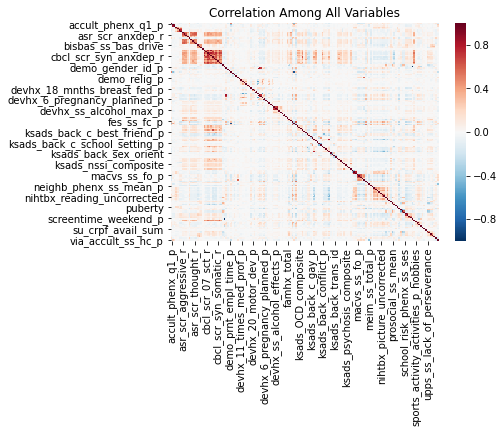

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


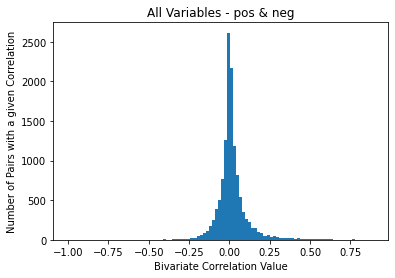

In [19]:
datacr=data.dropna(axis=1,how="all")
datacr=datacr.sort_index(axis=1)
data_fin=datacr
crr=datacr.corr(method='pearson')
crr.to_csv("cormat.csv")
plt.title("Correlation Among All Variables")
plt.xlabel('Variable Names')
plt.ylabel('Variable Names')
sn.heatmap(crr,cmap="RdBu_r")
plt.show()
crr3 = crr.stack().reset_index()
#set column names
crr3.columns = ['var1','var2','cor']
crrb=crr3
crr3=crr3[crr3['cor']<1]
crr3.drop_duplicates(subset ="cor", 
                     keep = "first", inplace = True) 
crr3=crr3.sort_values(by='cor')
crr3.to_csv("stacked_cormat.csv")
plt.hist(crr3['cor'],bins=100)
plt.title("All Variables - pos & neg")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()

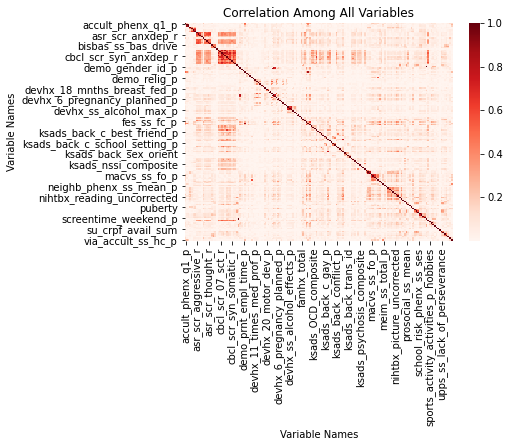

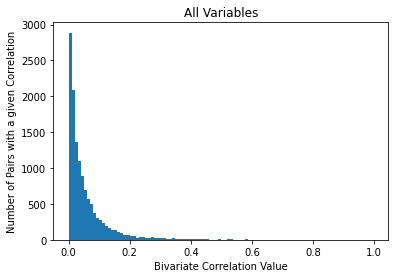

0.10    0.004078
0.20    0.008695
0.25    0.011333
0.30    0.014091
0.40    0.021084
0.50    0.030800
0.60    0.042916
0.70    0.059930
0.75    0.071777
0.80    0.085801
0.90    0.139313
0.95    0.201978
Name: cor, dtype: float64

In [20]:
crr=abs(crr)
crr.to_csv("abs_cormat.csv")
sn.heatmap(crr,cmap="Reds")
plt.title("Correlation Among All Variables")
plt.xlabel('Variable Names')
plt.ylabel('Variable Names')
plt.show()
crr4 = crr.stack().reset_index()
#set column names
#crr4['2scor']=crrb['cor']
crr4.columns = ['var1','var2','cor']
crr4=crr4[crr4['cor']<1]
crr4.drop_duplicates(subset ="cor", 
                     keep = "first", inplace = True) 
crr4=crr4.sort_values(by='cor',ascending=False).reset_index()
crr4.to_csv("stacked_cormat_abs_pd.csv")
plt.hist(crr4['cor'],bins=100)
plt.title("All Variables")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
crr_fin=crr4
#Quantiles
agg_quart=DataFrame()
agg_quart['all']=crr4['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])
crr4['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])

In [21]:
crr.to_csv('test.csv')

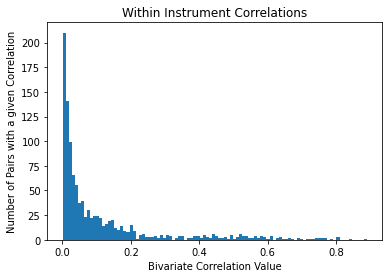

index       cor  redun
0.10   5349.8  0.004425    1.0
0.20   7136.6  0.009776    1.0
0.25   7469.0  0.012776    1.0
0.30   7947.4  0.016062    1.0
0.40   9080.2  0.026450    1.0
0.50  12482.0  0.041705    1.0
0.60  13096.0  0.065990    1.0
0.70  13779.6  0.109059    1.0
0.75  14114.0  0.137759    1.0
0.80  14595.4  0.171143    1.0
0.90  15916.6  0.384500    1.0
0.95  18405.0  0.534858    1.0

In [22]:
cr=crr4
cr['redun'] = cr['var1'].astype(str).str[0:3]==cr['var2'].astype(str).str[0:3]
cr=cr[cr['redun']==True]
plt.hist(cr['cor'],bins=100)
plt.title("Within Instrument Correlations")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
agg_quart['within-instrument']=cr['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])
cr.quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95],axis=0)

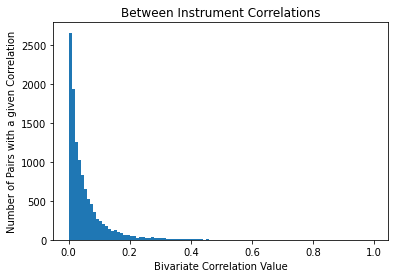

index       cor  redun
0.10   1227.0  0.004071    0.0
0.20   2532.0  0.008632    0.0
0.25   3197.5  0.011223    0.0
0.30   3941.0  0.013916    0.0
0.40   5418.0  0.020665    0.0
0.50   7158.0  0.030218    0.0
0.60   9163.0  0.041862    0.0
0.70  11238.0  0.057750    0.0
0.75  12377.5  0.068410    0.0
0.80  14165.0  0.081049    0.0
0.90  17855.0  0.127985    0.0
0.95  20256.5  0.179864    0.0

In [23]:
cr=crr4
cr['redun'] = cr['var1'].astype(str).str[0:3]==cr['var2'].astype(str).str[0:3]
cr=cr[cr['redun']==False]
plt.hist(cr['cor'],bins=100)
plt.title("Between Instrument Correlations")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
#cr.to_csv("noredun_stacked_cormat_abs.csv")
agg_quart['between-instrument']=cr['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])
cr.quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95],axis=0)

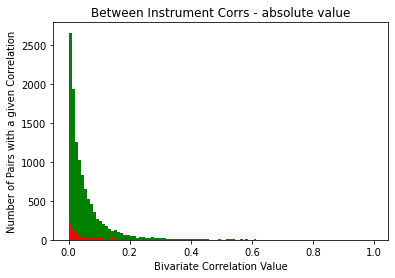

In [24]:
cr=crr4
cr['redun'] = cr['var1'].astype(str).str[0:3]==cr['var2'].astype(str).str[0:3]
cr1=cr[cr['redun']==True]
cr2=cr[cr['redun']==False]
plt.hist(cr2['cor'],bins=100,color='g')
plt.hist(cr1['cor'],bins=100,color='r')
plt.title("Between Instrument Corrs - absolute value")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()

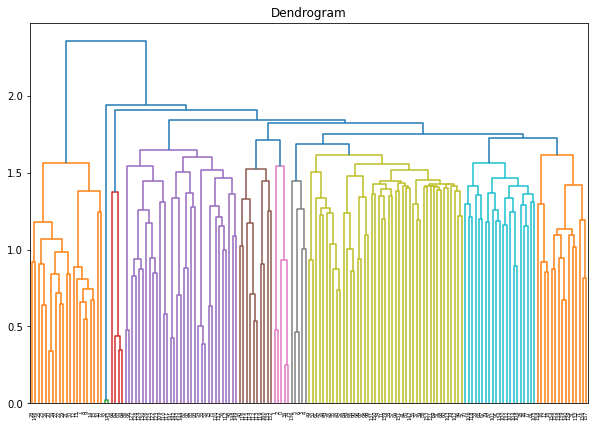

In [25]:
#####FINAL SCIPY CLUSTERING#######see
#https://stackoverflow.com/questions/52787431/create-clusters-using-correlation-matrix-in-python
crrc=crr.dropna()
class_labels_agg=pd.DataFrame()
class_labels_agg.insert(0, "1", range(0,len(crrc))) 

i=1

for n_clusters in range(1,(len(crrc)-1)): 
    
    pdist1 = shc.distance.pdist(crrc)
    link = shc.linkage(pdist1,method='average',metric='correlation')
    class_labels =shc.fcluster(link, n_clusters, 'maxclust')
    class_labels=pd.DataFrame(class_labels)
    class_labels_agg[str(i)]=class_labels
    i+=1

class_labels_agg.index=crrc.index
class_labels_agg.to_csv('class_labels_cormat_agg2.csv')

plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")
dend = shc.dendrogram(link,truncate_mode='level')
#plt.axhline(y=2.5, color='black', linestyle='--')
plt.show()

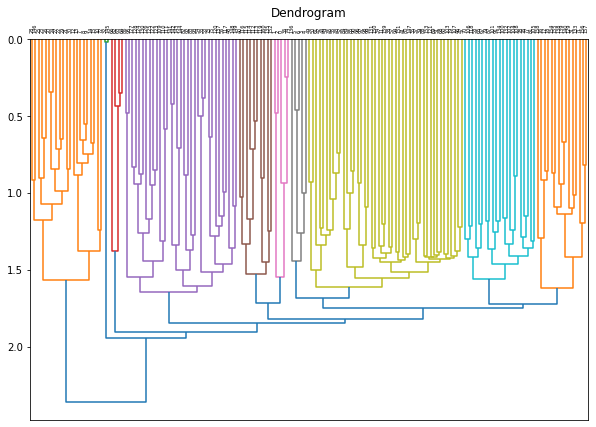

In [26]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")
dend = shc.dendrogram(link,orientation='bottom')
#plt.axhline(y=2.5, color='black', linestyle='--')
plt.show()

In [80]:
#print out final varnames to sort into categories
cns=data.columns
df = pd.DataFrame(cns)
df.columns=['names']
dfl=[]
for i, j in data.iteritems(): 
    #print(i,j)
    dfl.append(data[i].isnull().values.ravel().sum())
df['missing']=dfl
df=df.sort_values('missing',ascending=False)
df.to_csv("col_names.csv")

In [28]:
#read in list of variable domain names
col_groups=pd.read_csv('col_groups5.csv')
var_ls_mental_health=col_groups['mental_health'].values.tolist()
var_ls_sociodemographic=col_groups['sociodemographic'].values.tolist()
var_ls_biological=col_groups['biological'].values.tolist()
var_ls_cognitive=col_groups['cognitive'].values.tolist()
var_ls_personality=col_groups['personality/trait'].values.tolist()
var_ls_family=col_groups['social/family/environment'].values.tolist()
var_ls_sociodemographic = [x for x in var_ls_sociodemographic if str(x) != 'nan']
var_ls_biological=[x for x in var_ls_biological if str(x) != 'nan']
var_ls_cognitive=[x for x in var_ls_cognitive if str(x) != 'nan']
var_ls_personality=[x for x in var_ls_personality if str(x) != 'nan']
var_ls_family=[x for x in var_ls_family if str(x) != 'nan']
data_mentalhealth=data[var_ls_mental_health]
data_sociodemographic=data[var_ls_sociodemographic]
data_biological=data[var_ls_biological]
data_cognitive=data[var_ls_cognitive]
data_personality=data[var_ls_personality]
data_family=data[var_ls_family]
var_ls_psych=var_ls_cognitive+var_ls_personality
var_ls_context=var_ls_sociodemographic+var_ls_family

In [29]:
data['su_crpf_avail_sum']

0         8.0
1        15.0
2        16.0
3         8.0
4         8.0
         ... 
11870    11.0
11871     9.0
11872    10.0
11873     6.0
11874     8.0
Name: su_crpf_avail_sum, Length: 11875, dtype: float64

In [30]:
#read in lists of variable informant/self classes
col_groups=pd.read_csv('classes_manual_as_colgroups5.csv')
child_parentreport=col_groups['Child_parent-report'].values.tolist()
child_selfreport=col_groups['Child_Self-report'].values.tolist()
child_task=col_groups['Child_Task'].values.tolist()
family_parentreport=col_groups['Family_parent-report'].values.tolist()
parent_parentreport=col_groups['Parent_parent-report'].values.tolist()
child_parentreport = [x for x in child_parentreport if str(x) != 'nan']
child_selfreport=[x for x in child_selfreport if str(x) != 'nan']
child_task=[x for x in child_task if str(x) != 'nan']
family_parentreport=[x for x in family_parentreport if str(x) != 'nan']
parent_parentreport=[x for x in parent_parentreport if str(x) != 'nan']
data_child_parentreport=data[child_parentreport]
data_child_selfreport=data[child_selfreport]
data_child_task=data[child_task]
data_family_parentreport=data[family_parentreport]
data_parent_parentreport=data[parent_parentreport]

In [31]:
#make cross-correlation matrices (inter-reporter & inter-domain)
cpr_csr=pd.concat([data_child_parentreport, data_child_selfreport], axis=1, keys=['data_child_parentreport', 'data_child_selfreport']).corr().loc['data_child_selfreport', 'data_child_parentreport']
cpr_ct=pd.concat([data_child_parentreport, data_child_task], axis=1, keys=['data_child_parentreport', 'data_child_task']).corr().loc['data_child_task', 'data_child_parentreport']
cpr_fpr=pd.concat([data_child_parentreport, data_family_parentreport], axis=1, keys=['data_child_parentreport', 'data_family_parentreport']).corr().loc['data_family_parentreport', 'data_child_parentreport']
cpr_ppr=pd.concat([data_child_parentreport, data_parent_parentreport], axis=1, keys=['data_child_parentreport', 'data_parent_parentreport']).corr().loc['data_parent_parentreport', 'data_child_parentreport']
csr_ct=pd.concat([data_child_selfreport, data_child_task], axis=1, keys=['data_child_selfreport', 'data_child_task']).corr().loc['data_child_task', 'data_child_selfreport']
csr_fpr=pd.concat([data_child_selfreport, data_family_parentreport], axis=1, keys=['data_child_selfreport', 'data_family_parentreport']).corr().loc['data_family_parentreport', 'data_child_selfreport']
csr_ppr=pd.concat([data_child_selfreport, data_parent_parentreport], axis=1, keys=['data_child_selfreport', 'data_parent_parentreport']).corr().loc['data_parent_parentreport', 'data_child_selfreport']
ct_fpr=pd.concat([data_child_task, data_family_parentreport], axis=1, keys=['data_child_task', 'data_family_parentreport']).corr().loc['data_family_parentreport', 'data_child_task']
ct_ppr=pd.concat([data_child_task, data_parent_parentreport], axis=1, keys=['data_child_task', 'data_parent_parentreport']).corr().loc['data_parent_parentreport', 'data_child_task']
fpr_ppr=pd.concat([data_family_parentreport, data_parent_parentreport], axis=1, keys=['data_child_task', 'data_parent_parentreport']).corr().loc['data_parent_parentreport', 'data_child_task']

mh_sd=pd.concat([data_mentalhealth, data_sociodemographic], axis=1, keys=['data_mentalhealth', 'data_sociodemographic']).corr().loc['data_sociodemographic', 'data_mentalhealth']
mh_bio=pd.concat([data_mentalhealth, data_biological], axis=1, keys=['data_mentalhealth', 'data_biological']).corr().loc['data_biological', 'data_mentalhealth']
mh_cog=pd.concat([data_mentalhealth, data_cognitive], axis=1, keys=['data_mentalhealth', 'data_cognitive']).corr().loc['data_cognitive', 'data_mentalhealth']
mh_per=pd.concat([data_mentalhealth, data_personality], axis=1, keys=['data_mentalhealth', 'data_personality']).corr().loc['data_personality', 'data_mentalhealth']
mh_fam=pd.concat([data_mentalhealth, data_family], axis=1, keys=['data_mentalhealth', 'data_family']).corr().loc['data_family', 'data_mentalhealth']
sd_bio=pd.concat([data_sociodemographic, data_biological], axis=1, keys=['data_sociodemographic', 'data_biological']).corr().loc['data_biological', 'data_sociodemographic']
sd_cog=pd.concat([data_sociodemographic, data_cognitive], axis=1, keys=['data_sociodemographic', 'data_cognitive']).corr().loc['data_cognitive', 'data_sociodemographic']
sd_per=pd.concat([data_sociodemographic, data_personality], axis=1, keys=['data_sociodemographic', 'data_personality']).corr().loc['data_personality', 'data_sociodemographic']
sd_fam=pd.concat([data_sociodemographic, data_family], axis=1, keys=['data_sociodemographic', 'data_family']).corr().loc['data_family', 'data_sociodemographic']
bio_cog=pd.concat([data_biological, data_cognitive], axis=1, keys=['data_biological', 'data_cognitive']).corr().loc['data_cognitive', 'data_biological']
bio_per=pd.concat([data_biological, data_personality], axis=1, keys=['data_biological', 'data_personality']).corr().loc['data_personality', 'data_biological']
bio_bam=pd.concat([data_biological, data_family], axis=1, keys=['data_biological', 'data_family']).corr().loc['data_family', 'data_biological']
cog_per=pd.concat([data_cognitive, data_personality], axis=1, keys=['data_cognitive', 'data_personality']).corr().loc['data_personality', 'data_cognitive']
cog_fam=pd.concat([data_cognitive, data_family], axis=1, keys=['data_cognitive', 'data_family']).corr().loc['data_family', 'data_cognitive']
per_fam=pd.concat([data_personality, data_family], axis=1, keys=['data_personality', 'data_family']).corr().loc['data_family', 'data_personality']

In [32]:
data.index

RangeIndex(start=0, stop=11875, step=1)

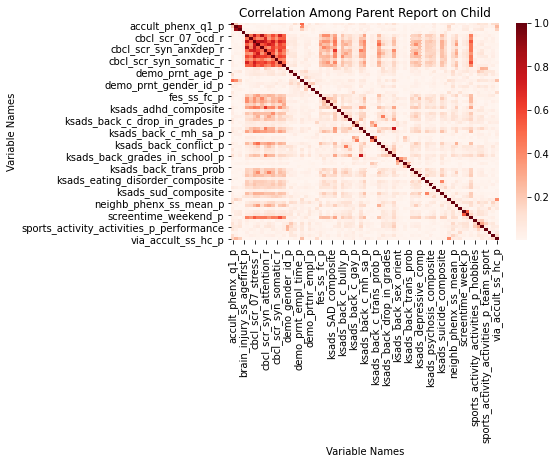

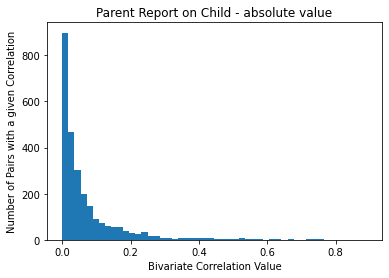

Quantiles forParent Report on Child
0.10    0.004137
0.20    0.008923
0.25    0.011546
0.30    0.014675
0.40    0.022411
0.50    0.033311
0.60    0.047008
0.70    0.068408
0.75    0.083932
0.80    0.107113
0.90    0.190296
0.95    0.278199
Name: cor, dtype: float64
                              var1                           var2       cor
0                accult_phenx_q2_p             accult_phenx_q45_p  0.890693
1                cbcl_scr_07_ocd_r          cbcl_scr_syn_anxdep_r  0.840904
2             cbcl_scr_07_stress_r          cbcl_scr_syn_anxdep_r  0.806205
3                cbcl_scr_07_ocd_r           cbcl_scr_07_stress_r  0.783895
4             cbcl_scr_07_stress_r      cbcl_scr_syn_aggressive_r  0.762449
5   ksads_back_c_how_well_school_p  ksads_back_grades_in_school_p  0.761691
6        cbcl_scr_syn_aggressive_r       cbcl_scr_syn_rulebreak_r  0.739774
7             cbcl_scr_07_stress_r          cbcl_scr_syn_social_r  0.739525
8             cbcl_scr_07_stress_r         cbcl_sc

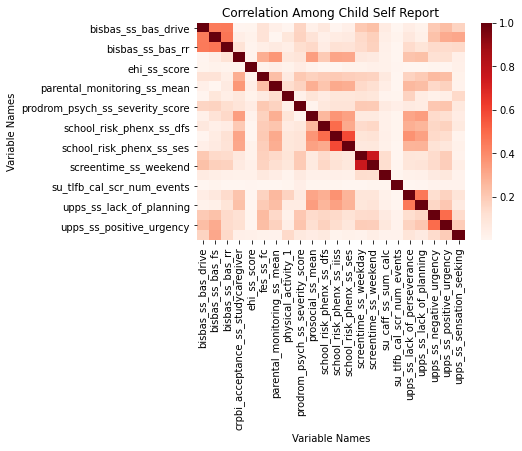

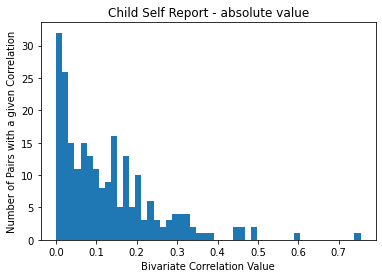

Quantiles forChild Self Report
0.10    0.009335
0.20    0.022966
0.25    0.030190
0.30    0.043875
0.40    0.065114
0.50    0.097914
0.60    0.133511
0.70    0.166311
0.75    0.180569
0.80    0.202734
0.90    0.291734
0.95    0.339304
Name: cor, dtype: float64
                                  var1                          var2       cor
0                screentime_ss_weekday         screentime_ss_weekend  0.753778
1            school_risk_phenx_ss_iiss      school_risk_phenx_ss_ses  0.588266
2             upps_ss_negative_urgency      upps_ss_positive_urgency  0.494339
3             school_risk_phenx_ss_dfs     school_risk_phenx_ss_iiss  0.492589
4                     bisbas_ss_bas_fs              bisbas_ss_bas_rr  0.465176
5         upps_ss_lack_of_perseverance      upps_ss_lack_of_planning  0.454262
6                  bisbas_ss_bas_drive              bisbas_ss_bas_rr  0.450133
7                  bisbas_ss_bas_drive              bisbas_ss_bas_fs  0.447165
8            school_risk_phe

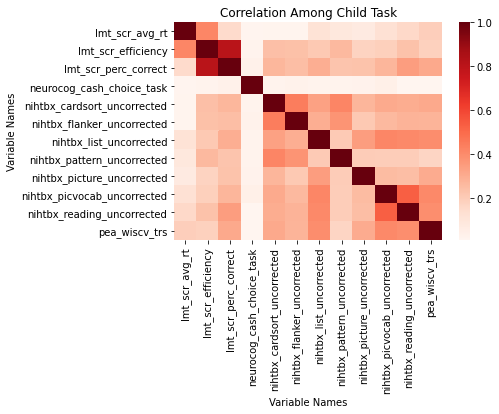

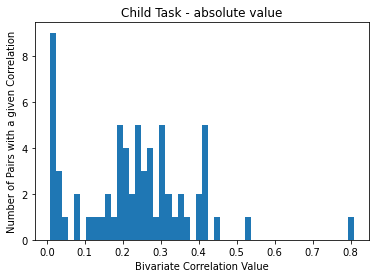

Quantiles forChild Task
0.10    0.021398
0.20    0.072674
0.25    0.131281
0.30    0.171888
0.40    0.200853
0.50    0.237296
0.60    0.263270
0.70    0.297321
0.75    0.305923
0.80    0.333795
0.90    0.409652
0.95    0.421155
Name: cor, dtype: float64
                           var1                         var2       cor
0            lmt_scr_efficiency         lmt_scr_perc_correct  0.809430
1   nihtbx_picvocab_uncorrected   nihtbx_reading_uncorrected  0.532498
2   nihtbx_cardsort_uncorrected   nihtbx_flanker_uncorrected  0.444713
3   nihtbx_cardsort_uncorrected   nihtbx_pattern_uncorrected  0.422257
4       nihtbx_list_uncorrected  nihtbx_picvocab_uncorrected  0.417848
5                lmt_scr_avg_rt           lmt_scr_efficiency  0.415179
6       nihtbx_list_uncorrected   nihtbx_reading_uncorrected  0.410183
7   nihtbx_picvocab_uncorrected                pea_wiscv_trs  0.409120
8       nihtbx_list_uncorrected                pea_wiscv_trs  0.397806
9    nihtbx_reading_uncorrected     

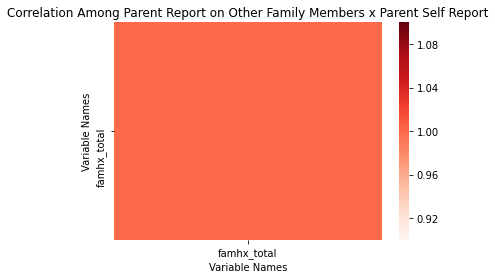

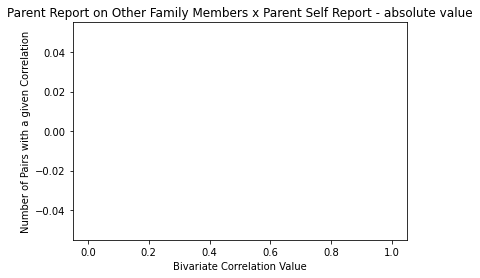

Quantiles forParent Report on Other Family Members x Parent Self Report
0.10   NaN
0.20   NaN
0.25   NaN
0.30   NaN
0.40   NaN
0.50   NaN
0.60   NaN
0.70   NaN
0.75   NaN
0.80   NaN
0.90   NaN
0.95   NaN
Name: cor, dtype: float64
Empty DataFrame
Columns: [var1, var2, cor]
Index: []


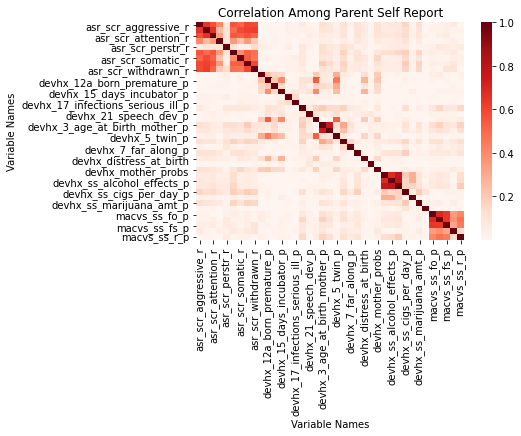

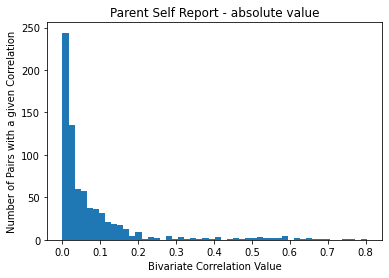

Quantiles forParent Self Report
0.10    0.004022
0.20    0.008679
0.25    0.011611
0.30    0.014430
0.40    0.022057
0.50    0.031309
0.60    0.048887
0.70    0.073379
0.75    0.089706
0.80    0.109428
0.90    0.170312
0.95    0.378290
Name: cor, dtype: float64
                             var1                           var2       cor
0      devhx_ss_alcohol_effects_p         devhx_ss_alcohol_max_p  0.803315
1          devhx_ss_alcohol_avg_p         devhx_ss_alcohol_max_p  0.770481
2   devhx_3_age_at_birth_mother_p  devhx_4_age_at_birth_father_p  0.754519
3                   macvs_ss_fo_p                  macvs_ss_fr_p  0.695854
4          devhx_ss_alcohol_avg_p     devhx_ss_alcohol_effects_p  0.689345
5                asr_scr_anxdep_r            asr_scr_attention_r  0.667661
6            asr_scr_aggressive_r               asr_scr_anxdep_r  0.655411
7                   macvs_ss_fo_p                  macvs_ss_fs_p  0.643678
8                   macvs_ss_fr_p                  macvs_ss_fs_

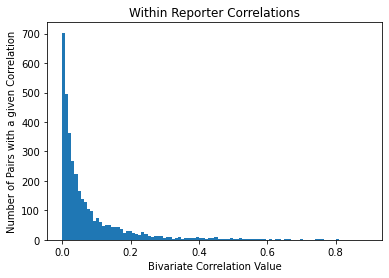

Quantiles forParent Self Report
0.10    0.004344
0.20    0.009491
0.25    0.012497
0.30    0.015762
0.40    0.023959
0.50    0.035749
0.60    0.052363
0.70    0.078196
0.75    0.097669
0.80    0.123423
0.90    0.209513
0.95    0.314962
Name: cor, dtype: float64
                              var1                           var2       cor
0                accult_phenx_q2_p             accult_phenx_q45_p  0.890693
1                cbcl_scr_07_ocd_r          cbcl_scr_syn_anxdep_r  0.840904
2             cbcl_scr_07_stress_r          cbcl_scr_syn_anxdep_r  0.806205
3                cbcl_scr_07_ocd_r           cbcl_scr_07_stress_r  0.783895
4             cbcl_scr_07_stress_r      cbcl_scr_syn_aggressive_r  0.762449
5   ksads_back_c_how_well_school_p  ksads_back_grades_in_school_p  0.761691
6        cbcl_scr_syn_aggressive_r       cbcl_scr_syn_rulebreak_r  0.739774
7             cbcl_scr_07_stress_r          cbcl_scr_syn_social_r  0.739525
8             cbcl_scr_07_stress_r         cbcl_scr_sy

In [33]:
#Within Reporter Correaltions
i=0
cx_crr_ls=[data_child_parentreport,data_child_selfreport,data_child_task,data_family_parentreport,
           data_parent_parentreport]

names=["Parent Report on Child", "Child Self Report","Child Task",
       "Parent Report on Other Family Members x Parent Self Report","Parent Self Report"]
      
cx_crrs=[]
for v,n in zip(cx_crr_ls,names):
    datacr=v
    datacr=datacr.sort_index(axis=1)
    crr2=datacr.corr(method='pearson')
    crr2=abs(crr2)
    sn.heatmap(crr2,cmap="Reds")
    plt.title("Correlation Among "+str(n))
    plt.xlabel('Variable Names')
    plt.ylabel('Variable Names')
    plt.show()
    crr5 = crr2.stack().reset_index()
    #set column names
    crr5['2scor']=crrb['cor']
    crr5.columns = ['var1','var2','cor','2scor']
    crr5=crr5[crr5['cor']<1]
    crr5.drop_duplicates(subset ="cor", 
                         keep = "first", inplace = True) 
    crr5=crr5.sort_values(by='cor',ascending=False).reset_index()
    if i == 0:
        crr6=crr5
    else:
        #crr6.append(crr5)
        crr6=pd.concat([crr6,crr5])
    plt.hist(crr5['cor'],bins=50)
    plt.title(str(n)+" - absolute value")
    plt.xlabel('Bivariate Correlation Value')
    plt.ylabel('Number of Pairs with a given Correlation')
    plt.show()
    cx_crrs.append(crr5)
    #Quantiles
    i+=1
    print("Quantiles for"+str(n))
    print(crr5['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95]))
    agg_quart[str(n)]=crr6['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])
    print(crr5.iloc[:,1:4].head(15))
crr6.to_csv("stacked_cormat_within_reporter.csv")
plt.hist(crr6['cor'],bins=100)
plt.title("Within Reporter Correlations")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
#Quantiles
i+=1
print("Quantiles for"+str(n))
agg_quart['within-reporter']=crr6['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])
print(crr6['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95]))
print(crr6.iloc[:,1:4].head(15))

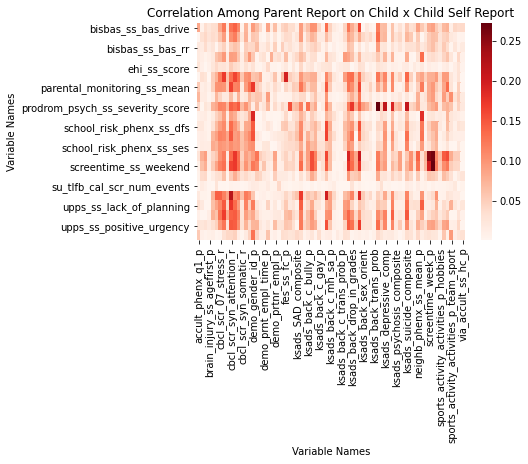

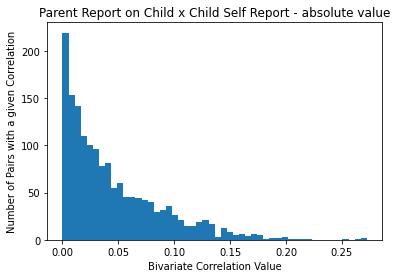

Quantiles forParent Report on Child x Child Self Report
0.10    0.004017
0.20    0.009169
0.25    0.012058
0.30    0.014920
0.40    0.023279
0.50    0.031597
0.60    0.042286
0.70    0.058123
0.75    0.067120
0.80    0.078106
0.90    0.107406
0.95    0.131944
Name: cor, dtype: float64
                               var1                            var2       cor
0             screentime_ss_weekend            screentime_weekend_p  0.272269
1   prodrom_psych_ss_severity_score         ksads_bipolar_composite  0.271288
2             screentime_ss_weekday            screentime_weekend_p  0.265375
3             screentime_ss_weekday               screentime_week_p  0.252434
4      upps_ss_lack_of_perseverance        cbcl_scr_syn_attention_r  0.220148
5   prodrom_psych_ss_severity_score           ksads_depressive_comp  0.214943
6   prodrom_psych_ss_severity_score         ksads_suicide_composite  0.211224
7             screentime_ss_weekday   ksads_back_grades_in_school_p  0.204315
8      upps_

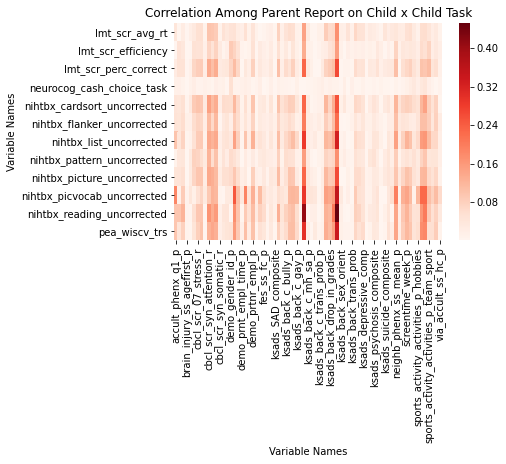

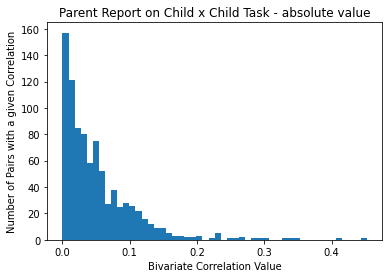

Quantiles forParent Report on Child x Child Task
0.10    0.004715
0.20    0.010222
0.25    0.013435
0.30    0.017167
0.40    0.025911
0.50    0.035184
0.60    0.048170
0.70    0.061115
0.75    0.072919
0.80    0.084239
0.90    0.115732
0.95    0.146742
Name: cor, dtype: float64
                           var1                            var2       cor
0    nihtbx_reading_uncorrected   ksads_back_grades_in_school_p  0.452447
1    nihtbx_reading_uncorrected  ksads_back_c_how_well_school_p  0.408757
2   nihtbx_picvocab_uncorrected   ksads_back_grades_in_school_p  0.352784
3                 pea_wiscv_trs   ksads_back_grades_in_school_p  0.340301
4       nihtbx_list_uncorrected   ksads_back_grades_in_school_p  0.325879
5                 pea_wiscv_trs  ksads_back_c_how_well_school_p  0.299025
6   nihtbx_picvocab_uncorrected  ksads_back_c_how_well_school_p  0.291464
7       nihtbx_list_uncorrected  ksads_back_c_how_well_school_p  0.284973
8          lmt_scr_perc_correct   ksads_back_grades_in_

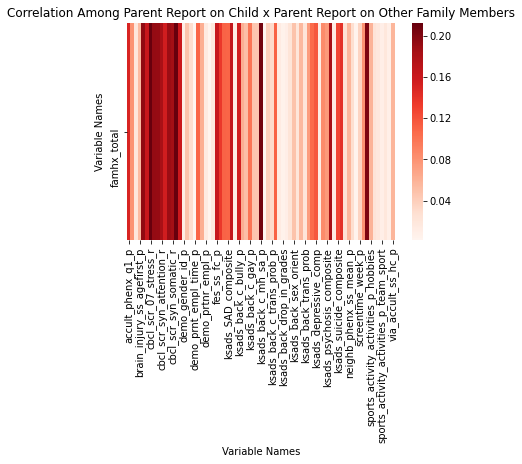

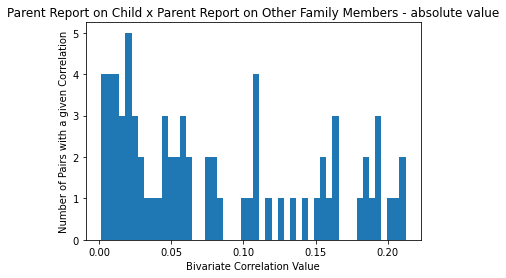

Quantiles forParent Report on Child x Parent Report on Other Family Members
0.10    0.009969
0.20    0.018023
0.25    0.021086
0.30    0.024635
0.40    0.046815
0.50    0.057964
0.60    0.081226
0.70    0.113388
0.75    0.141011
0.80    0.157672
0.90    0.189093
0.95    0.197611
Name: cor, dtype: float64
           var1                       var2       cor
0   famhx_total     cbcl_scr_syn_thought_r  0.212248
1   famhx_total       cbcl_scr_07_stress_r  0.211955
2   famhx_total       ksads_back_c_mh_sa_p  0.206513
3   famhx_total           sleep_ss_total_p  0.202436
4   famhx_total          cbcl_scr_07_ocd_r  0.194394
5   famhx_total  cbcl_scr_syn_aggressive_r  0.193027
6   famhx_total      cbcl_scr_syn_anxdep_r  0.192386
7   famhx_total      cbcl_scr_syn_social_r  0.189758
8   famhx_total     cbcl_scr_syn_somatic_r  0.186432
9   famhx_total       ksads_ptsd_composite  0.183840
10  famhx_total   cbcl_scr_syn_attention_r  0.182726
11  famhx_total       ksads_adhd_composite  0.164699
12  f

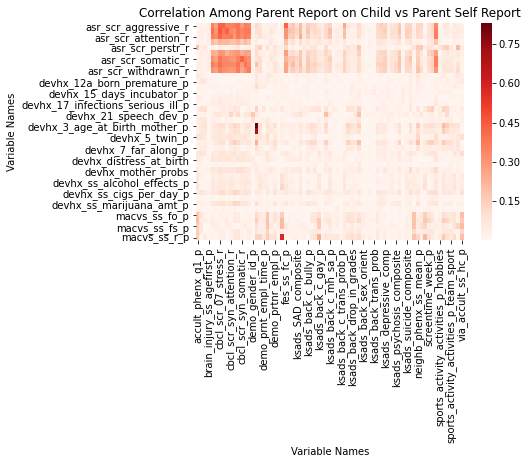

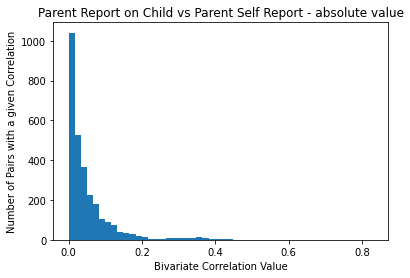

Quantiles forParent Report on Child vs Parent Self Report
0.10    0.003802
0.20    0.007761
0.25    0.010470
0.30    0.013097
0.40    0.018656
0.50    0.027901
0.60    0.038509
0.70    0.054215
0.75    0.064538
0.80    0.074908
0.90    0.121950
0.95    0.178171
Name: cor, dtype: float64
                             var1                       var2       cor
0   devhx_3_age_at_birth_mother_p            demo_prnt_age_p  0.829947
1   devhx_4_age_at_birth_father_p            demo_prnt_age_p  0.711141
2                    macvs_ss_r_p               demo_relig_p  0.575769
3                asr_scr_anxdep_r       cbcl_scr_07_stress_r  0.451874
4            asr_scr_aggressive_r  cbcl_scr_syn_aggressive_r  0.435839
5                asr_scr_anxdep_r      cbcl_scr_syn_anxdep_r  0.434564
6            asr_scr_aggressive_r                fes_ss_fc_p  0.431255
7            asr_scr_aggressive_r       cbcl_scr_07_stress_r  0.430152
8               asr_scr_somatic_r     cbcl_scr_syn_somatic_r  0.427009
9 

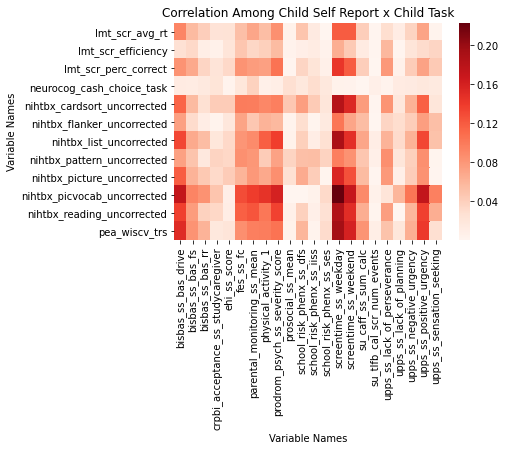

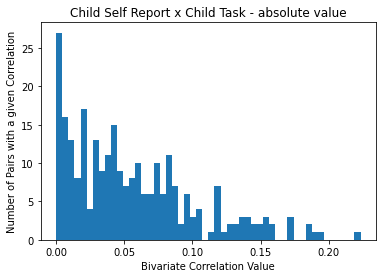

Quantiles forChild Self Report x Child Task
0.10    0.004002
0.20    0.012633
0.25    0.018229
0.30    0.021814
0.40    0.034893
0.50    0.043756
0.60    0.059128
0.70    0.074290
0.75    0.082384
0.80    0.087049
0.90    0.125781
0.95    0.149947
Name: cor, dtype: float64
                           var1                             var2       cor
0   nihtbx_picvocab_uncorrected            screentime_ss_weekday  0.223352
1                 pea_wiscv_trs            screentime_ss_weekday  0.194771
2       nihtbx_list_uncorrected            screentime_ss_weekday  0.190880
3    nihtbx_reading_uncorrected            screentime_ss_weekday  0.185968
4   nihtbx_cardsort_uncorrected            screentime_ss_weekday  0.183826
5   nihtbx_picvocab_uncorrected         upps_ss_positive_urgency  0.174080
6   nihtbx_picvocab_uncorrected              bisbas_ss_bas_drive  0.173530
7   nihtbx_picvocab_uncorrected            screentime_ss_weekend  0.171699
8   nihtbx_picvocab_uncorrected  prodrom_psych_ss_s

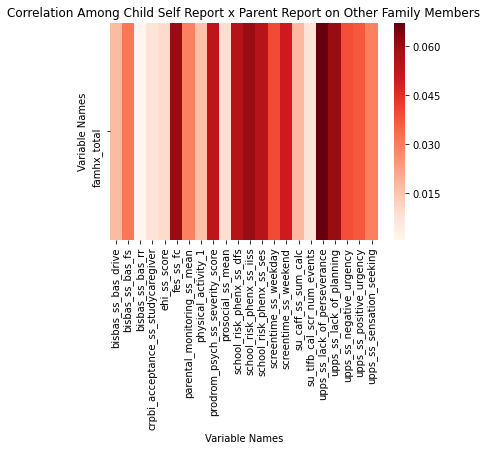

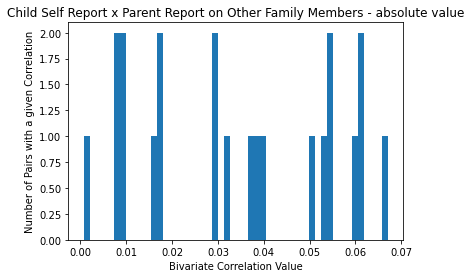

Quantiles forChild Self Report x Parent Report on Other Family Members
0.10    0.008043
0.20    0.011186
0.25    0.016418
0.30    0.017325
0.40    0.029239
0.50    0.034298
0.60    0.039346
0.70    0.052271
0.75    0.054523
0.80    0.055128
0.90    0.060520
0.95    0.060612
Name: cor, dtype: float64
           var1                             var2       cor
0   famhx_total     upps_ss_lack_of_perseverance  0.067153
1   famhx_total                        fes_ss_fc  0.060616
2   famhx_total        school_risk_phenx_ss_iiss  0.060537
3   famhx_total         upps_ss_lack_of_planning  0.060366
4   famhx_total         school_risk_phenx_ss_dfs  0.055172
5   famhx_total         school_risk_phenx_ss_ses  0.054950
6   famhx_total  prodrom_psych_ss_severity_score  0.053245
7   famhx_total            screentime_ss_weekend  0.049999
8   famhx_total            screentime_ss_weekday  0.039630
9   famhx_total         upps_ss_negative_urgency  0.038921
10  famhx_total         upps_ss_positive_urgency  

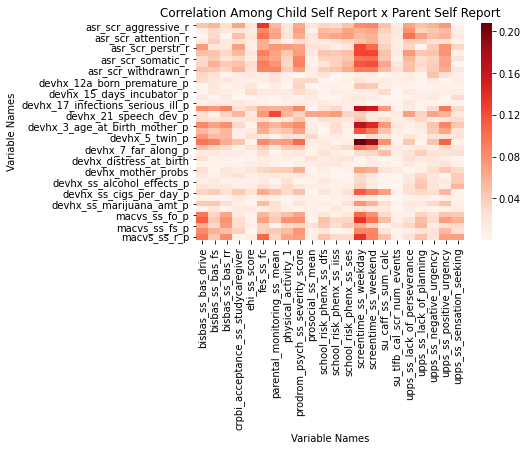

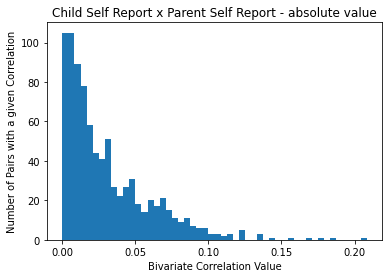

Quantiles forChild Self Report x Parent Self Report
0.10    0.003566
0.20    0.006630
0.25    0.008561
0.30    0.010679
0.40    0.014783
0.50    0.020290
0.60    0.028678
0.70    0.038249
0.75    0.045026
0.80    0.052035
0.90    0.072117
0.95    0.088327
Name: cor, dtype: float64
                             var1                         var2       cor
0     devhx_6_pregnancy_planned_p        screentime_ss_weekday  0.208313
1     devhx_6_pregnancy_planned_p        screentime_ss_weekend  0.186635
2     devhx_18_mnths_breast_fed_p        screentime_ss_weekday  0.175587
3   devhx_3_age_at_birth_mother_p        screentime_ss_weekday  0.167455
4     devhx_18_mnths_breast_fed_p        screentime_ss_weekend  0.156012
5   devhx_3_age_at_birth_mother_p        screentime_ss_weekend  0.144342
6                    macvs_ss_r_p        screentime_ss_weekday  0.136329
7                   macvs_ss_fr_p        screentime_ss_weekday  0.134785
8            asr_scr_aggressive_r                    fes_ss_f

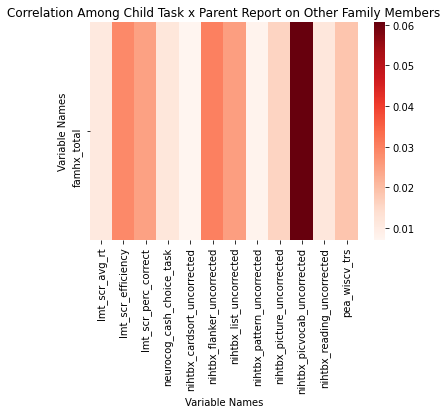

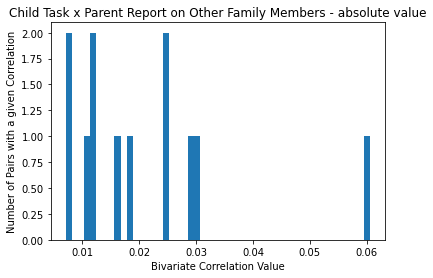

Quantiles forChild Task x Parent Report on Other Family Members
0.10    0.008179
0.20    0.011087
0.25    0.011385
0.30    0.011593
0.40    0.013440
0.50    0.017366
0.60    0.022325
0.70    0.025012
0.75    0.026024
0.80    0.027951
0.90    0.030061
0.95    0.043901
Name: cor, dtype: float64
           var1                         var2       cor
0   famhx_total  nihtbx_picvocab_uncorrected  0.060626
1   famhx_total   nihtbx_flanker_uncorrected  0.030218
2   famhx_total           lmt_scr_efficiency  0.028652
3   famhx_total      nihtbx_list_uncorrected  0.025148
4   famhx_total         lmt_scr_perc_correct  0.024692
5   famhx_total                pea_wiscv_trs  0.018774
6   famhx_total   nihtbx_picture_uncorrected  0.015958
7   famhx_total    neurocog_cash_choice_task  0.011762
8   famhx_total   nihtbx_reading_uncorrected  0.011521
9   famhx_total               lmt_scr_avg_rt  0.010978
10  famhx_total   nihtbx_pattern_uncorrected  0.007868
11  famhx_total  nihtbx_cardsort_uncorrected  

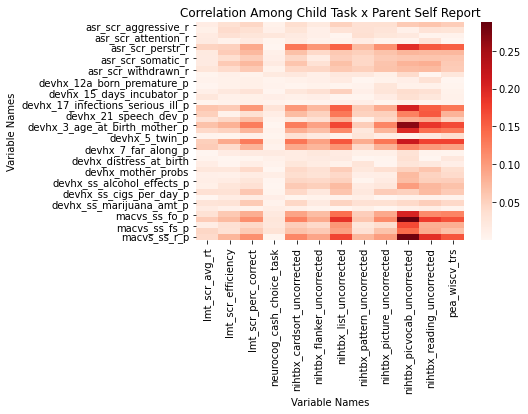

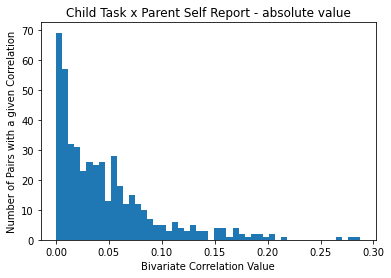

Quantiles forChild Task x Parent Self Report
0.10    0.003768
0.20    0.008405
0.25    0.010580
0.30    0.014179
0.40    0.022580
0.50    0.034156
0.60    0.044266
0.70    0.056971
0.75    0.064410
0.80    0.074164
0.90    0.113957
0.95    0.152503
Name: cor, dtype: float64
                             var1                         var2       cor
0                   macvs_ss_fr_p  nihtbx_picvocab_uncorrected  0.287700
1                    macvs_ss_r_p  nihtbx_picvocab_uncorrected  0.281293
2   devhx_3_age_at_birth_mother_p  nihtbx_picvocab_uncorrected  0.266780
3     devhx_6_pregnancy_planned_p  nihtbx_picvocab_uncorrected  0.216116
4     devhx_18_mnths_breast_fed_p  nihtbx_picvocab_uncorrected  0.206802
5                   macvs_ss_fo_p  nihtbx_picvocab_uncorrected  0.203426
6   devhx_4_age_at_birth_father_p  nihtbx_picvocab_uncorrected  0.197922
7                asr_scr_perstr_r  nihtbx_picvocab_uncorrected  0.192388
8                    macvs_ss_r_p   nihtbx_reading_uncorrected  0.19

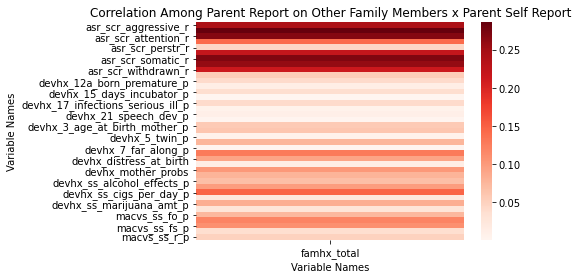

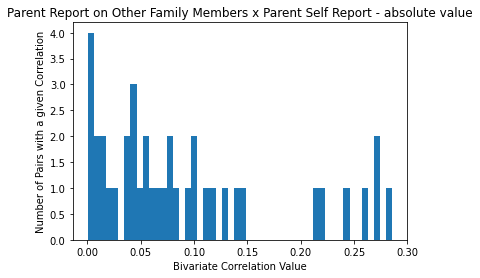

Quantiles forParent Report on Other Family Members x Parent Self Report
0.10    0.006202
0.20    0.019089
0.25    0.033314
0.30    0.038993
0.40    0.051174
0.50    0.067430
0.60    0.082198
0.70    0.106746
0.75    0.124400
0.80    0.144699
0.90    0.246404
0.95    0.269010
Name: cor, dtype: float64
                       var1         var2       cor
0          asr_scr_anxdep_r  famhx_total  0.285787
1         asr_scr_somatic_r  famhx_total  0.270782
2       asr_scr_attention_r  famhx_total  0.268813
3         asr_scr_thought_r  famhx_total  0.259875
4      asr_scr_aggressive_r  famhx_total  0.243037
5       asr_scr_rulebreak_r  famhx_total  0.220420
6       asr_scr_withdrawn_r  famhx_total  0.214398
7   devhx_ss_cigs_per_day_p  famhx_total  0.147353
8       asr_scr_intrusive_r  famhx_total  0.142929
9       devhx_caffeine_11_p  famhx_total  0.128843
10            macvs_ss_fr_p  famhx_total  0.119957
11            macvs_ss_fs_p  famhx_total  0.109711
12       devhx_mother_probs  famhx_

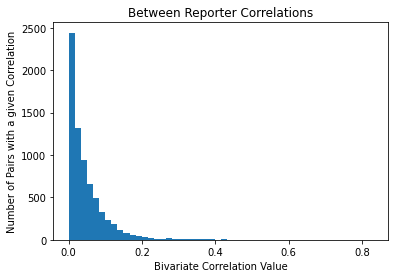

Quantiles forParent Report on Other Family Members x Parent Self Report
0.10    0.003968
0.20    0.008439
0.25    0.011076
0.30    0.013767
0.40    0.020383
0.50    0.030005
0.60    0.041083
0.70    0.055488
0.75    0.064813
0.80    0.075165
0.90    0.112060
0.95    0.149205
Name: cor, dtype: float64


In [34]:
#Between Reporter Anlayses
i=0
cx_crr_ls=[cpr_csr,cpr_ct,cpr_fpr,cpr_ppr,csr_ct,csr_fpr,csr_ppr,ct_fpr,ct_ppr,fpr_ppr]

names=["Parent Report on Child x Child Self Report","Parent Report on Child x Child Task",
       "Parent Report on Child x Parent Report on Other Family Members", "Parent Report on Child vs Parent Self Report",
      "Child Self Report x Child Task","Child Self Report x Parent Report on Other Family Members",
      "Child Self Report x Parent Self Report","Child Task x Parent Report on Other Family Members",
      "Child Task x Parent Self Report","Parent Report on Other Family Members x Parent Self Report"]
cx_crrs=[]
for v,n in zip(cx_crr_ls,names):
    crr2=abs(v)
    sn.heatmap(crr2,cmap="Reds")
    plt.title("Correlation Among "+str(n))
    plt.xlabel('Variable Names')
    plt.ylabel('Variable Names')
    plt.show()
    crr5 = crr2.stack().reset_index()
    #set column names
    crr5['2scor']=crrb['cor']
    crr5.columns = ['var1','var2','cor','2scor']
    crr5=crr5[crr5['cor']<1]
    crr5.drop_duplicates(subset ="cor", 
                         keep = "first", inplace = True) 
    crr5=crr5.sort_values(by='cor',ascending=False).reset_index()
    if i == 0:
        crr6=crr5
    else:
        #crr6.append(crr5)
        crr6=pd.concat([crr6,crr5])
    plt.hist(crr5['cor'],bins=50)
    plt.title(str(n)+" - absolute value")
    plt.xlabel('Bivariate Correlation Value')
    plt.ylabel('Number of Pairs with a given Correlation')
    plt.show()
    cx_crrs.append(crr5)
    #Quantiles
    i+=1
    print("Quantiles for"+str(n))
    print(crr5['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95]))
    agg_quart[str(n)]=crr6['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])
    print(crr5.iloc[:,1:4].head(15))
crr6.to_csv("stacked_cormat_cross_reporter.csv")
plt.hist(crr6['cor'],bins=50)
plt.title("Between Reporter Correlations")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
cx_crrs.append(crr6)
#Quantiles
i+=1
print("Quantiles for"+str(n))
agg_quart['cross-reporter']=crr6['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])
print(crr6['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95]))

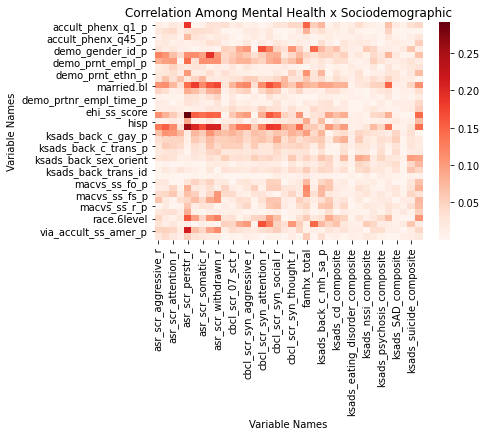

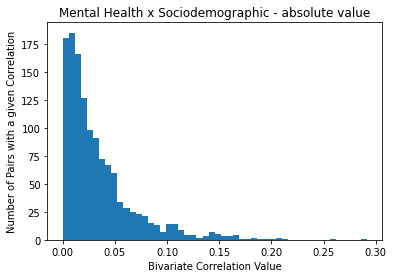

Quantiles forMental Health x Sociodemographic
0.10    0.003961
0.20    0.008349
0.25    0.010501
0.30    0.012385
0.40    0.017084
0.50    0.022951
0.60    0.030058
0.70    0.039272
0.75    0.045883
0.80    0.051841
0.90    0.078750
0.95    0.106308
Name: cor, dtype: float64
                    var1                      var2       cor
0           high.educ.bl          asr_scr_perstr_r  0.291474
1    household.income.bl          asr_scr_perstr_r  0.257472
2   via_accult_ss_amer_p          asr_scr_perstr_r  0.214003
3    household.income.bl         asr_scr_thought_r  0.209395
4    household.income.bl       asr_scr_withdrawn_r  0.207698
5    household.income.bl       asr_scr_rulebreak_r  0.202809
6        demo_prnt_age_p         asr_scr_thought_r  0.192568
7      accult_phenx_q1_p          asr_scr_perstr_r  0.188529
8    household.income.bl  cbcl_scr_syn_rulebreak_r  0.186146
9             married.bl       asr_scr_rulebreak_r  0.183262
10   household.income.bl     cbcl_scr_syn_social_r  0

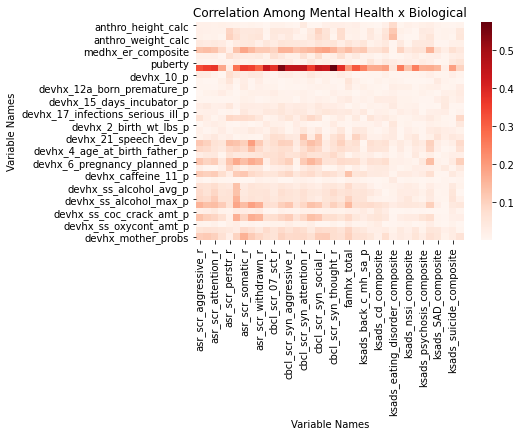

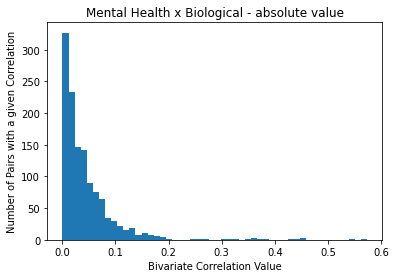

Quantiles forMental Health x Biological
0.10    0.004069
0.20    0.008271
0.25    0.011150
0.30    0.013470
0.40    0.019624
0.50    0.028509
0.60    0.038901
0.70    0.049350
0.75    0.058430
0.80    0.067371
0.90    0.098139
0.95    0.135805
Name: cor, dtype: float64
                var1                       var2       cor
0   sleep_ss_total_p     cbcl_scr_syn_thought_r  0.573211
1   sleep_ss_total_p       cbcl_scr_07_stress_r  0.546521
2   sleep_ss_total_p   cbcl_scr_syn_attention_r  0.453517
3   sleep_ss_total_p  cbcl_scr_syn_aggressive_r  0.452189
4   sleep_ss_total_p      cbcl_scr_syn_anxdep_r  0.450250
5   sleep_ss_total_p      cbcl_scr_syn_social_r  0.445609
6   sleep_ss_total_p          cbcl_scr_07_ocd_r  0.435204
7   sleep_ss_total_p     cbcl_scr_syn_somatic_r  0.431512
8   sleep_ss_total_p     cbcl_scr_syn_withdep_r  0.381455
9   sleep_ss_total_p          cbcl_scr_07_sct_r  0.377294
10  sleep_ss_total_p        asr_scr_attention_r  0.370529
11  sleep_ss_total_p          asr_

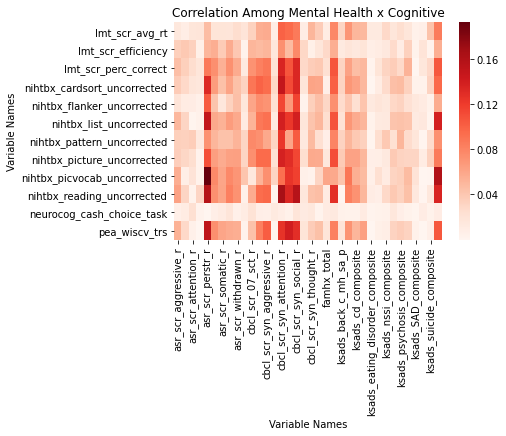

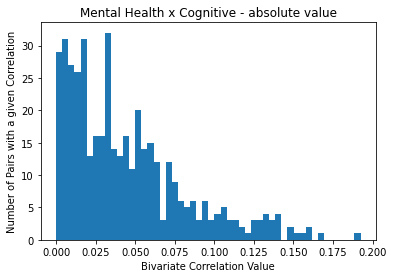

Quantiles forMental Health x Cognitive
0.10    0.005146
0.20    0.011537
0.25    0.014796
0.30    0.017862
0.40    0.026662
0.50    0.033902
0.60    0.044940
0.70    0.056094
0.75    0.061519
0.80    0.072268
0.90    0.099254
0.95    0.126707
Name: cor, dtype: float64
                           var1                             var2       cor
0   nihtbx_picvocab_uncorrected                 asr_scr_perstr_r  0.192388
1    nihtbx_reading_uncorrected         cbcl_scr_syn_attention_r  0.166671
2   nihtbx_picvocab_uncorrected  prodrom_psych_ss_severity_score  0.160469
3    nihtbx_reading_uncorrected                 asr_scr_perstr_r  0.158196
4    nihtbx_reading_uncorrected            cbcl_scr_syn_social_r  0.157742
5                 pea_wiscv_trs                 asr_scr_perstr_r  0.152353
6       nihtbx_list_uncorrected                 asr_scr_perstr_r  0.149761
7   nihtbx_cardsort_uncorrected         cbcl_scr_syn_attention_r  0.149129
8                 pea_wiscv_trs         cbcl_scr_syn_rul

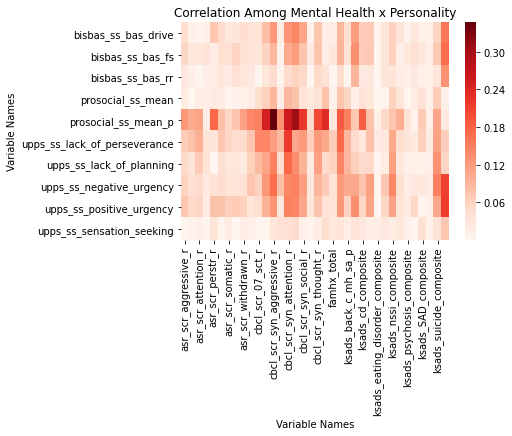

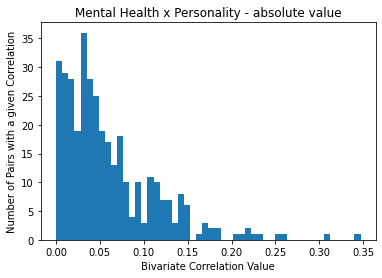

Quantiles forMental Health x Personality
0.10    0.009279
0.20    0.017277
0.25    0.021920
0.30    0.028212
0.40    0.035120
0.50    0.044492
0.60    0.056194
0.70    0.073297
0.75    0.080261
0.80    0.098638
0.90    0.130782
0.95    0.151946
Name: cor, dtype: float64
                            var1                             var2       cor
0            prosocial_ss_mean_p        cbcl_scr_syn_aggressive_r  0.346901
1            prosocial_ss_mean_p         cbcl_scr_syn_rulebreak_r  0.307226
2            prosocial_ss_mean_p         cbcl_scr_syn_attention_r  0.257490
3            prosocial_ss_mean_p             cbcl_scr_07_stress_r  0.250127
4            prosocial_ss_mean_p           cbcl_scr_syn_withdep_r  0.235667
5            prosocial_ss_mean_p            cbcl_scr_syn_social_r  0.223177
6   upps_ss_lack_of_perseverance         cbcl_scr_syn_attention_r  0.220148
7       upps_ss_positive_urgency  prodrom_psych_ss_severity_score  0.216222
8       upps_ss_negative_urgency  prodrom_psy

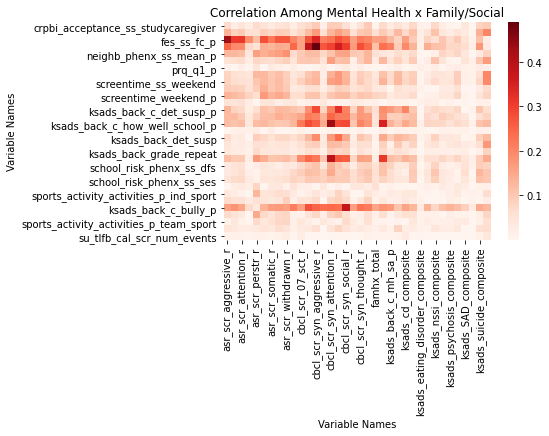

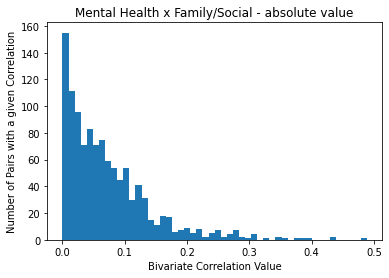

Quantiles forMental Health x Family/Social
0.10    0.007407
0.20    0.016050
0.25    0.020565
0.30    0.026754
0.40    0.040716
0.50    0.055061
0.60    0.070599
0.70    0.089400
0.75    0.099836
0.80    0.113256
0.90    0.157799
0.95    0.207540
Name: cor, dtype: float64
                              var1                       var2       cor
0            ksads_back_conflict_p  cbcl_scr_syn_aggressive_r  0.488648
1   ksads_back_c_how_well_school_p   cbcl_scr_syn_attention_r  0.433673
2                      fes_ss_fc_p       asr_scr_aggressive_r  0.431255
3    ksads_back_grades_in_school_p   cbcl_scr_syn_attention_r  0.396904
4            ksads_back_conflict_p       cbcl_scr_07_stress_r  0.385105
5             ksads_back_c_bully_p      cbcl_scr_syn_social_r  0.380531
6            ksads_back_conflict_p   cbcl_scr_syn_rulebreak_r  0.358835
7   ksads_back_c_how_well_school_p       ksads_adhd_composite  0.348078
8                      fes_ss_fc_p  cbcl_scr_syn_aggressive_r  0.342791
9      

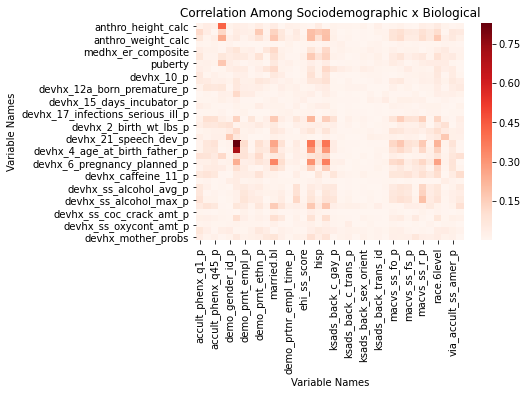

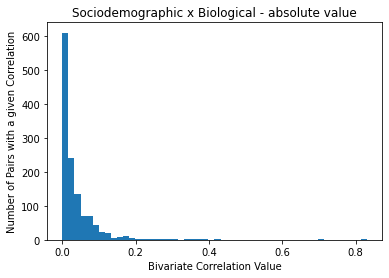

Quantiles forSociodemographic x Biological
0.10    0.002603
0.20    0.005474
0.25    0.006820
0.30    0.008572
0.40    0.012566
0.50    0.017207
0.60    0.024783
0.70    0.036750
0.75    0.044917
0.80    0.053824
0.90    0.085566
0.95    0.118185
Name: cor, dtype: float64
                             var1                 var2       cor
0   devhx_3_age_at_birth_mother_p      demo_prnt_age_p  0.829947
1   devhx_4_age_at_birth_father_p      demo_prnt_age_p  0.711141
2              anthro_height_calc                  age  0.428268
3   devhx_3_age_at_birth_mother_p  household.income.bl  0.387828
4   devhx_3_age_at_birth_mother_p         high.educ.bl  0.377453
5     devhx_6_pregnancy_planned_p  household.income.bl  0.360141
6     devhx_6_pregnancy_planned_p           married.bl  0.346469
7     devhx_6_pregnancy_planned_p         high.educ.bl  0.312823
8   devhx_4_age_at_birth_father_p  household.income.bl  0.297667
9   devhx_4_age_at_birth_father_p         high.educ.bl  0.289741
10    devhx_

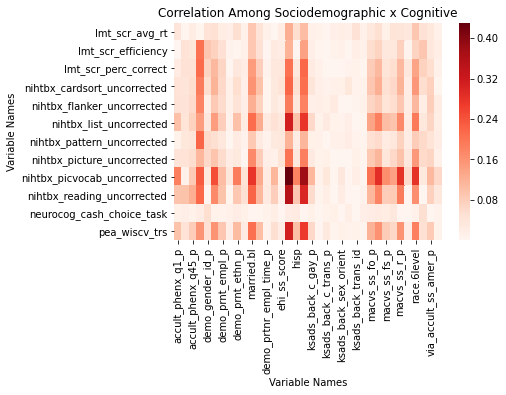

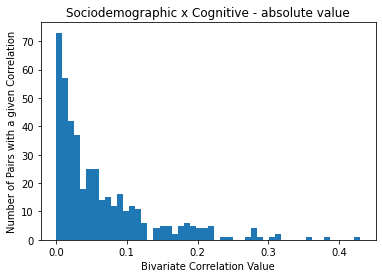

Quantiles forSociodemographic x Cognitive
0.10    0.004119
0.20    0.009836
0.25    0.013127
0.30    0.017288
0.40    0.026681
0.50    0.037076
0.60    0.054370
0.70    0.075375
0.75    0.089396
0.80    0.103789
0.90    0.168926
0.95    0.207982
Name: cor, dtype: float64
                           var1                 var2       cor
0   nihtbx_picvocab_uncorrected         high.educ.bl  0.430041
1   nihtbx_picvocab_uncorrected  household.income.bl  0.380727
2    nihtbx_reading_uncorrected         high.educ.bl  0.352815
3                 pea_wiscv_trs         high.educ.bl  0.313655
4       nihtbx_list_uncorrected         high.educ.bl  0.313282
5    nihtbx_reading_uncorrected  household.income.bl  0.301609
6   nihtbx_picvocab_uncorrected        macvs_ss_fr_p  0.287700
7   nihtbx_picvocab_uncorrected         macvs_ss_r_p  0.281293
8   nihtbx_picvocab_uncorrected          race.6level  0.280791
9   nihtbx_picvocab_uncorrected           married.bl  0.278635
10      nihtbx_list_uncorrected  ho

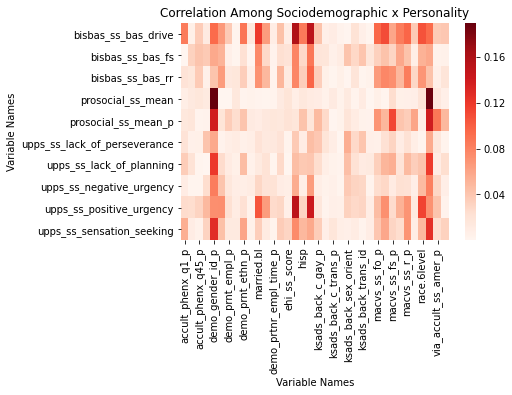

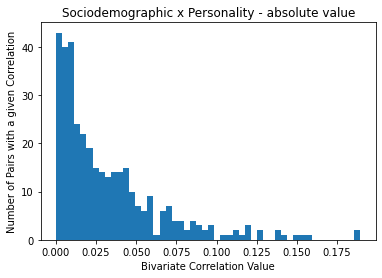

Quantiles forSociodemographic x Personality
0.10    0.002973
0.20    0.006916
0.25    0.008363
0.30    0.010017
0.40    0.014778
0.50    0.021250
0.60    0.029971
0.70    0.039813
0.75    0.043041
0.80    0.049905
0.90    0.075550
0.95    0.097702
Name: cor, dtype: float64
                         var1                 var2       cor
0           prosocial_ss_mean     demo_gender_id_p  0.189483
1           prosocial_ss_mean                  sex  0.187887
2         bisbas_ss_bas_drive         high.educ.bl  0.158660
3         bisbas_ss_bas_drive  household.income.bl  0.151687
4    upps_ss_positive_urgency         high.educ.bl  0.151527
5    upps_ss_positive_urgency  household.income.bl  0.141688
6         prosocial_ss_mean_p                  sex  0.139309
7         prosocial_ss_mean_p     demo_gender_id_p  0.139121
8   upps_ss_sensation_seeking     demo_gender_id_p  0.127753
9   upps_ss_sensation_seeking                  sex  0.125644
10   upps_ss_lack_of_planning     demo_gender_id_p  0.1

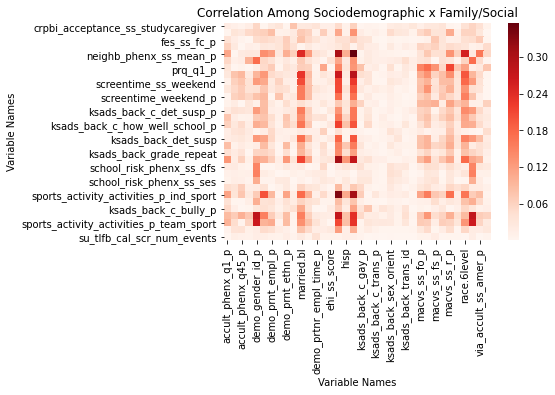

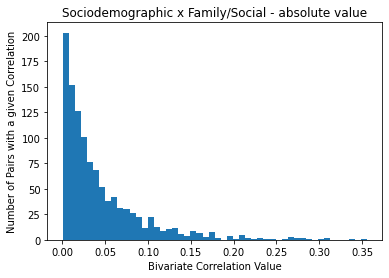

Quantiles forSociodemographic x Family/Social
0.10    0.003535
0.20    0.008014
0.25    0.010555
0.30    0.013518
0.40    0.019354
0.50    0.026915
0.60    0.037066
0.70    0.050698
0.75    0.060411
0.80    0.071774
0.90    0.109274
0.95    0.153350
Name: cor, dtype: float64
                                        var1                 var2       cor
0                     neighb_phenx_ss_mean_p  household.income.bl  0.355761
1     sports_activity_activities_p_ind_sport         high.educ.bl  0.337210
2              ksads_back_grades_in_school_p         high.educ.bl  0.310306
3     sports_activity_activities_p_ind_sport  household.income.bl  0.309214
4                     neighb_phenx_ss_mean_p         high.educ.bl  0.304784
5                      screentime_ss_weekday  household.income.bl  0.286840
6   sports_activity_activities_p_performance     demo_gender_id_p  0.279638
7   sports_activity_activities_p_performance                  sex  0.278902
8              ksads_back_grades_in_scho

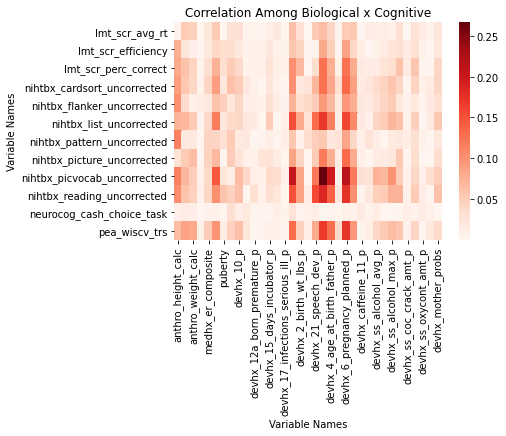

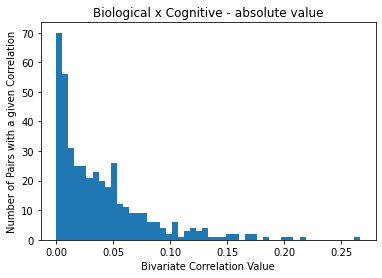

Quantiles forBiological x Cognitive
0.10    0.003247
0.20    0.006833
0.25    0.008805
0.30    0.010703
0.40    0.017902
0.50    0.027446
0.60    0.037834
0.70    0.049318
0.75    0.053472
0.80    0.062329
0.90    0.091413
0.95    0.126887
Name: cor, dtype: float64
                           var1                           var2       cor
0   nihtbx_picvocab_uncorrected  devhx_3_age_at_birth_mother_p  0.266780
1   nihtbx_picvocab_uncorrected    devhx_6_pregnancy_planned_p  0.216116
2   nihtbx_picvocab_uncorrected    devhx_18_mnths_breast_fed_p  0.206802
3   nihtbx_picvocab_uncorrected  devhx_4_age_at_birth_father_p  0.197922
4    nihtbx_reading_uncorrected  devhx_3_age_at_birth_mother_p  0.185939
5                 pea_wiscv_trs    devhx_6_pregnancy_planned_p  0.174969
6    nihtbx_reading_uncorrected    devhx_6_pregnancy_planned_p  0.174929
7       nihtbx_list_uncorrected  devhx_3_age_at_birth_mother_p  0.170286
8                 pea_wiscv_trs  devhx_3_age_at_birth_mother_p  0.167814
9   

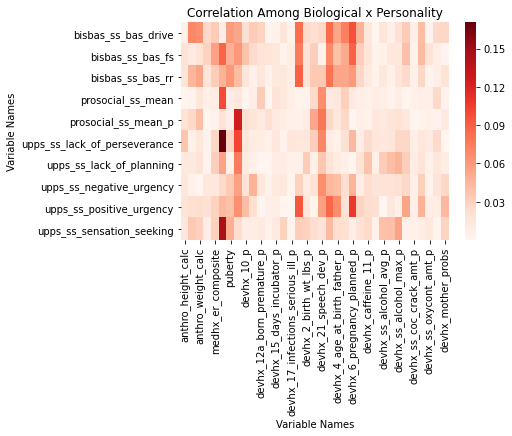

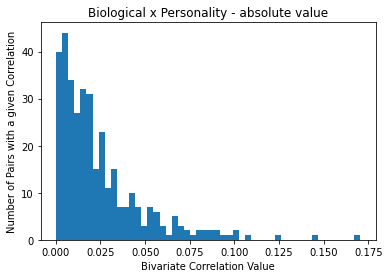

Quantiles forBiological x Personality
0.10    0.003288
0.20    0.005915
0.25    0.007182
0.30    0.008991
0.40    0.013297
0.50    0.016850
0.60    0.021304
0.70    0.026624
0.75    0.031875
0.80    0.038669
0.90    0.055765
0.95    0.074240
Name: cor, dtype: float64
                            var1                           var2       cor
0   upps_ss_lack_of_perseverance            physical_activity_1  0.170606
1      upps_ss_sensation_seeking            physical_activity_1  0.146121
2            prosocial_ss_mean_p               sleep_ss_total_p  0.125501
3       upps_ss_positive_urgency    devhx_6_pregnancy_planned_p  0.108580
4   upps_ss_lack_of_perseverance               sleep_ss_total_p  0.101633
5              prosocial_ss_mean            physical_activity_1  0.100347
6            bisbas_ss_bas_drive    devhx_6_pregnancy_planned_p  0.097544
7       upps_ss_positive_urgency    devhx_18_mnths_breast_fed_p  0.094626
8               bisbas_ss_bas_rr    devhx_18_mnths_breast_fed_p  0

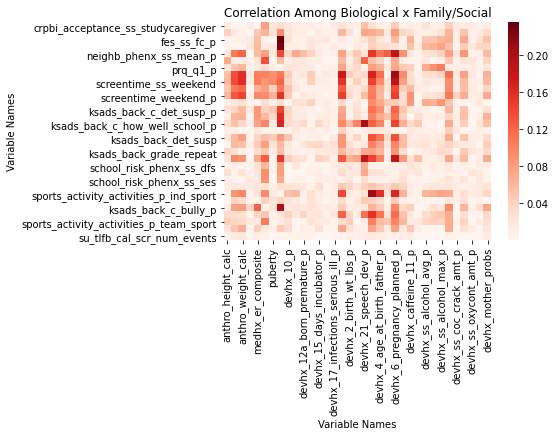

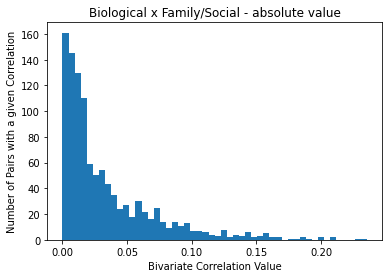

Quantiles forBiological x Family/Social
0.10    0.003146
0.20    0.006474
0.25    0.008293
0.30    0.010574
0.40    0.014087
0.50    0.018652
0.60    0.027930
0.70    0.038141
0.75    0.047484
0.80    0.057972
0.90    0.086113
0.95    0.113341
Name: cor, dtype: float64
                                      var1                           var2  \
0                              fes_ss_fc_p               sleep_ss_total_p   
1                    ksads_back_conflict_p               sleep_ss_total_p   
2   sports_activity_activities_p_ind_sport  devhx_3_age_at_birth_mother_p   
3                    screentime_ss_weekday    devhx_6_pregnancy_planned_p   
4           ksads_back_c_how_well_school_p          devhx_21_speech_dev_p   
5                     ksads_back_c_bully_p               sleep_ss_total_p   
6                   neighb_phenx_ss_mean_p    devhx_6_pregnancy_planned_p   
7            ksads_back_grades_in_school_p    devhx_6_pregnancy_planned_p   
8                    screentime_ss_we

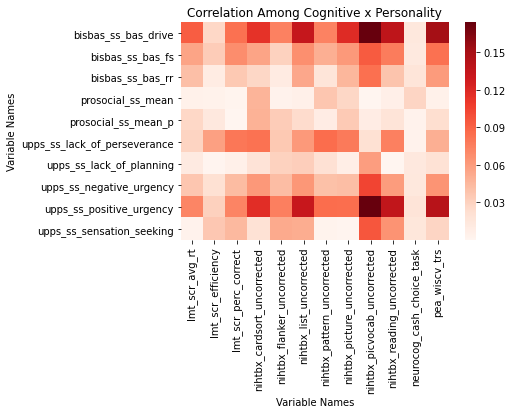

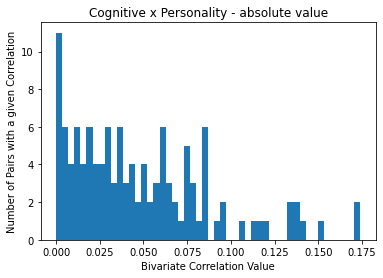

Quantiles forCognitive x Personality
0.10    0.004508
0.20    0.013221
0.25    0.016602
0.30    0.020657
0.40    0.029647
0.50    0.037717
0.60    0.050408
0.70    0.062558
0.75    0.072415
0.80    0.077780
0.90    0.097187
0.95    0.133598
Name: cor, dtype: float64
                         var1                         var2       cor
0    upps_ss_positive_urgency  nihtbx_picvocab_uncorrected  0.174080
1         bisbas_ss_bas_drive  nihtbx_picvocab_uncorrected  0.173530
2         bisbas_ss_bas_drive                pea_wiscv_trs  0.152200
3    upps_ss_positive_urgency                pea_wiscv_trs  0.141677
4         bisbas_ss_bas_drive   nihtbx_reading_uncorrected  0.137583
5    upps_ss_positive_urgency   nihtbx_reading_uncorrected  0.136344
6         bisbas_ss_bas_drive      nihtbx_list_uncorrected  0.133454
7    upps_ss_positive_urgency      nihtbx_list_uncorrected  0.132989
8         bisbas_ss_bas_drive   nihtbx_picture_uncorrected  0.118689
9    upps_ss_positive_urgency  nihtbx_cards

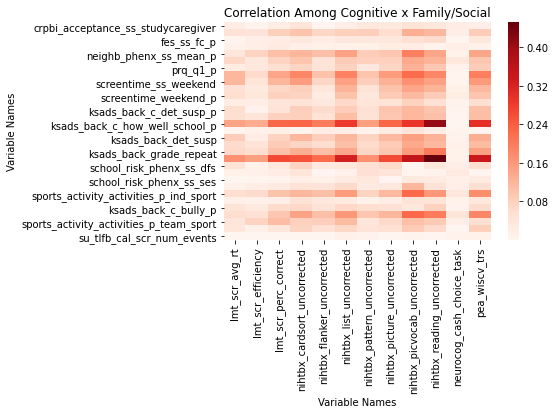

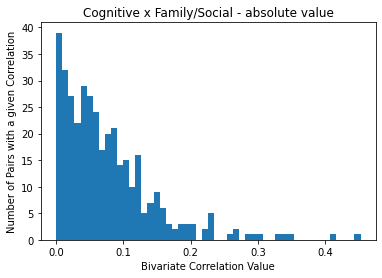

Quantiles forCognitive x Family/Social
0.10    0.008713
0.20    0.019070
0.25    0.024300
0.30    0.033744
0.40    0.045075
0.50    0.058846
0.60    0.075030
0.70    0.094894
0.75    0.106219
0.80    0.117434
0.90    0.154443
0.95    0.204022
Name: cor, dtype: float64
                                        var1                         var2  \
0              ksads_back_grades_in_school_p   nihtbx_reading_uncorrected   
1             ksads_back_c_how_well_school_p   nihtbx_reading_uncorrected   
2              ksads_back_grades_in_school_p  nihtbx_picvocab_uncorrected   
3              ksads_back_grades_in_school_p                pea_wiscv_trs   
4              ksads_back_grades_in_school_p      nihtbx_list_uncorrected   
5             ksads_back_c_how_well_school_p                pea_wiscv_trs   
6             ksads_back_c_how_well_school_p  nihtbx_picvocab_uncorrected   
7             ksads_back_c_how_well_school_p      nihtbx_list_uncorrected   
8              ksads_back_grades_in_sc

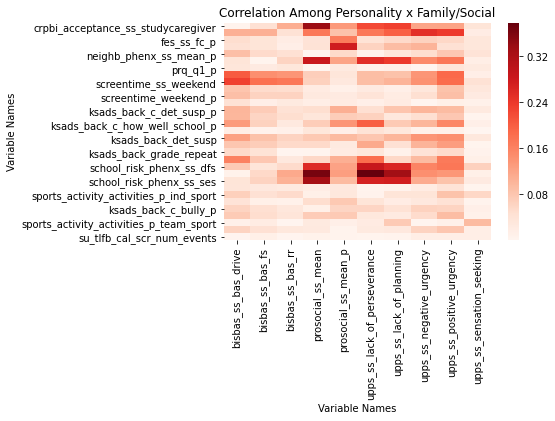

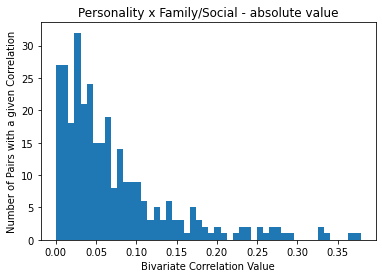

Quantiles forPersonality x Family/Social
0.10    0.010504
0.20    0.017849
0.25    0.024581
0.30    0.028865
0.40    0.038166
0.50    0.048865
0.60    0.064051
0.70    0.081010
0.75    0.093394
0.80    0.107527
0.90    0.171315
0.95    0.236022
Name: cor, dtype: float64
                                  var1                          var2       cor
0            school_risk_phenx_ss_iiss  upps_ss_lack_of_perseverance  0.378537
1            school_risk_phenx_ss_iiss             prosocial_ss_mean  0.366267
2   crpbi_acceptance_ss_studycaregiver             prosocial_ss_mean  0.337509
3            school_risk_phenx_ss_iiss      upps_ss_lack_of_planning  0.331891
4             school_risk_phenx_ss_ses             prosocial_ss_mean  0.329214
5             school_risk_phenx_ss_dfs  upps_ss_lack_of_perseverance  0.288801
6          parental_monitoring_ss_mean             prosocial_ss_mean  0.286726
7                ksads_back_conflict_p           prosocial_ss_mean_p  0.278503
8             scho

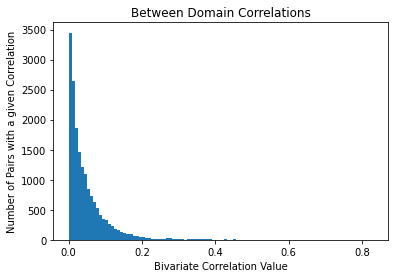

Quantiles for all between domain
0.10    0.003959
0.20    0.008388
0.25    0.010958
0.30    0.013543
0.40    0.019838
0.50    0.029083
0.60    0.039932
0.70    0.053860
0.75    0.062862
0.80    0.074261
0.90    0.110222
0.95    0.148202
Name: cor, dtype: float64
                               var1                            var2       cor
0             screentime_ss_weekend            screentime_weekend_p  0.272269
1   prodrom_psych_ss_severity_score         ksads_bipolar_composite  0.271288
2             screentime_ss_weekday            screentime_weekend_p  0.265375
3             screentime_ss_weekday               screentime_week_p  0.252434
4      upps_ss_lack_of_perseverance        cbcl_scr_syn_attention_r  0.220148
5   prodrom_psych_ss_severity_score           ksads_depressive_comp  0.214943
6   prodrom_psych_ss_severity_score         ksads_suicide_composite  0.211224
7             screentime_ss_weekday   ksads_back_grades_in_school_p  0.204315
8      upps_ss_lack_of_perseverance

In [35]:
#Between Domain Anlayses
cx_crr_ls=[mh_sd,mh_bio,mh_cog,mh_per,mh_fam,sd_bio,sd_cog,sd_per,sd_fam,bio_cog,bio_per,bio_bam,
           cog_per,cog_fam,per_fam]
names=["Mental Health x Sociodemographic","Mental Health x Biological","Mental Health x Cognitive",
      "Mental Health x Personality","Mental Health x Family/Social","Sociodemographic x Biological",
      "Sociodemographic x Cognitive","Sociodemographic x Personality","Sociodemographic x Family/Social",
      "Biological x Cognitive","Biological x Personality","Biological x Family/Social","Cognitive x Personality",
      "Cognitive x Family/Social","Personality x Family/Social"]
cx_crrs=[]
for v,n in zip(cx_crr_ls,names):
    crr2=abs(v)
    sn.heatmap(crr2,cmap="Reds")
    plt.title("Correlation Among "+str(n))
    plt.xlabel('Variable Names')
    plt.ylabel('Variable Names')
    plt.show()
    crr5 = crr2.stack().reset_index()
    #set column names
    crr5['2scor']=crrb['cor']
    crr5.columns = ['var1','var2','cor','2scor']
    crr5=crr5[crr5['cor']<1]
    crr5.drop_duplicates(subset ="cor", 
                         keep = "first", inplace = True) 
    crr5=crr5.sort_values(by='cor',ascending=False).reset_index()
    if i == 0:
        crr6=crr5
    else:
        #crr6.append(crr5)
        crr6=pd.concat([crr6,crr5])
    plt.hist(crr5['cor'],bins=50)
    plt.title(str(n)+" - absolute value")
    plt.xlabel('Bivariate Correlation Value')
    plt.ylabel('Number of Pairs with a given Correlation')
    plt.show()
    cx_crrs.append(crr5)
    #Quantiles
    i+=1
    print("Quantiles for"+str(n))
    print(crr5['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95]))
    agg_quart[str(n)]=crr6['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])
    print(crr5.iloc[:,1:4].head(15))
crr6.to_csv("stacked_cormat_cross_domain.csv")
plt.hist(crr6['cor'],bins=100)
plt.title("Between Domain Correlations")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
cx_crrs.append(crr6)
#Quantiles
i+=1
print("Quantiles for all between domain")
print(crr6['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95]))
agg_quart['cross-domain']=crr6['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])
print(crr6.iloc[:,1:4].head(15))

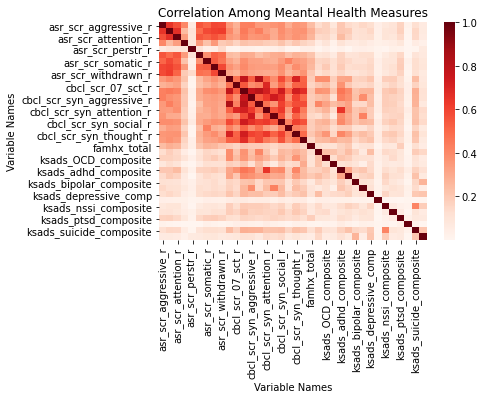

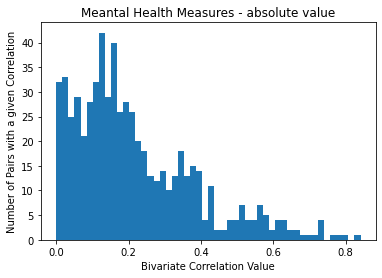

Quantiles for Meantal Health Measures
0.10    0.033262
0.20    0.070095
0.25    0.097862
0.30    0.113173
0.40    0.142734
0.50    0.169606
0.60    0.211632
0.70    0.268823
0.75    0.308424
0.80    0.348803
0.90    0.451955
0.95    0.566578
Name: cor, dtype: float64
                         var1                       var2       cor
0           cbcl_scr_07_ocd_r      cbcl_scr_syn_anxdep_r  0.840904
1        cbcl_scr_07_stress_r      cbcl_scr_syn_anxdep_r  0.806205
2           cbcl_scr_07_ocd_r       cbcl_scr_07_stress_r  0.783895
3        cbcl_scr_07_stress_r  cbcl_scr_syn_aggressive_r  0.762449
4   cbcl_scr_syn_aggressive_r   cbcl_scr_syn_rulebreak_r  0.739774
5        cbcl_scr_07_stress_r      cbcl_scr_syn_social_r  0.739525
6        cbcl_scr_07_stress_r     cbcl_scr_syn_thought_r  0.733901
7        cbcl_scr_07_stress_r   cbcl_scr_syn_attention_r  0.726098
8           cbcl_scr_07_ocd_r     cbcl_scr_syn_thought_r  0.713116
9           cbcl_scr_07_sct_r   cbcl_scr_syn_attention_r  0.69

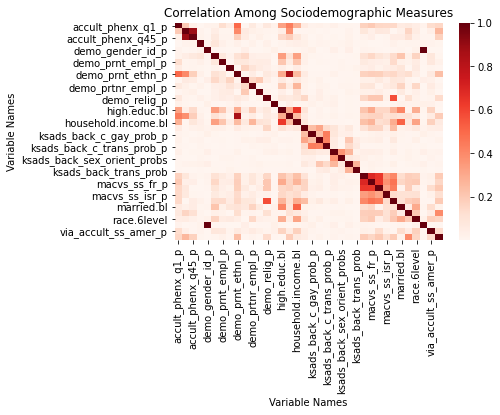

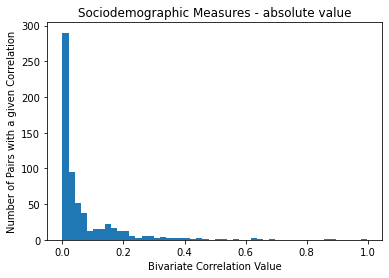

Quantiles for Sociodemographic Measures
0.10    0.002524
0.20    0.006265
0.25    0.007638
0.30    0.009564
0.40    0.015123
0.50    0.024326
0.60    0.038120
0.70    0.060657
0.75    0.078721
0.80    0.123821
0.90    0.197012
0.95    0.295973
Name: cor, dtype: float64
                       var1                       var2       cor
0          demo_gender_id_p                        sex  0.996621
1         accult_phenx_q2_p         accult_phenx_q45_p  0.890693
2          demo_prnt_ethn_p                       hisp  0.858580
3             macvs_ss_fo_p              macvs_ss_fr_p  0.695854
4             macvs_ss_fo_p              macvs_ss_fs_p  0.643678
5             macvs_ss_fr_p              macvs_ss_fs_p  0.637596
6              high.educ.bl        household.income.bl  0.637097
7              demo_relig_p               macvs_ss_r_p  0.575769
8       household.income.bl                 married.bl  0.519143
9         accult_phenx_q1_p           demo_prnt_ethn_p  0.500900
10            m

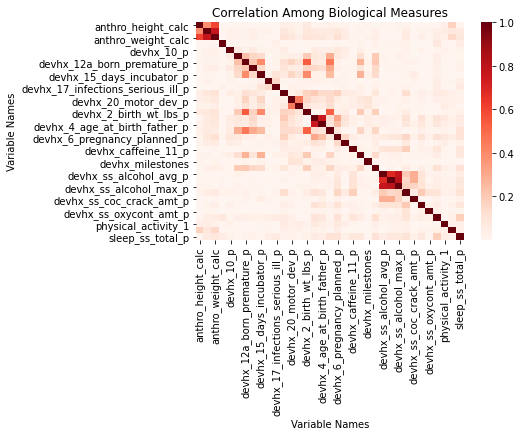

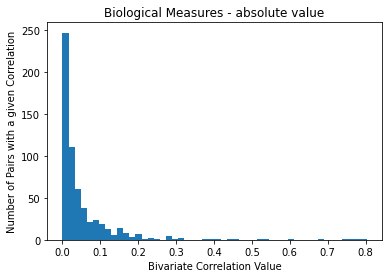

Quantiles for Biological Measures
0.10    0.003384
0.20    0.006860
0.25    0.008648
0.30    0.011170
0.40    0.015210
0.50    0.022186
0.60    0.031983
0.70    0.047770
0.75    0.060176
0.80    0.079181
0.90    0.135875
0.95    0.196114
Name: cor, dtype: float64
                             var1                           var2       cor
0      devhx_ss_alcohol_effects_p         devhx_ss_alcohol_max_p  0.803315
1                 anthro_waist_cm             anthro_weight_calc  0.772342
2          devhx_ss_alcohol_avg_p         devhx_ss_alcohol_max_p  0.770481
3   devhx_3_age_at_birth_mother_p  devhx_4_age_at_birth_father_p  0.754519
4          devhx_ss_alcohol_avg_p     devhx_ss_alcohol_effects_p  0.689345
5              anthro_height_calc             anthro_weight_calc  0.601646
6      devhx_12a_born_premature_p         devhx_2_birth_wt_lbs_p  0.536431
7          devhx_2_birth_wt_lbs_p                 devhx_5_twin_p  0.530101
8      devhx_12a_born_premature_p                 devhx_5_twi

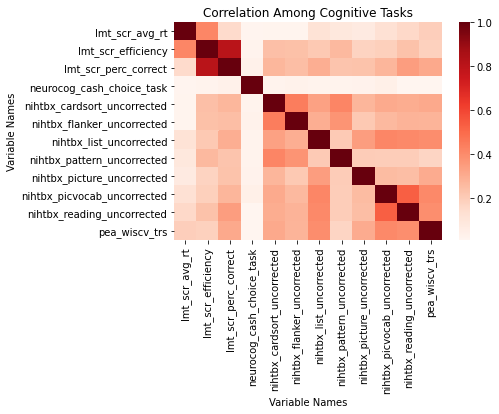

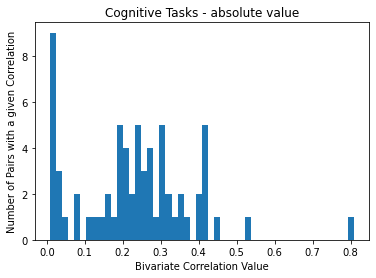

Quantiles for Cognitive Tasks
0.10    0.021398
0.20    0.072674
0.25    0.131281
0.30    0.171888
0.40    0.200853
0.50    0.237296
0.60    0.263270
0.70    0.297321
0.75    0.305923
0.80    0.333795
0.90    0.409652
0.95    0.421155
Name: cor, dtype: float64
                           var1                         var2       cor
0            lmt_scr_efficiency         lmt_scr_perc_correct  0.809430
1   nihtbx_picvocab_uncorrected   nihtbx_reading_uncorrected  0.532498
2   nihtbx_cardsort_uncorrected   nihtbx_flanker_uncorrected  0.444713
3   nihtbx_cardsort_uncorrected   nihtbx_pattern_uncorrected  0.422257
4       nihtbx_list_uncorrected  nihtbx_picvocab_uncorrected  0.417848
5                lmt_scr_avg_rt           lmt_scr_efficiency  0.415179
6       nihtbx_list_uncorrected   nihtbx_reading_uncorrected  0.410183
7   nihtbx_picvocab_uncorrected                pea_wiscv_trs  0.409120
8       nihtbx_list_uncorrected                pea_wiscv_trs  0.397806
9    nihtbx_reading_uncorrecte

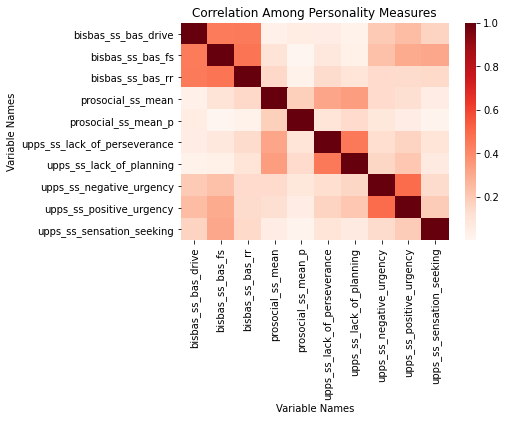

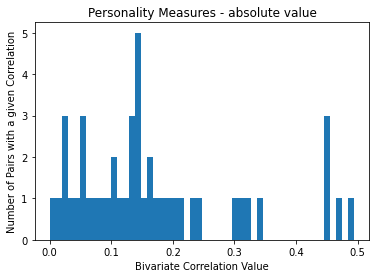

Quantiles for Personality Measures
0.10    0.030908
0.20    0.054850
0.25    0.075353
0.30    0.098462
0.40    0.130673
0.50    0.144129
0.60    0.154010
0.70    0.190030
0.75    0.210754
0.80    0.253512
0.90    0.404739
0.95    0.453436
Name: cor, dtype: float64
                            var1                          var2       cor
0       upps_ss_negative_urgency      upps_ss_positive_urgency  0.494339
1               bisbas_ss_bas_fs              bisbas_ss_bas_rr  0.465176
2   upps_ss_lack_of_perseverance      upps_ss_lack_of_planning  0.454262
3            bisbas_ss_bas_drive              bisbas_ss_bas_rr  0.450133
4            bisbas_ss_bas_drive              bisbas_ss_bas_fs  0.447165
5              prosocial_ss_mean      upps_ss_lack_of_planning  0.341100
6              prosocial_ss_mean  upps_ss_lack_of_perseverance  0.318480
7               bisbas_ss_bas_fs     upps_ss_sensation_seeking  0.312391
8               bisbas_ss_bas_fs      upps_ss_positive_urgency  0.297349
9    

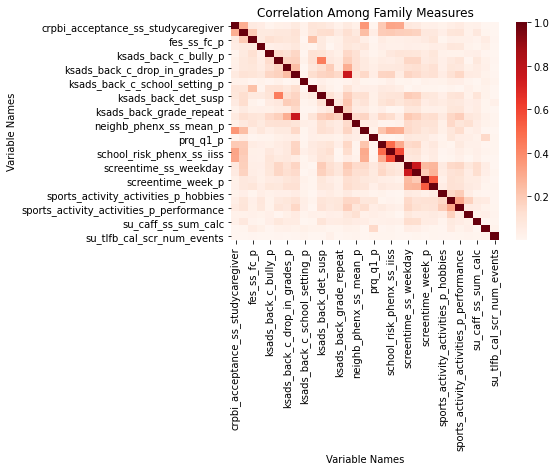

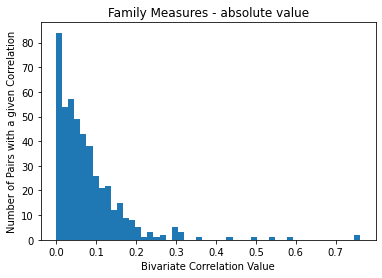

Quantiles for Family Measures
0.10    0.008237
0.20    0.019476
0.25    0.024760
0.30    0.031639
0.40    0.042362
0.50    0.058145
0.60    0.072230
0.70    0.091661
0.75    0.101968
0.80    0.120888
0.90    0.162786
0.95    0.203918
Name: cor, dtype: float64
                                      var1  \
0           ksads_back_c_how_well_school_p   
1                    screentime_ss_weekday   
2                school_risk_phenx_ss_iiss   
3                        screentime_week_p   
4                 school_risk_phenx_ss_dfs   
5                  ksads_back_c_det_susp_p   
6       crpbi_acceptance_ss_studycaregiver   
7       crpbi_acceptance_ss_studycaregiver   
8       crpbi_acceptance_ss_studycaregiver   
9   sports_activity_activities_p_ind_sport   
10                school_risk_phenx_ss_dfs   
11             parental_monitoring_ss_mean   
12           ksads_back_c_drop_in_grades_p   
13             parental_monitoring_ss_mean   
14      crpbi_acceptance_ss_studycaregiver   

   

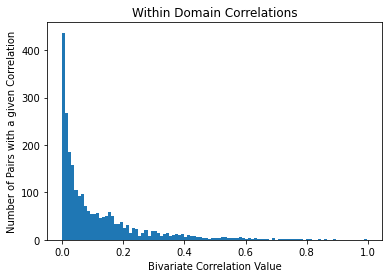

Quantiles for all within domain
0.10    0.005227
0.20    0.011178
0.25    0.015276
0.30    0.020949
0.40    0.034620
0.50    0.056422
0.60    0.087781
0.70    0.132657
0.75    0.156221
0.80    0.186094
0.90    0.303737
0.95    0.410039
Name: cor, dtype: float64
                         var1                       var2       cor
0           cbcl_scr_07_ocd_r      cbcl_scr_syn_anxdep_r  0.840904
1        cbcl_scr_07_stress_r      cbcl_scr_syn_anxdep_r  0.806205
2           cbcl_scr_07_ocd_r       cbcl_scr_07_stress_r  0.783895
3        cbcl_scr_07_stress_r  cbcl_scr_syn_aggressive_r  0.762449
4   cbcl_scr_syn_aggressive_r   cbcl_scr_syn_rulebreak_r  0.739774
5        cbcl_scr_07_stress_r      cbcl_scr_syn_social_r  0.739525
6        cbcl_scr_07_stress_r     cbcl_scr_syn_thought_r  0.733901
7        cbcl_scr_07_stress_r   cbcl_scr_syn_attention_r  0.726098
8           cbcl_scr_07_ocd_r     cbcl_scr_syn_thought_r  0.713116
9           cbcl_scr_07_sct_r   cbcl_scr_syn_attention_r  0.694771
1

In [36]:
#Within Domain Analyses
i=0
cx_crr_ls=[data_mentalhealth,data_sociodemographic,data_biological,
           data_cognitive,data_personality,data_family]

names=["Meantal Health Measures","Sociodemographic Measures","Biological Measures",
       "Cognitive Tasks",'Personality Measures', "Family Measures"]
cx_crrs=[]
for v,n in zip(cx_crr_ls,names):
    datacr=v
    datacr=datacr.sort_index(axis=1)
    crr2=datacr.corr(method='pearson')
    crr2=abs(crr2)
    sn.heatmap(crr2,cmap="Reds")
    plt.title("Correlation Among "+str(n))
    plt.xlabel('Variable Names')
    plt.ylabel('Variable Names')
    plt.show()
    crr5 = crr2.stack().reset_index()
    #set column names
    crr5['2scor']=crrb['cor']
    crr5.columns = ['var1','var2','cor','2scor']
    crr5=crr5[crr5['cor']<1]
    crr5.drop_duplicates(subset ="cor", 
                         keep = "first", inplace = True) 
    crr5=crr5.sort_values(by='cor',ascending=False).reset_index()
    if i == 0:
        crr6=crr5
    else:
        #crr6.append(crr5)
        crr6=pd.concat([crr6,crr5])
    plt.hist(crr5['cor'],bins=50)
    plt.title(str(n)+" - absolute value")
    plt.xlabel('Bivariate Correlation Value')
    plt.ylabel('Number of Pairs with a given Correlation')
    plt.show()
    cx_crrs.append(crr5)
    #Quantiles
    i+=1
    print("Quantiles for "+str(n))
    print(crr5['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95]))
    agg_quart[str(n)]=crr6['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])
    print(crr5.iloc[:,1:4].head(15))
crr6.to_csv("stacked_cormat_within_domain.csv")
plt.hist(crr6['cor'],bins=100)
plt.title("Within Domain Correlations")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
cx_crrs.append(crr5)
#Quantiles
i+=1
print("Quantiles for all within domain")
print(crr6['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95]))
agg_quart['within-domain']=crr6['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])
print(crr6.iloc[:,1:4].head(15))

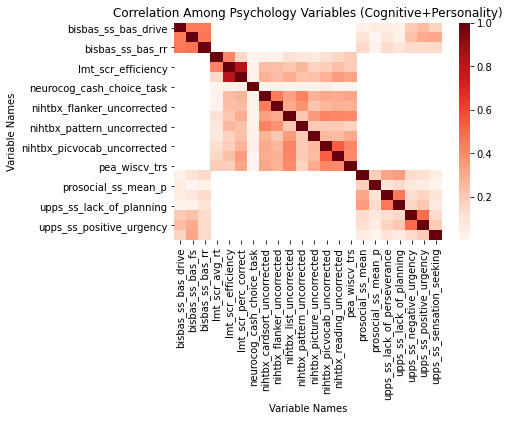

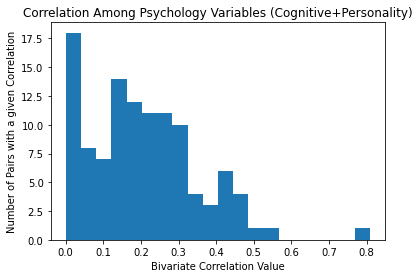

In [37]:
datacr1=pd.concat([data_personality,data_cognitive])
datacr1=datacr1.sort_index(axis=1)
crr=datacr1.corr(method='pearson')
crr=abs(crr)
sn.heatmap(crr,cmap="Reds")
plt.title("Correlation Among Psychology Variables (Cognitive+Personality)")
plt.xlabel('Variable Names')
plt.ylabel('Variable Names')
plt.show()
crr2 = crr.stack().reset_index()
#set column names
crr2.columns = ['var1','var2','cor']
crr2=crr2[crr2['cor']<1]
crr2.drop_duplicates(subset ="cor", 
                     keep = "first", inplace = True) 
crr2=crr2.sort_values(by='cor',ascending=False)
#crr4.info()
plt.hist(crr2['cor'],bins=20)
plt.title("Correlation Among Psychology Variables (Cognitive+Personality)")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()

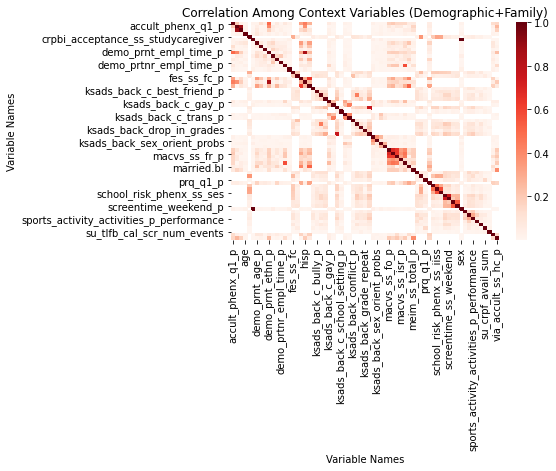

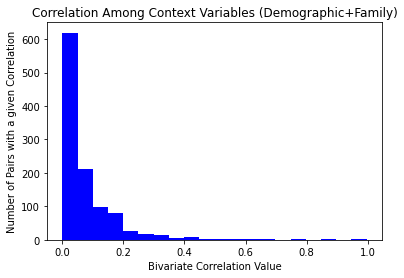

In [38]:
datacr1=pd.concat([data_sociodemographic,data_family])
datacr1=datacr1.sort_index(axis=1)
crr=datacr1.corr(method='pearson')
crr=abs(crr)
sn.heatmap(crr,cmap="Reds")
plt.title("Correlation Among Context Variables (Demographic+Family)")
plt.xlabel('Variable Names')
plt.ylabel('Variable Names')
plt.show()
crr2 = crr.stack().reset_index()
#set column names
crr2.columns = ['var1','var2','cor']
crr2=crr2[crr2['cor']<1]
crr2.drop_duplicates(subset ="cor", 
                     keep = "first", inplace = True) 
crr2=crr2.sort_values(by='cor',ascending=False)
#crr4.info()
plt.hist(crr2['cor'],bins=20,color='b')
plt.title("Correlation Among Context Variables (Demographic+Family)")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()

In [39]:
covs=['age','sex','high.educ.bl','household.income.bl','married.bl','hisp','race.6level']
#data_covvars=datacr[covs]
#datacovs=datacr.drop(covs, axis=1)
varr=data_fin.columns
varr2=varr.drop(covs)

In [40]:
data['demo_relig_p']

0        1.0
1        1.0
2        0.0
3        0.0
4        1.0
        ... 
11870    0.0
11871    1.0
11872    0.0
11873    1.0
11874    1.0
Name: demo_relig_p, Length: 11875, dtype: float64

In [41]:
data_fin.to_csv("dataset_postproc.csv")

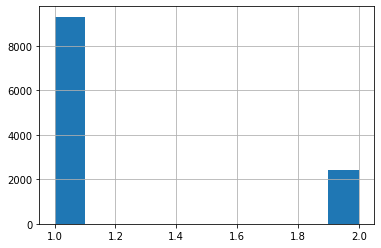

In [42]:
data['hisp'].hist()

In [43]:
missingness=data_fin.isna().sum()
mssrt=missingness.sort_values(ascending=False)
mssrt[mssrt>1]
#mssrt.to_csv('/home/max/Dropbox/ABCD/DRD/missingvals.csv')

devhx_23b_age_wet_bed_p    6512
ksads_back_trans_id        4706
demo_prnt_empl_time_p      3696
demo_prtnr_empl_time_p     3663
ksads_back_sex_orient      3026
                           ... 
asr_scr_perstr_r              5
asr_scr_rulebreak_r           5
asr_scr_somatic_r             5
demo_relig_p                  5
demo_prnt_empl_p              3
Length: 149, dtype: int64

In [44]:
#partial correlations (use NDA covariates)
varr2=varr.drop('demo_prtnr_empl_p')
varr2=varr2.drop('demo_prnt_empl_time_p')
varr2=varr2.drop('devhx_milestones')
varr2=varr2.drop('devhx_23b_age_wet_bed_p')
#comat=pingouin.pairwise_corr(data=data_fin,columns=varr2,covar=covs,method='pearson',tail='two-sided',nan_policy='pairwise')
#comat.to_csv("partial_corr_matrix_notwins.csv")

In [45]:
#p-values for no covariates
#comat=pingouin.pairwise_corr(data=data_fin,columns=varr,covar=None,method='pearson',tail='two-sided',nan_policy='pairwise')
#comat.to_csv("corr_matrix_wpvals_notwins.csv")
#manually removed devhx_23b_age_wet_bed_p x devhx_ss_9_oxycont_amt_p correlatoin because it was blank (presumably no instances)

In [46]:
#core=pd.read_csv('corr_matrix_wpvals_tookforeveredontdelete.csv')
#pcore=pd.read_csv('partial_corr_matrix_final_tookforeveredontdelete.csv')
core=pd.read_csv('corr_matrix_wpvals1.csv')
pcore=pd.read_csv('partial_corr_matrix1.csv')

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


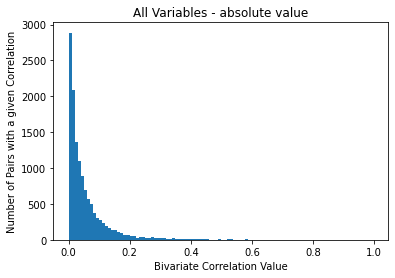

index       cor         pvals
0.10   1287.90  0.004078  4.155808e-51
0.20   2575.80  0.008695  4.516085e-20
0.25   3219.75  0.011333  1.832287e-14
0.30   3863.70  0.014091  1.293891e-10
0.40   5151.60  0.021084  5.103675e-06
0.50   6439.50  0.030800  1.116619e-03
0.60   7727.40  0.042916  2.765693e-02
0.70   9015.30  0.059930  1.420852e-01
0.75   9659.25  0.071777  2.400053e-01
0.80  10303.20  0.085801  3.667245e-01
0.90  11591.10  0.139313  6.698900e-01
0.95  12235.05  0.201978  8.330248e-01

In [47]:
#redo main anlaysis from above to confirm new cor tool works the same
rsa=core.iloc[:,[1,2,6,11]]
#set column names
rsa.columns = ['var1','var2','cor','pvals']
rsa['cor']=abs(rsa['cor'])
rsa.drop_duplicates(subset ="cor", 
                     keep = "first", inplace = True) 
rsa=rsa.sort_values(by='cor',ascending=False).reset_index()
rsa.to_csv("stacked_cormat_abs.csv")
plt.hist(rsa['cor'],bins=100)
plt.title("All Variables - absolute value")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
#Quantiles
rsa.quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95],axis=0)

In [48]:
core['n'].quantile(q=[.099,.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])

0.099     9911.0
0.100    10026.8
0.200    10858.0
0.250    11207.0
0.300    11374.0
0.400    11559.6
0.500    11660.0
0.600    11708.0
0.700    11794.0
0.750    11840.0
0.800    11846.0
0.900    11862.0
0.950    11867.0
Name: n, dtype: float64

In [49]:
core[core['n']==3276]

Unnamed: 0                        X                    Y   method  \
6931        6931  devhx_23b_age_wet_bed_p  ksads_back_trans_id  pearson   

           tail     n         r          CI95%            r2    adj_r2  \
6931  two-sided  3276 -0.000554  [-0.03  0.03]  3.071068e-07 -0.000611   

             z     p-unc   BF10    power  
6931 -0.000554  0.974706  0.022  0.05011

In [50]:
core.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12880 entries, 0 to 12879
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12880 non-null  int64  
 1   X           12880 non-null  object 
 2   Y           12880 non-null  object 
 3   method      12880 non-null  object 
 4   tail        12880 non-null  object 
 5   n           12880 non-null  int64  
 6   r           12880 non-null  float64
 7   CI95%       12880 non-null  object 
 8   r2          12880 non-null  float64
 9   adj_r2      12880 non-null  float64
 10  z           12880 non-null  float64
 11  p-unc       12880 non-null  float64
 12  BF10        12879 non-null  float64
 13  power       12880 non-null  float64
dtypes: float64(7), int64(2), object(5)
memory usage: 1.4+ MB


/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


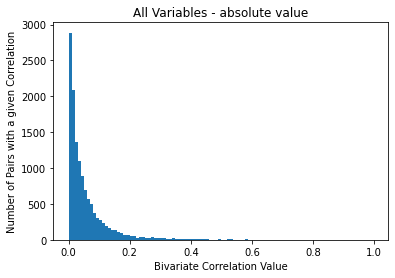

index       cor         pvals
0.10   1287.90  0.004078  4.155808e-51
0.20   2575.80  0.008695  4.516085e-20
0.25   3219.75  0.011333  1.832287e-14
0.30   3863.70  0.014091  1.293891e-10
0.40   5151.60  0.021084  5.103675e-06
0.50   6439.50  0.030800  1.116619e-03
0.60   7727.40  0.042916  2.765693e-02
0.70   9015.30  0.059930  1.420852e-01
0.75   9659.25  0.071777  2.400053e-01
0.80  10303.20  0.085801  3.667245e-01
0.90  11591.10  0.139313  6.698900e-01
0.95  12235.05  0.201978  8.330248e-01

In [51]:
rsa=core.iloc[:,[1,2,6,11]]
#set column names
rsa.columns = ['var1','var2','cor','pvals']
rsa['cor']=abs(rsa['cor'])
rsa.drop_duplicates(subset ="cor", 
                     keep = "first", inplace = True) 
rsa=rsa.sort_values(by='cor',ascending=False).reset_index()
rsa.to_csv("stacked_cormat_abs_png.csv")
plt.hist(rsa['cor'],bins=100)
plt.title("All Variables - absolute value")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
#Quantiles
rsa.quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95],axis=0)

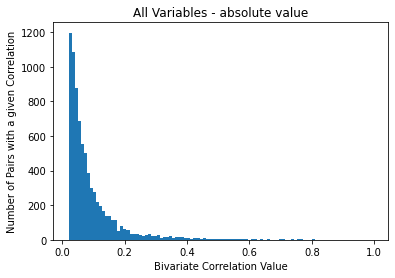

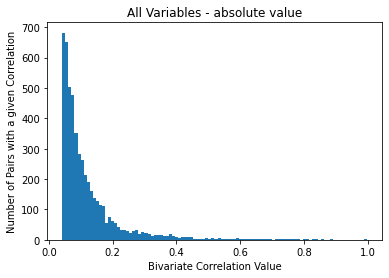

         index       cor         pvals  fdr-rej         fdr-p
0.10   1374.00  0.026215  1.149758e-86      1.0  1.902208e-85
0.20   2409.00  0.032522  9.258800e-41      1.0  7.664097e-40
0.25   3060.75  0.035902  1.387339e-30      1.0  9.188272e-30
0.30   3557.50  0.039966  1.466276e-23      1.0  8.093253e-23
0.40   4612.00  0.048520  2.993383e-15      1.0  1.239305e-14
0.50   6258.00  0.059522  1.713114e-10      1.0  5.674399e-10
0.60   7939.00  0.073821  2.435360e-07      1.0  6.722554e-07
0.70   9284.50  0.093049  2.527880e-05      1.0  5.981279e-05
0.75   9856.25  0.106467  1.470814e-04      1.0  3.248160e-04
0.80  10568.00  0.123967  5.758750e-04      1.0  1.192296e-03
0.90  11843.50  0.183247  5.732393e-03      1.0  1.054986e-02
0.95  12345.25  0.271336  1.458564e-02      1.0  2.543072e-02
         index       cor          pvals  fdr-rej          fdr-p  bon-rej  \
0.10   1422.30  0.049505  8.037036e-139      1.0  2.028397e-137      1.0   
0.20   2357.60  0.056863   5.877667e-66   

In [52]:
#set up fdr - https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html
import statsmodels.api
fdr=statsmodels.stats.multitest.multipletests(rsa['pvals'],alpha=0.05,method='fdr_bh',returnsorted=False)
rsa['fdr-rej']=DataFrame(fdr[0])
rsa['fdr-p']=DataFrame(fdr[1])
rsa_fdr=rsa
#rsa_fdr.to_csv('fdr_fulldata.csv')
#Drop non-significant correlations from fdr
rsa_fdr_t=rsa_fdr[rsa_fdr['fdr-rej']==True]

bon=statsmodels.stats.multitest.multipletests(rsa['pvals'],alpha=0.05,method='bonferroni',returnsorted=False)
rsa['bon-rej']=DataFrame(bon[0])
rsa['bon-p']=DataFrame(bon[1])
rsa_bon=rsa
#Drop non-significant correlations from fdr
rsa_bon_t=rsa_bon[rsa_bon['bon-rej']==True]
plt.hist(rsa_fdr_t['cor'],bins=100)
plt.title("All Variables - absolute value")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
plt.hist(rsa_bon_t['cor'],bins=100)
plt.title("All Variables - absolute value")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
#Quantiles
agg_quart['fdr']=rsa_fdr_t['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])
agg_quart['bon']=rsa_bon_t['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])
print(rsa_fdr_t.quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95],axis=0))
print(rsa_bon_t.quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95],axis=0))

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


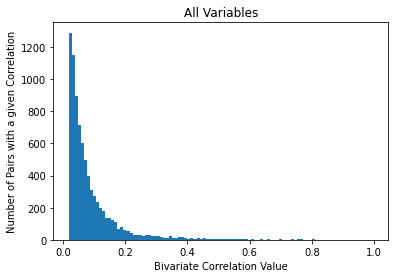

index       cor         pvals
0.10   1287.90  0.004078  4.155808e-51
0.20   2575.80  0.008695  4.516085e-20
0.25   3219.75  0.011333  1.832287e-14
0.30   3863.70  0.014091  1.293891e-10
0.40   5151.60  0.021084  5.103675e-06
0.50   6439.50  0.030800  1.116619e-03
0.60   7727.40  0.042916  2.765693e-02
0.70   9015.30  0.059930  1.420852e-01
0.75   9659.25  0.071777  2.400053e-01
0.80  10303.20  0.085801  3.667245e-01
0.90  11591.10  0.139313  6.698900e-01
0.95  12235.05  0.201978  8.330248e-01

In [53]:
#Drop non-significant correlations
rsa=core.iloc[:,[1,2,6,11]]
#set column names
rsa.columns = ['var1','var2','cor','pvals']
rsa['cor']=abs(rsa['cor'])
rsa.drop_duplicates(subset ="cor", 
                     keep = "first", inplace = True) 
rsa=rsa.sort_values(by='cor',ascending=False).reset_index()
rsat=rsa[rsa['pvals']<.05]
rsa.to_csv("stacked_cormat_abs.csv")
plt.hist(rsat['cor'],bins=100)
plt.title("All Variables")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
#Quantiles
agg_quart['.05']=rsat['cor'].quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95])
rsa.quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95],axis=0)

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


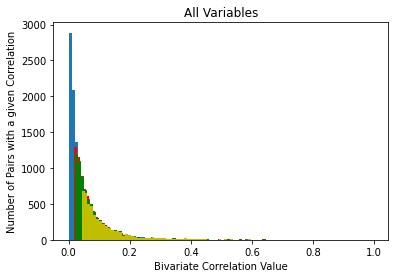

0.042380767014383605

In [82]:
#show sig and non-sig correlations
rsa=core.iloc[:,[1,2,6,11]]
#set column names
rsa.columns = ['var1','var2','cor','pvals']
rsa['cor']=abs(rsa['cor'])
rsa.drop_duplicates(subset ="cor", 
                     keep = "first", inplace = True) 
rsa=rsa.sort_values(by='cor',ascending=False).reset_index()
rsat=rsa[rsa['pvals']<.05]
#rsa.to_csv("stacked_cormat_abs.csv")
plt.hist(rsa['cor'],bins=100)
plt.hist(rsat['cor'],bins=100,color='r')
plt.hist(rsa_fdr_t['cor'],bins=100,color='g')
plt.hist(rsa_bon_t['cor'],bins=100,color='y')
plt.title("All Variables")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
#Quantiles
rsa_bon_t.quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95],axis=0)
rsa_bon_t['cor'].min()

In [55]:
rsat.quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9],axis=0)

index       cor         pvals
0.10   1355.90  0.023993  5.455631e-82
0.20   2401.80  0.030495  1.275602e-38
0.25   3053.75  0.033702  6.344262e-29
0.30   3560.70  0.037498  4.874840e-22
0.40   4651.60  0.046173  2.503739e-14
0.50   6274.50  0.057177  9.940880e-10
0.60   7903.80  0.071495  8.578572e-07
0.70   9280.30  0.089908  7.639355e-05
0.75   9858.25  0.103738  3.569998e-04
0.80  10564.20  0.120831  1.256143e-03
0.90  11823.10  0.177358  1.181271e-02

In [56]:
rsa_bon_t.tail(40)

index                                var1  \
5132   1980                 asr_scr_rulebreak_r   
5134   3278                   cbcl_scr_07_sct_r   
5136   6756                devhx_20_motor_dev_p   
5137   9472                 ksads_OCD_composite   
5138    999                  anthro_weight_calc   
5139   1444                 asr_scr_attention_r   
5140   5307               demo_prnt_gender_id_p   
5141   9055                        high.educ.bl   
5142   9198                                hisp   
5143     93                   accult_phenx_q1_p   
5144    807                     anthro_waist_cm   
5146   2296                 asr_scr_withdrawn_r   
5147   3103                   cbcl_scr_07_ocd_r   
5148   4585  crpbi_acceptance_ss_studycaregiver   
5149   3944            cbcl_scr_syn_rulebreak_r   
5151   3689               cbcl_scr_syn_anxdep_r   
5153   3967            cbcl_scr_syn_rulebreak_r   
5155  10317       ksads_back_c_school_setting_p   
5158  11827                       macvs_ss_fs_p   
5160   1991                 asr_scr_rulebreak_r   
5161   3990               cbcl_scr_syn_social_r   
5162   9045                         fes_ss_fc_p   
5164   1719                    asr_scr_perstr_r   
5165    163                   accult_phenx_q2_p   
5166   7990                  devhx_mother_probs   
5167    806                     anthro_waist_cm   
5168  10588                 ksads_back_det_susp   
5169   2005                   asr_scr_somatic_r   
5170  12209          nihtbx_flanker_uncorrected   
5171   6683                devhx_20_motor_dev_p   
5173  12588                             puberty   
5175     29                   accult_phenx_q1_p   
5178   5361               demo_prnt_gender_id_p   
5180   3488           cbcl_scr_syn_aggressive_r   
5184   2679                    bisbas_ss_bas_fs   
5186   4622  crpbi_acceptance_ss_studycaregiver   
5191   1896                 asr_scr_rulebreak_r   
5196   2682                    bisbas_ss_bas_fs   
5199    779                  anthro_height_calc   
5200   2103                   asr_scr_somatic_r   

                                         var2       cor     pvals  fdr-rej  \
5132                school_risk_phenx_ss_iiss  0.043111  0.000003     True   
5134  sports_activity_activities_p_team_sport  0.043076  0.000003     True   
5136                    screentime_ss_weekend  0.043048  0.000003     True   
5137                 upps_ss_negative_urgency  0.043043  0.000003     True   
5138                       devhx_mother_probs  0.043043  0.000003     True   
5139                    devhx_21_speech_dev_p  0.043024  0.000003     True   
5140                    ksads_back_conflict_p  0.043021  0.000003     True   
5141                      ksads_OCD_composite  0.043014  0.000003     True   
5142                      prosocial_ss_mean_p  0.042990  0.000003     True   
5143                  ksads_back_grade_repeat  0.042990  0.000003     True   
5144                cbcl_scr_syn_aggressive_r  0.042988  0.000003     True   
5146                         bisbas_ss_bas_fs  0.042970  0.000003     True   
5147                            macvs_ss_fs_p  0.042958  0.000003     True   
5148              nihtbx_cardsort_uncorrected  0.042952  0.000003     True   
5149                                  puberty  0.042947  0.000003     True   
5151  sports_activity_activities_p_team_sport  0.042934  0.000003     True   
5153                     via_accult_ss_amer_p  0.042864  0.000003     True   
5155             upps_ss_lack_of_perseverance  0.042832  0.000003     True   
5158                        screentime_week_p  0.042809  0.000003     True   
5160  sports_activity_activities_p_team_sport  0.042804  0.000003     True   
5161                     devhx_20_motor_dev_p  0.042792  0.000004     True   
5162             upps_ss_lack_of_perseverance  0.042784  0.000003     True   
5164                 cbcl_scr_syn_rulebreak_r  0.042748  0.000003     True   
5165                          anthro_waist

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


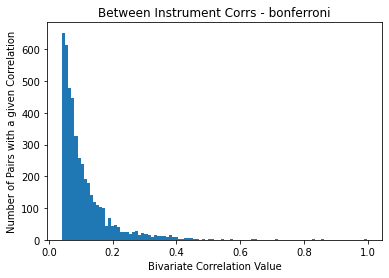

index       cor          pvals  fdr-rej          fdr-p  bon-rej  \
0.1000   1360.7000  0.049030  1.616325e-108      1.0  3.279963e-107      1.0   
0.1665   1990.7405  0.053438   1.131182e-67      1.0   1.467570e-66      1.0   
0.2000   2245.4000  0.055885   6.817779e-58      1.0   7.528366e-57      1.0   
0.2500   2682.2500  0.059465   3.499068e-45      1.0   3.146652e-44      1.0   
0.3000   3282.1000  0.063226   3.475136e-37      1.0   2.668872e-36      1.0   
0.4000   4060.6000  0.072678   5.032448e-26      1.0   2.972204e-25      1.0   
0.5000   5165.5000  0.083064   5.777144e-19      1.0   2.780589e-18      1.0   
0.6000   7525.4000  0.098064   6.503677e-15      1.0   2.648182e-14      1.0   
0.7000   9138.8000  0.118068   1.248886e-11      1.0   4.414403e-11      1.0   
0.7500   9864.7500  0.130339   1.666685e-10      1.0   5.523443e-10      1.0   
0.8000  10658.2000  0.147836   2.426252e-09      1.0   7.561852e-09      1.0   
0.8335  11200.5190  0.160341   1.031717e-08      1.0   3.096646e-08      1.0   
0.9000  11954.2000  0.202734   1.457726e-07      1.0   4.075164e-07      1.0   
0.9500  12397.1500  0.276556   8.142081e-07      1.0   2.161755e-06      1.0   

                bon-p  redun  
0.1000  2.081827e-104    0.0  
0.1665   1.456962e-63    0.0  
0.2000   8.781299e-54    0.0  
0.2500   4.506800e-41    0.0  
0.3000   4.475976e-33    0.0  
0.4000   6.481794e-22    0.0  
0.5000   7.440961e-15    0.0  
0.6000   8.376736e-11    0.0  
0.7000   1.608565e-07    0.0  
0.7500   2.146690e-06    0.0  
0.8000   3.125012e-05    0.0  
0.8335   1.328851e-04    0.0  
0.9000   1.877551e-03    0.0  
0.9500   1.048700e-02    0.0

In [57]:
cr=rsa_bon_t
cr['redun'] = cr['var1'].astype(str).str[0:3]==cr['var2'].astype(str).str[0:3]
cr=cr[cr['redun']==False]
plt.hist(cr['cor'],bins=100)
plt.title("Between Instrument Corrs - bonferroni")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
#cr.to_csv("noredun_stacked_cormat_abs.csv")
agg_quart['between-instrument']=cr['cor'].quantile(q=[.1,.1665,.2,.25,.3,.4,.5,.6,.7,.75,.8,.8335,.9,.95])
cr.quantile(q=[.1,.1665,.2,.25,.3,.4,.5,.6,.7,.75,.8,.8335,.9,.95],axis=0)

In [58]:
DataFrame(data.columns).to_csv("colnames.csv")

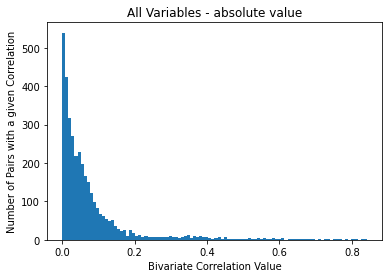

index       cor     2scor
0.1000   371.9000  0.005326 -0.061380
0.1665   630.2385  0.009277 -0.036888
0.2000   758.8000  0.011880 -0.029506
0.2500   970.2500  0.015407 -0.019016
0.3000  1175.7000  0.018781 -0.012434
0.4000  1637.6000  0.029898 -0.001158
0.5000  2109.5000  0.042654  0.009251
0.6000  2669.4000  0.056488  0.023392
0.7000  3278.3000  0.075231  0.044214
0.7500  3622.7500  0.087271  0.057810
0.8000  3983.2000  0.105090  0.077133
0.8335  4288.5980  0.122439  0.102223
0.9000  4923.1000  0.178024  0.178856
0.9500  5601.5500  0.334115  0.356609

In [59]:
dtypes=pd.read_csv('es_dtypes3.csv')
contin=dtypes[dtypes['types']=='c']
contin=contin['names']
data_contin=data[contin]
data_contin=data_contin.dropna(axis=1,how="all")
data_contin=data_contin.sort_index(axis=1)
crr=data_contin.corr(method='pearson')
crr=abs(crr)
crr4 = crr.stack().reset_index()
#set column names
crr4['2scor']=crrb['cor']
crr4.columns = ['var1','var2','cor','2scor']
crr4=crr4[crr4['cor']<1]
crr4.drop_duplicates(subset ="cor", 
                     keep = "first", inplace = True) 
crr4=crr4.sort_values(by='cor',ascending=False).reset_index()
crr4.to_csv("stacked_cormat_abs_pd.csv")
plt.hist(crr4['cor'],bins=100)
plt.title("All Variables - absolute value")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
crr_fin=crr4
#Quantiles
agg_quart['continuous']=crr4['cor'].quantile(q=[.1,.1665,.2,.25,.3,.4,.5,.6,.7,.75,.8,.8335,.9,.95])
crr4.quantile(q=[.1,.1665,.2,.25,.3,.4,.5,.6,.7,.75,.8,.8335,.9,.95],axis=0)

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


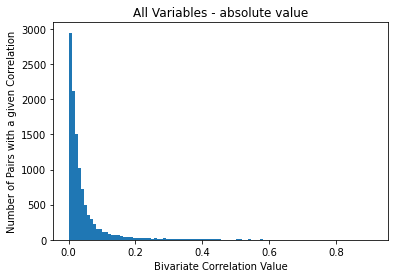

index       cor         pvals
0.1000   1117.400  0.003226  3.405873e-27
0.1665   1860.471  0.005538  3.364224e-12
0.2000   2234.800  0.006797  3.527147e-09
0.2500   2793.500  0.008619  1.999708e-06
0.3000   3352.200  0.010591  8.290527e-05
0.4000   4469.600  0.015264  4.304792e-03
0.5000   5587.000  0.021053  3.486333e-02
0.6000   6704.400  0.028419  1.265606e-01
0.7000   7821.800  0.039355  2.882230e-01
0.7500   8380.500  0.046955  3.894272e-01
0.8000   8939.200  0.058084  4.970691e-01
0.8335   9313.529  0.068685  5.809735e-01
0.9000  10056.600  0.105660  7.495820e-01
0.9500  10615.300  0.178704  8.748439e-01

In [60]:
#Partial Correlations controlling for NDA covariates
prsa=pcore.iloc[:,[1,2,7,12]]
#set column names
prsa.columns = ['var1','var2','cor','pvals']
prsa['cor']=abs(prsa['cor'])
prsa.drop_duplicates(subset ="cor", 
                     keep = "first", inplace = True) 
prsa=prsa.sort_values(by='cor',ascending=False).reset_index()
prsa.to_csv("stacked_cormat_abs.csv")
plt.hist(prsa['cor'],bins=100)
plt.title("All Variables - absolute value")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
#Quantiles
agg_quart['partial']=prsa['cor'].quantile(q=[.1,.1665,.2,.25,.3,.4,.5,.6,.7,.75,.8,.8335,.9,.95])
prsa.quantile(q=[.1,.1665,.2,.25,.3,.4,.5,.6,.7,.75,.8,.8335,.9,.95],axis=0)

In [61]:
agg_quart.to_csv('agg.csv')

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


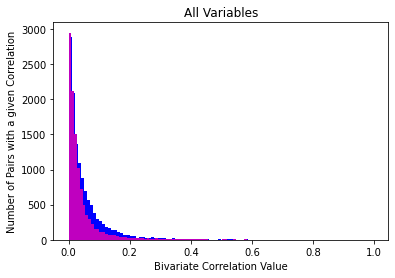

index       cor         pvals
0.1000   1175.3000  0.022894  3.403779e-69
0.1665   1787.1895  0.025567  2.799049e-32
0.2000   2070.8000  0.026737  6.490243e-25
0.2500   2616.2500  0.028928  2.277578e-17
0.3000   3031.9000  0.031620  2.559353e-13
0.4000   3825.4000  0.037210  2.168989e-08
0.5000   5302.5000  0.044776  6.601949e-06
0.6000   6707.8000  0.055303  1.929581e-04
0.7000   7963.2000  0.071910  1.475681e-03
0.7500   8437.5000  0.083596  3.523068e-03
0.8000   9019.8000  0.101390  7.173770e-03
0.8335   9319.6210  0.116259  1.001438e-02
0.9000  10186.7000  0.172019  2.147405e-02
0.9500  10690.8500  0.270933  3.389129e-02

In [62]:
#partial correlations vs full correlations
prsa=pcore.iloc[:,[1,2,7,12]]
#set column names
prsa.columns = ['var1','var2','cor','pvals']
prsa['cor']=abs(prsa['cor'])
prsa.drop_duplicates(subset ="cor", 
                     keep = "first", inplace = True) 
prsa=prsa.sort_values(by='cor',ascending=False).reset_index()
prsat=prsa[prsa['pvals']<.05]
#rsa.to_csv("stacked_cormat_abs.csv")
plt.hist(rsa['cor'],bins=100,color='b')
plt.hist(prsa['cor'],bins=100,color='m')
plt.title("All Variables")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
#Quantiles
prsat.quantile(q=[.1,.1665,.2,.25,.3,.4,.5,.6,.7,.75,.8,.8335,.9,.95],axis=0)

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


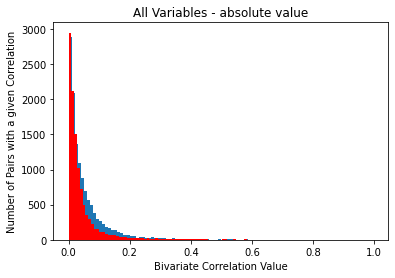

index       cor         pvals
0.1000   1175.3000  0.022894  3.403779e-69
0.1665   1787.1895  0.025567  2.799049e-32
0.2000   2070.8000  0.026737  6.490243e-25
0.2500   2616.2500  0.028928  2.277578e-17
0.3000   3031.9000  0.031620  2.559353e-13
0.4000   3825.4000  0.037210  2.168989e-08
0.5000   5302.5000  0.044776  6.601949e-06
0.6000   6707.8000  0.055303  1.929581e-04
0.7000   7963.2000  0.071910  1.475681e-03
0.7500   8437.5000  0.083596  3.523068e-03
0.8000   9019.8000  0.101390  7.173770e-03
0.8335   9319.6210  0.116259  1.001438e-02
0.9000  10186.7000  0.172019  2.147405e-02
0.9500  10690.8500  0.270933  3.389129e-02

In [63]:
#full and partial correlations without thresholding
prsa=pcore.iloc[:,[1,2,7,12]]
#set column names
prsa.columns = ['var1','var2','cor','pvals']
prsa['cor']=abs(prsa['cor'])
prsa.drop_duplicates(subset ="cor", 
                     keep = "first", inplace = True) 
prsa=prsa.sort_values(by='cor',ascending=False).reset_index()
prsat=prsa[prsa['pvals']<.05]
#rsa.to_csv("stacked_cormat_abs.csv")
plt.hist(rsa['cor'],bins=100)
plt.hist(prsa['cor'],bins=100,color='r')
plt.title("All Variables - absolute value")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
#Quantiles
prsat.quantile(q=[.1,.1665,.2,.25,.3,.4,.5,.6,.7,.75,.8,.8335,.9,.95],axis=0)

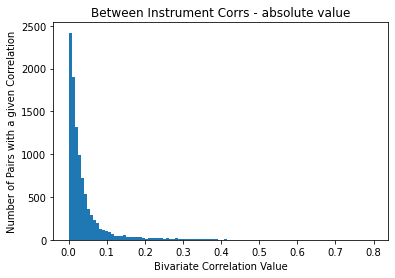

index       cor          pvals  fdr-rej          fdr-p  bon-rej  \
0.1000   1360.7000  0.049030  1.616325e-108      1.0  3.279963e-107      1.0   
0.1665   1990.7405  0.053438   1.131182e-67      1.0   1.467570e-66      1.0   
0.2000   2245.4000  0.055885   6.817779e-58      1.0   7.528366e-57      1.0   
0.2500   2682.2500  0.059465   3.499068e-45      1.0   3.146652e-44      1.0   
0.3000   3282.1000  0.063226   3.475136e-37      1.0   2.668872e-36      1.0   
0.4000   4060.6000  0.072678   5.032448e-26      1.0   2.972204e-25      1.0   
0.5000   5165.5000  0.083064   5.777144e-19      1.0   2.780589e-18      1.0   
0.6000   7525.4000  0.098064   6.503677e-15      1.0   2.648182e-14      1.0   
0.7000   9138.8000  0.118068   1.248886e-11      1.0   4.414403e-11      1.0   
0.7500   9864.7500  0.130339   1.666685e-10      1.0   5.523443e-10      1.0   
0.8000  10658.2000  0.147836   2.426252e-09      1.0   7.561852e-09      1.0   
0.8335  11200.5190  0.160341   1.031717e-08      1.0   3.096646e-08      1.0   
0.9000  11954.2000  0.202734   1.457726e-07      1.0   4.075164e-07      1.0   
0.9500  12397.1500  0.276556   8.142081e-07      1.0   2.161755e-06      1.0   

                bon-p  redun  
0.1000  2.081827e-104    0.0  
0.1665   1.456962e-63    0.0  
0.2000   8.781299e-54    0.0  
0.2500   4.506800e-41    0.0  
0.3000   4.475976e-33    0.0  
0.4000   6.481794e-22    0.0  
0.5000   7.440961e-15    0.0  
0.6000   8.376736e-11    0.0  
0.7000   1.608565e-07    0.0  
0.7500   2.146690e-06    0.0  
0.8000   3.125012e-05    0.0  
0.8335   1.328851e-04    0.0  
0.9000   1.877551e-03    0.0  
0.9500   1.048700e-02    0.0

In [64]:
prsa4=prsa
prsa4['redun'] = prsa4['var1'].astype(str).str[0:3]==prsa4['var2'].astype(str).str[0:3]
prsa4=prsa4[prsa4['redun']==False]
plt.hist(prsa4['cor'],bins=100)
plt.title("Between Instrument Corrs - absolute value")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
#cr.to_csv("noredun_stacked_cormat_abs.csv")
cr.quantile(q=[.1,.1665,.2,.25,.3,.4,.5,.6,.7,.75,.8,.8335,.9,.95],axis=0)

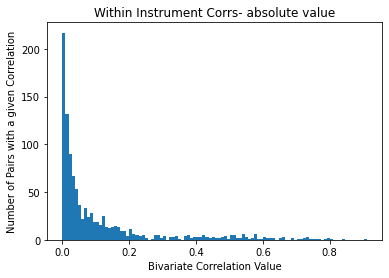

index       cor         pvals  redun
0.1000   4158.00  0.004233  0.000000e+00    1.0
0.1665   5183.16  0.007446  3.237114e-88    1.0
0.2000   5304.00  0.008852  1.991529e-61    1.0
0.2500   5614.00  0.012289  1.257934e-37    1.0
0.3000   5924.00  0.015819  1.825165e-25    1.0
0.4000   6716.00  0.025346  5.101690e-11    1.0
0.5000   8025.00  0.039054  1.382469e-04    1.0
0.6000   8325.00  0.066130  1.588039e-02    1.0
0.7000   8625.00  0.104609  1.207966e-01    1.0
0.7500   8775.00  0.127155  2.376225e-01    1.0
0.8000   8974.00  0.163829  3.810337e-01    1.0
0.8335   9106.84  0.199587  4.672952e-01    1.0
0.9000   9470.00  0.381788  6.708201e-01    1.0
0.9500  10509.00  0.538499  8.305623e-01    1.0

In [65]:
prsa4=prsa
prsa4['redun'] = prsa4['var1'].astype(str).str[0:3]==prsa4['var2'].astype(str).str[0:3]
prsa4=prsa4[prsa4['redun']==True]
plt.hist(prsa4['cor'],bins=100)
plt.title("Within Instrument Corrs- absolute value")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
prsa4.quantile(q=[.1,.1665,.2,.25,.3,.4,.5,.6,.7,.75,.8,.8335,.9,.95],axis=0)

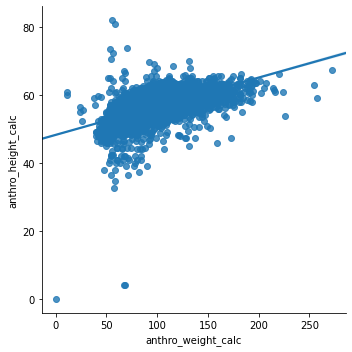

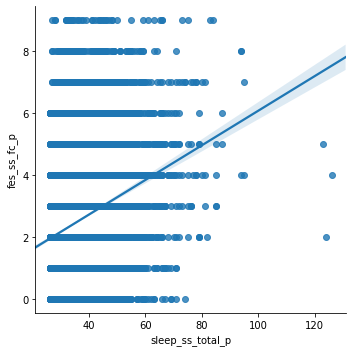

In [66]:
#sn.lmplot(x='sleep_ss_total_p',y='cbcl_scr_syn_totprob_r',data=data_fin,fit_reg=True)
sn.lmplot(x='anthro_weight_calc',y='anthro_height_calc',data=data_fin,fit_reg=True)
sn.lmplot(x='sleep_ss_total_p',y='fes_ss_fc_p',data=data_fin,fit_reg=True)
#sn.lmplot(x='ksads_back_c_how_well_school_p',y='nihtbx_totalcomp_uncorrected',data=data_fin,fit_reg=True)

In [67]:
#agg_quart.to_csv('all_quantiles.csv')

/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/max/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


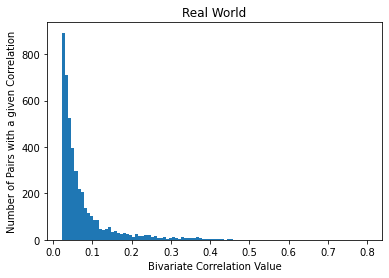

index       cor         pvals  redun         fdr-p  bon-rej  \
0.10   1148.20  0.027168  2.190513e-59    0.0  1.849325e-33      1.0   
0.20   1953.40  0.031249  8.347744e-24    0.0  2.537310e-14      1.0   
0.25   2363.50  0.033322  3.493426e-17    0.0  4.051712e-11      1.0   
0.30   2849.20  0.035606  1.365182e-13    0.0  7.846905e-09      1.0   
0.40   3512.80  0.041190  3.044292e-09    0.0  4.514886e-06      1.0   
0.50   4420.00  0.048169  1.063890e-06    0.0  1.382244e-04      1.0   
0.60   6285.60  0.058516  3.250386e-05    0.0  1.378010e-03      1.0   
0.70   7690.40  0.072722  3.402496e-04    0.0  6.309558e-03      1.0   
0.75   8283.50  0.082610  7.953159e-04    0.0  1.174446e-02      1.0   
0.80   8994.20  0.098578  1.666405e-03    0.0  1.953204e-02      1.0   
0.90  10208.80  0.158753  6.148625e-03    0.0  4.601925e-02      1.0   
0.95  10709.90  0.234082  9.784171e-03    0.0  6.833702e-02      1.0   
0.99  11025.76  0.370608  1.576392e-02    0.0  9.247454e-02      1.0   

             bon-p  
0.10  2.306687e-99  
0.20  8.293077e-51  
0.25  3.070889e-39  
0.30  1.483051e-31  
0.40  2.762712e-21  
0.50  1.334042e-14  
0.60  1.131465e-10  
0.70  2.075042e-07  
0.75  2.865351e-06  
0.80  3.565057e-05  
0.90  2.167375e-03  
0.95  1.088375e-02  
0.99  3.931569e-02

In [68]:
#final integrative analysis - "real-world"
#partial correlations vs full correlations
prsa=pcore.iloc[:,[1,2,7,12]]
prsa.columns = ['var1','var2','cor','pvals']
prsa['cor']=abs(prsa['cor'])
prsa.drop_duplicates(subset ="cor", 
                     keep = "first", inplace = True) 
prsa=prsa.sort_values(by='cor',ascending=False).reset_index()
prsa['redun'] = prsa['var1'].astype(str).str[0:3]==prsa['var2'].astype(str).str[0:3]
prsa=prsa[prsa['redun']==False]
prsat=prsa[prsa['pvals']<.05]

fdr=statsmodels.stats.multitest.multipletests(prsa['pvals'],alpha=0.05,method='fdr_bh',returnsorted=False)
prsa['fdr-rej']=DataFrame(fdr[0])
prsa['fdr-p']=DataFrame(fdr[1])
prsa_fdr=prsa
#rsa_fdr.to_csv('fdr_fulldata.csv')
#Drop non-significant correlations from fdr
prsa_fdr_t=prsa_fdr[rsa_fdr['fdr-rej']==True]

bon=statsmodels.stats.multitest.multipletests(rsa['pvals'],alpha=0.05,method='bonferroni',returnsorted=False)
prsa['bon-rej']=DataFrame(bon[0])
prsa['bon-p']=DataFrame(bon[1])
prsa_bon=prsa
#Drop non-significant correlations from fdr
prsa_bon_t=prsa_bon[rsa_bon['bon-rej']==True]

#rsa.to_csv("stacked_cormat_abs.csv")
#plt.hist(prsa['cor'],bins=100,color='r')
#plt.hist(prsat['cor'],bins=100,color='b')
#plt.hist(prsa_fdr_t['cor'],bins=100,color='g')
plt.hist(prsa_bon_t['cor'],bins=100)
plt.title("Real World")
plt.xlabel('Bivariate Correlation Value')
plt.ylabel('Number of Pairs with a given Correlation')
plt.show()
#Quantiles
prsa_bon_t.quantile(q=[.1,.2,.25,.3,.4,.5,.6,.7,.75,.8,.9,.95,.99],axis=0)

In [69]:
rsa_bon_t.tail(3)

index                var1                                     var2  \
5196   2682    bisbas_ss_bas_fs                             macvs_ss_r_p   
5199    779  anthro_height_calc  sports_activity_activities_p_team_sport   
5200   2103   asr_scr_somatic_r                           macvs_ss_isr_p   

           cor     pvals  fdr-rej    fdr-p  bon-rej     bon-p  redun  
5196  0.042432  0.000004     True  0.00001     True  0.049466  False  
5199  0.042389  0.000004     True  0.00001     True  0.049658  False  
5200  0.042381  0.000004     True  0.00001     True  0.049769  False

# Edge Case Test

In [70]:
data.to_csv('es_final_data.csv')

In [71]:
data['demo_prnt_gender_id_p'].unique()

array([ 2.,  1., nan])

/home/max/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/max/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


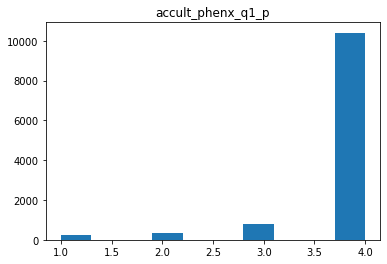

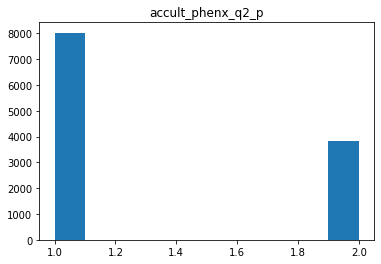

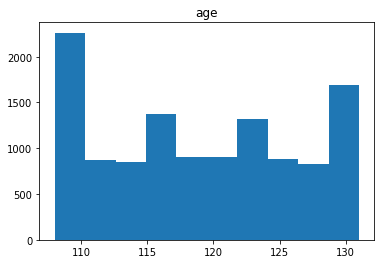

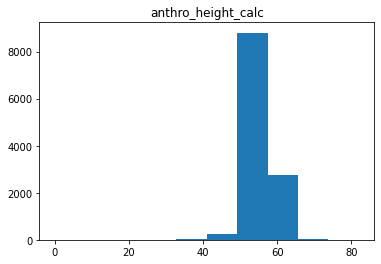

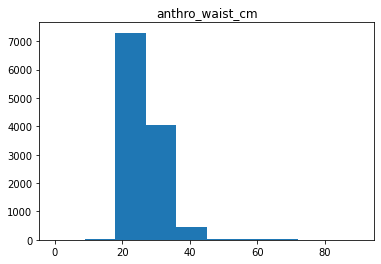

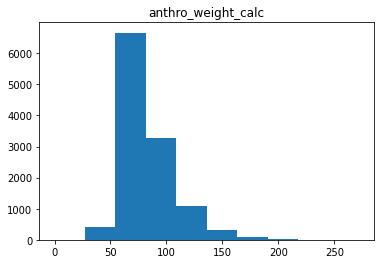

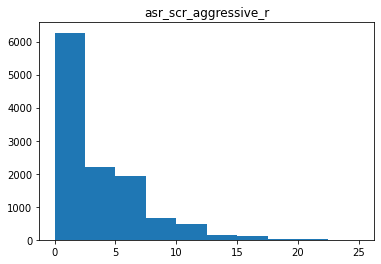

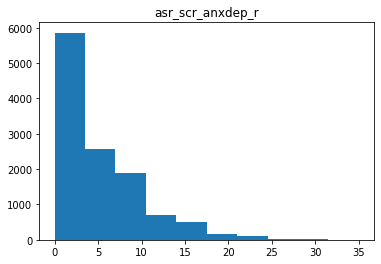

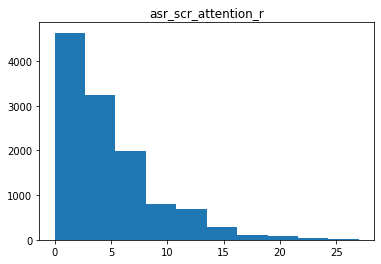

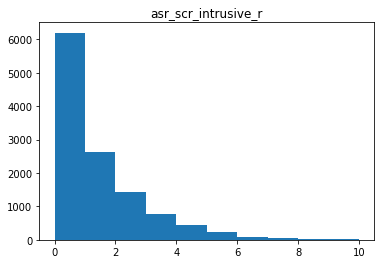

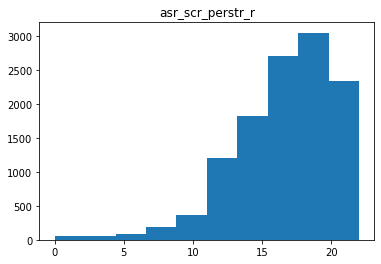

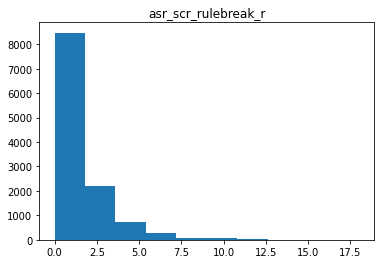

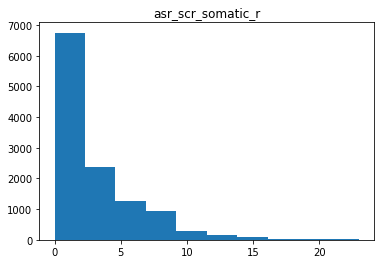

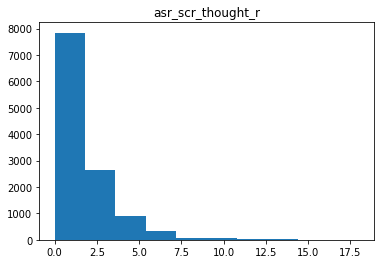

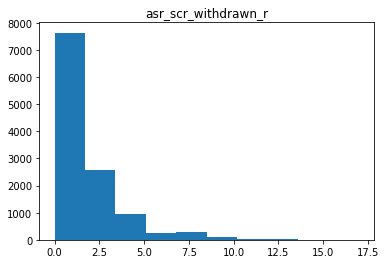

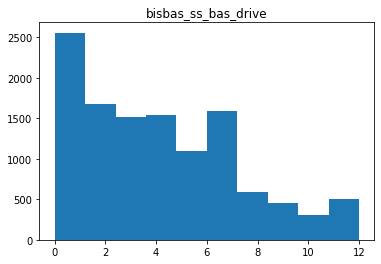

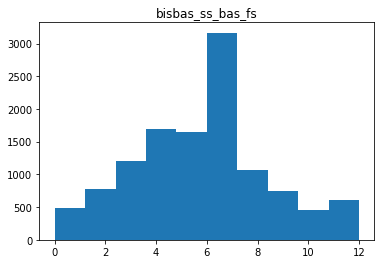

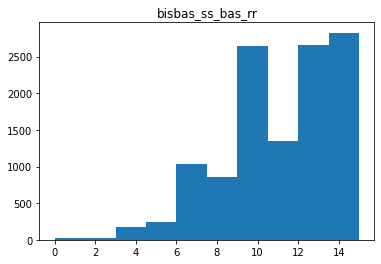

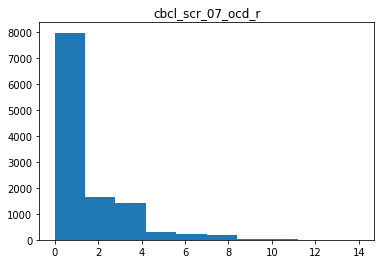

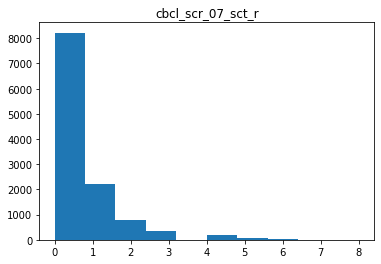

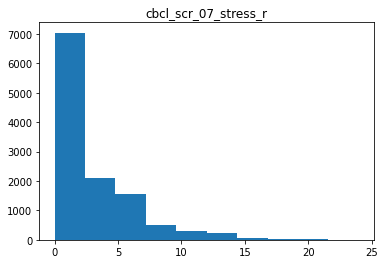

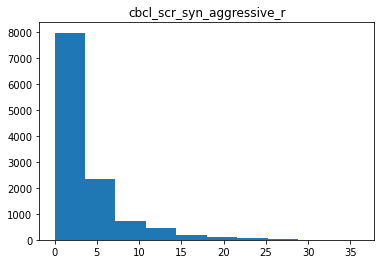

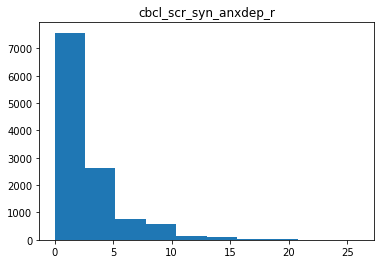

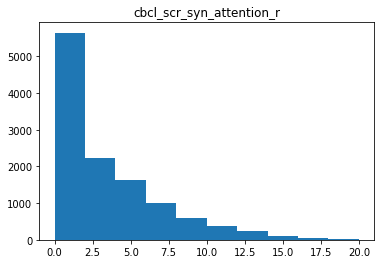

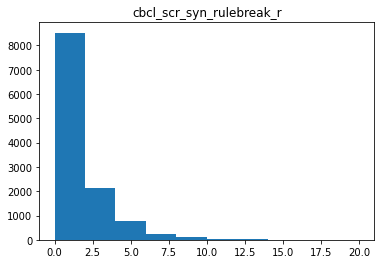

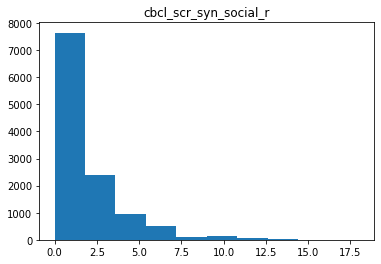

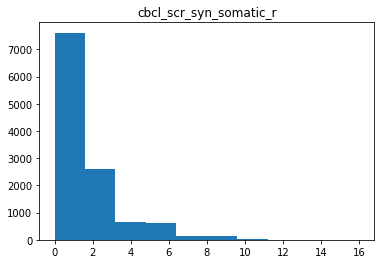

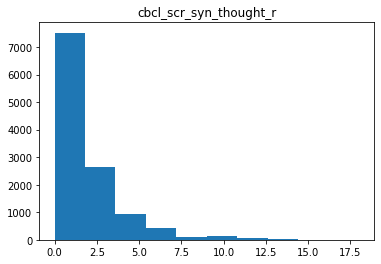

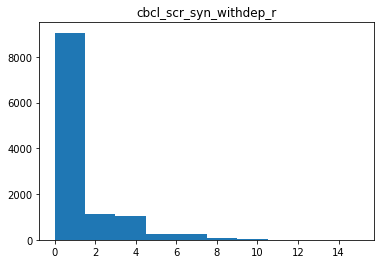

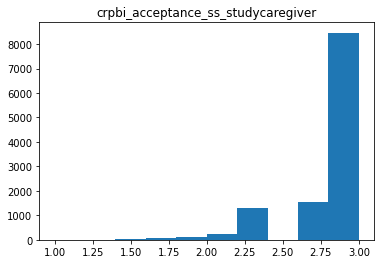

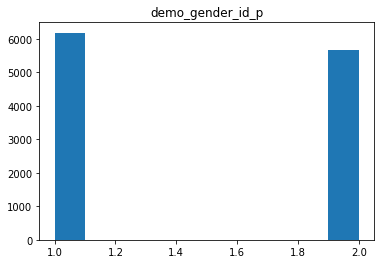

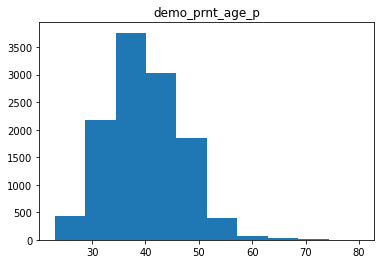

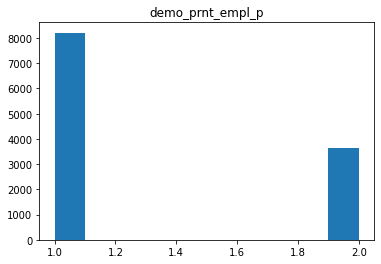

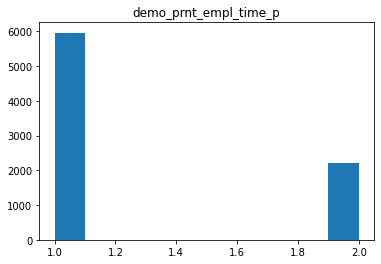

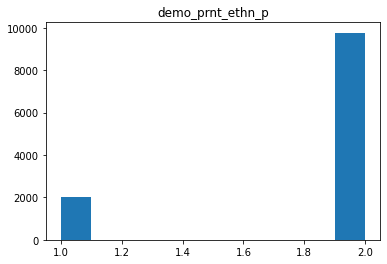

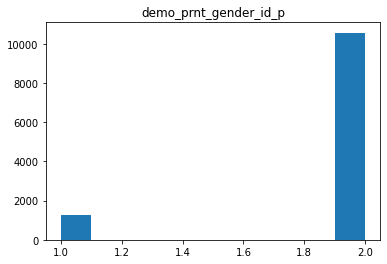

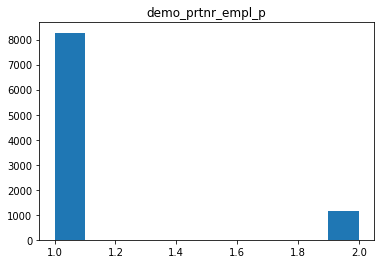

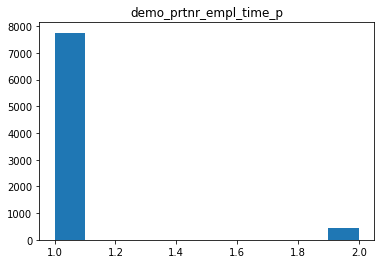

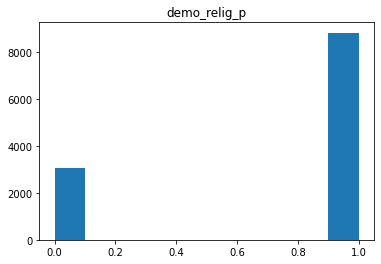

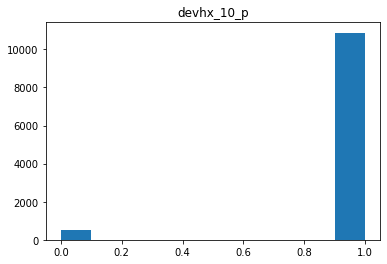

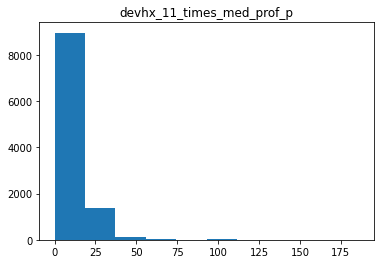

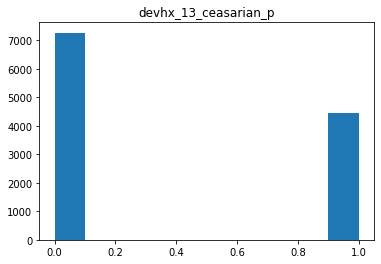

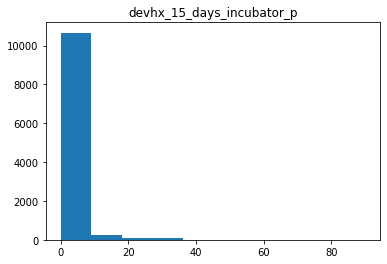

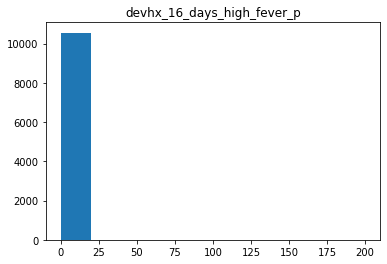

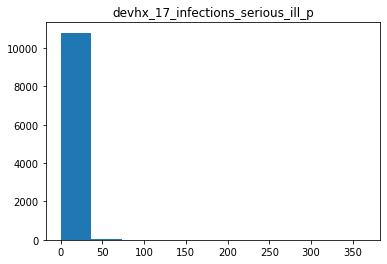

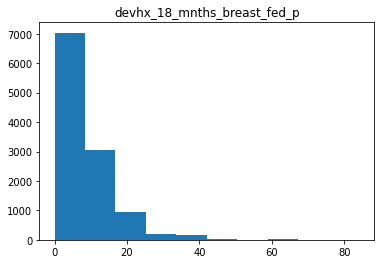

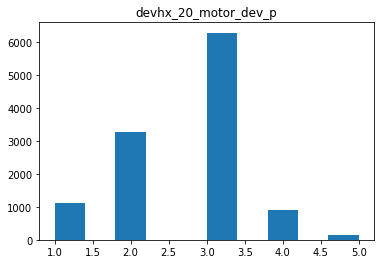

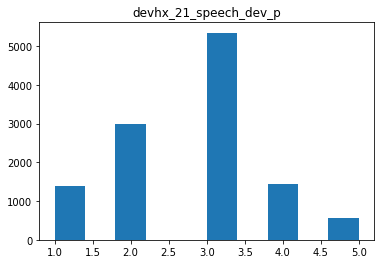

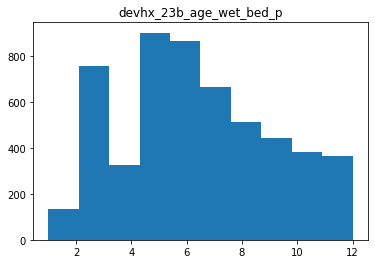

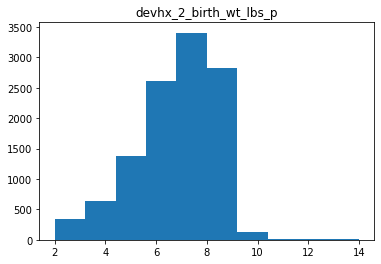

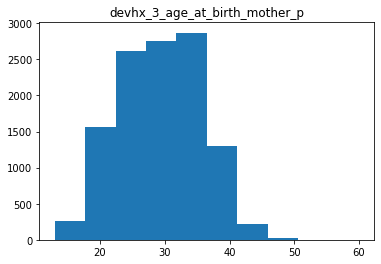

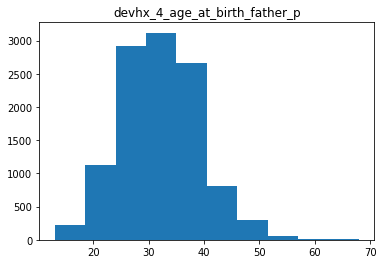

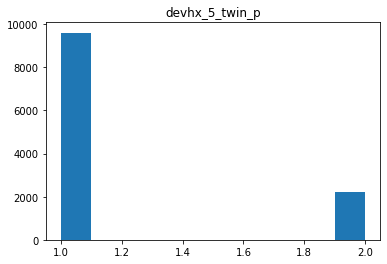

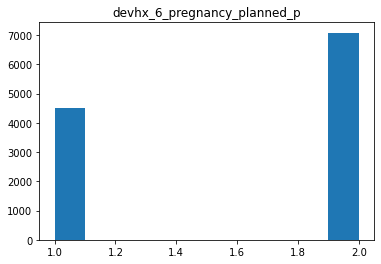

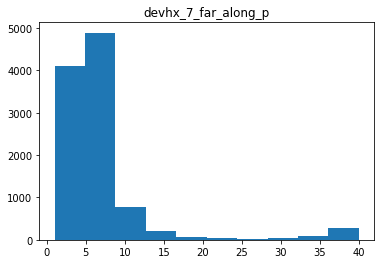

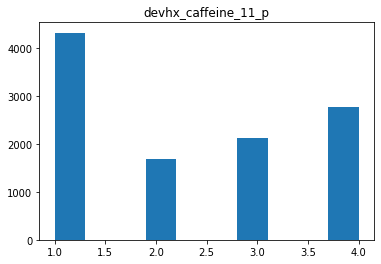

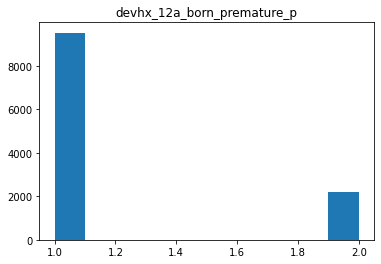

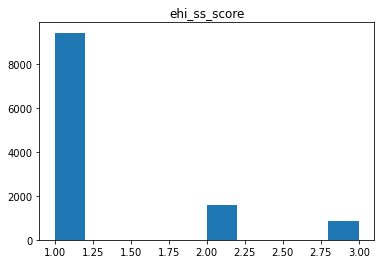

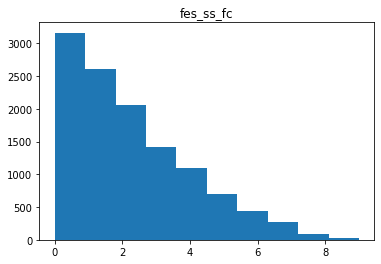

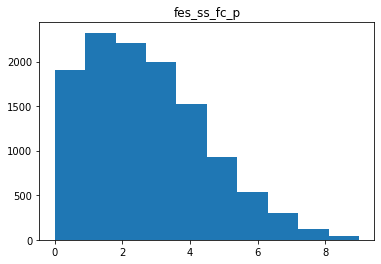

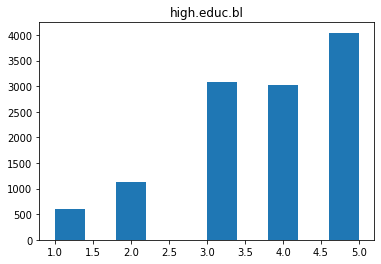

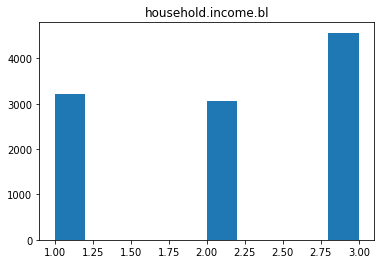

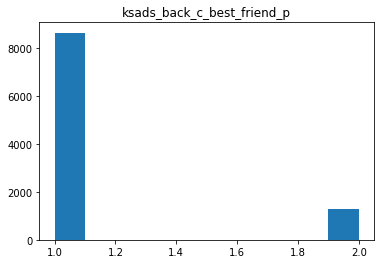

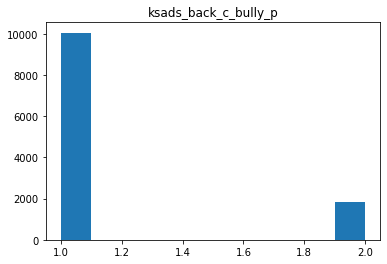

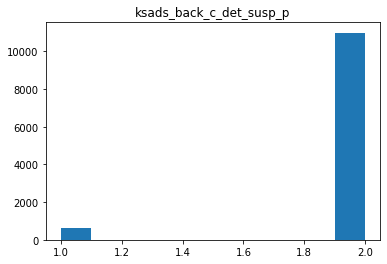

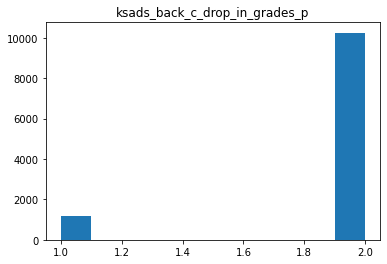

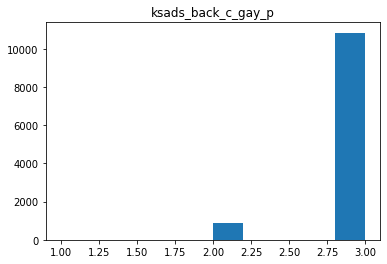

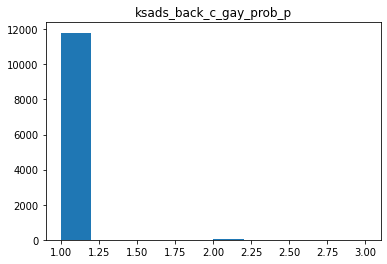

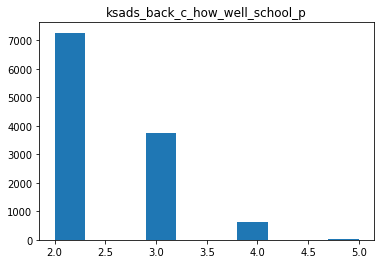

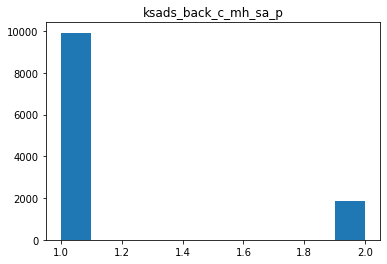

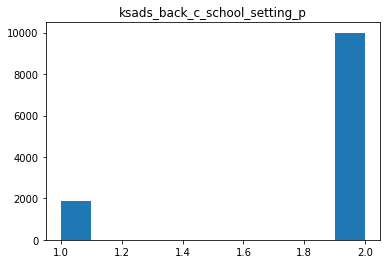

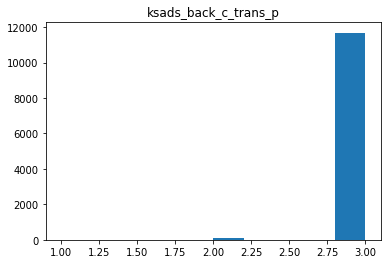

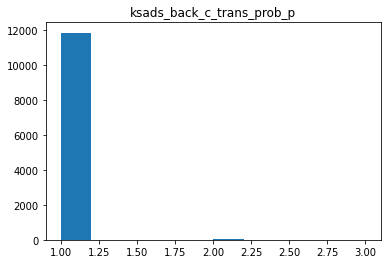

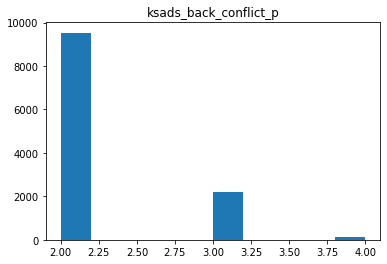

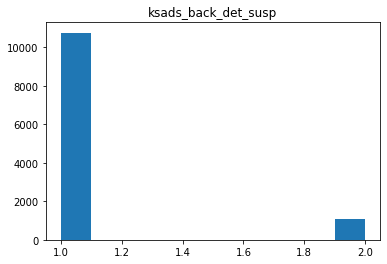

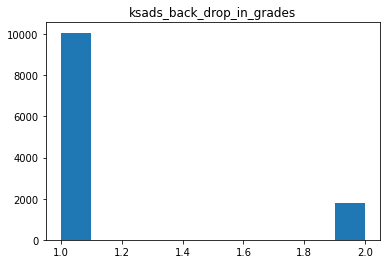

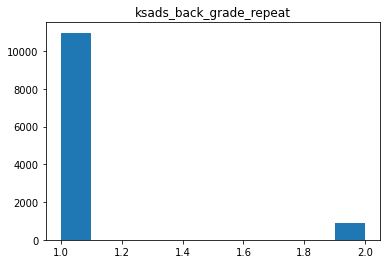

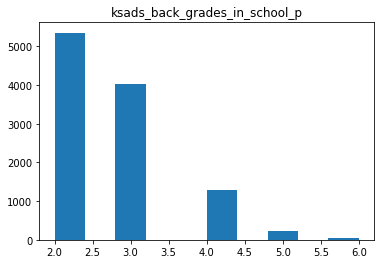

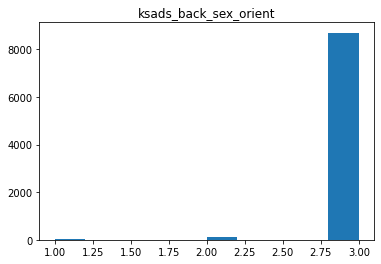

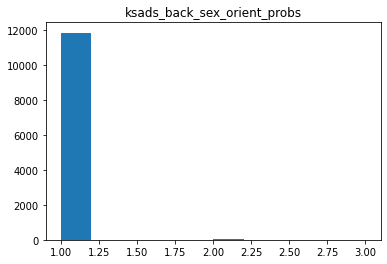

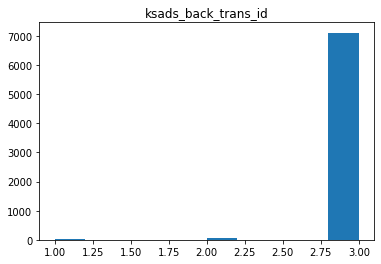

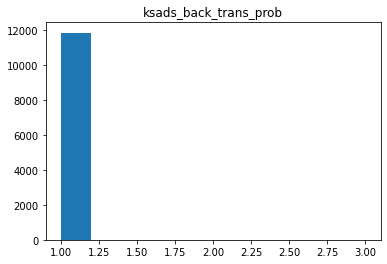

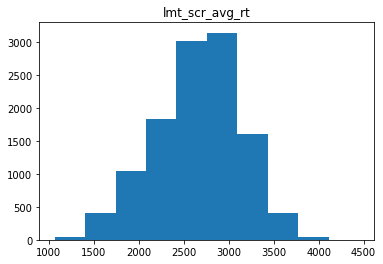

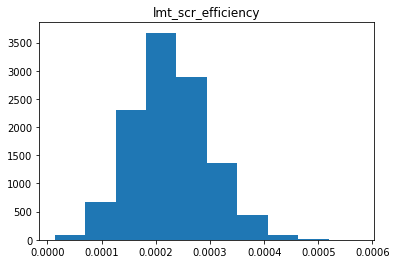

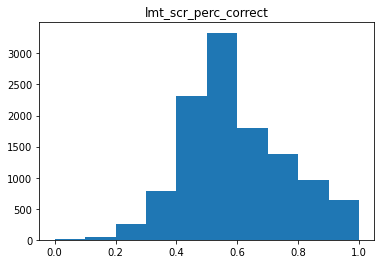

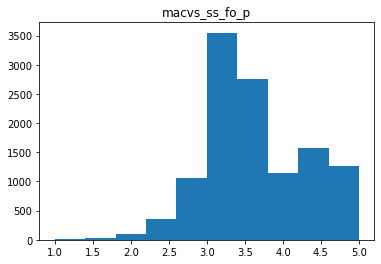

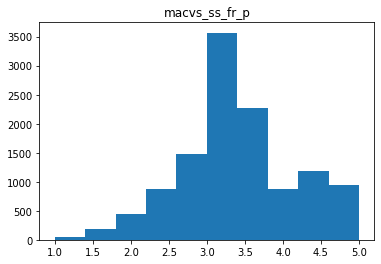

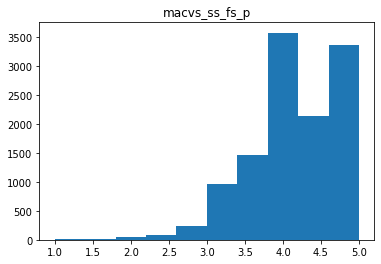

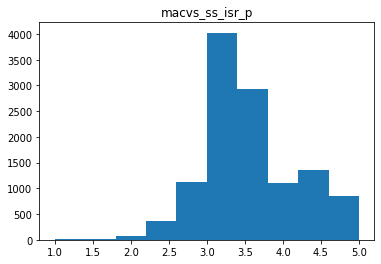

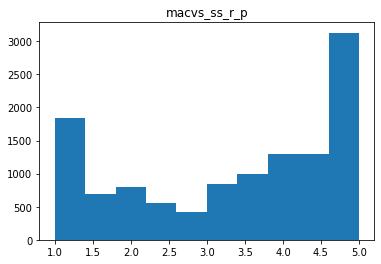

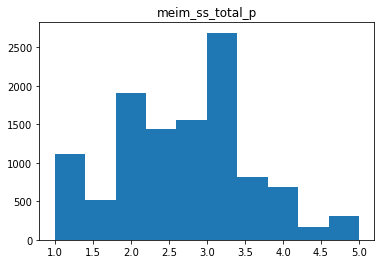

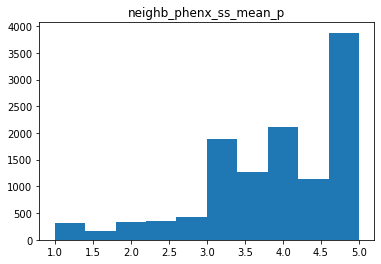

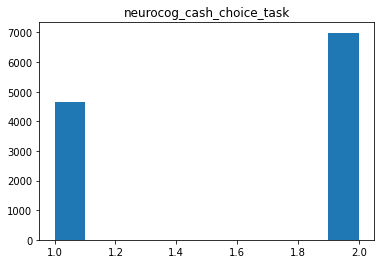

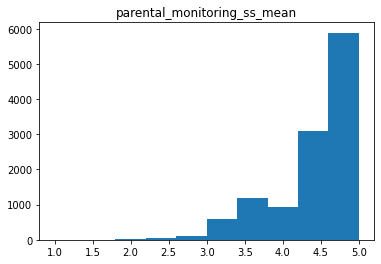

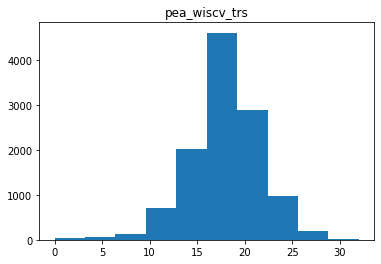

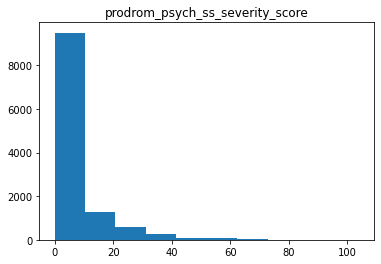

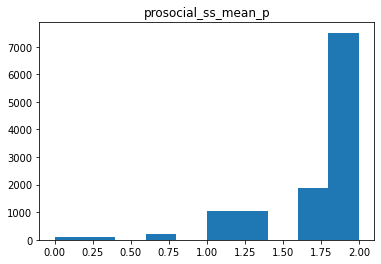

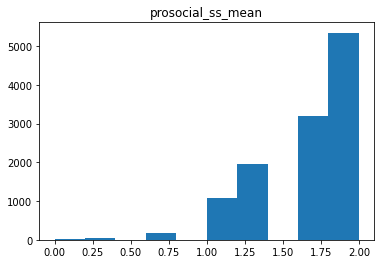

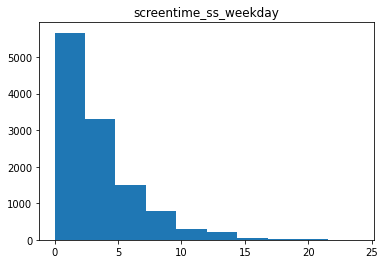

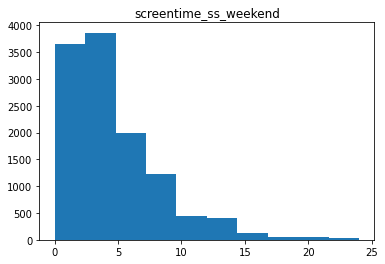

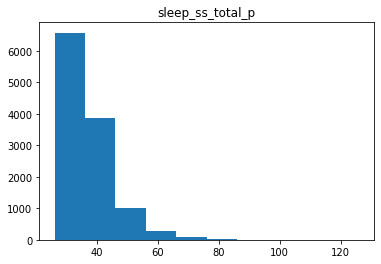

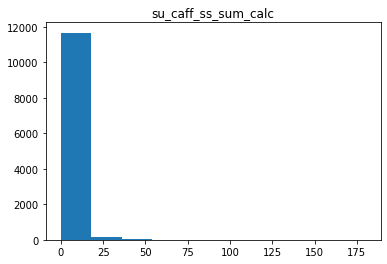

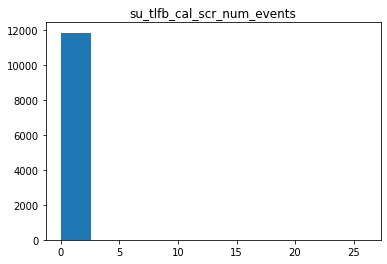

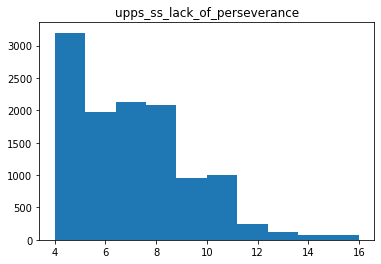

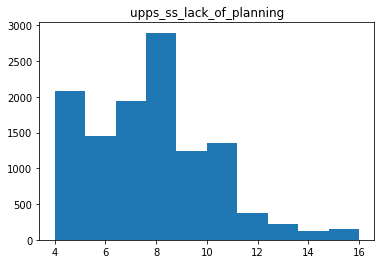

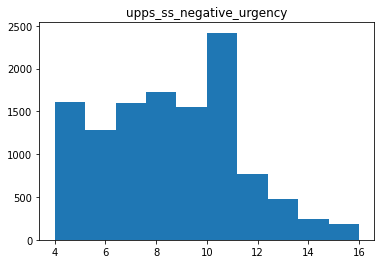

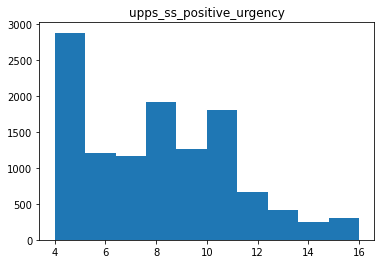

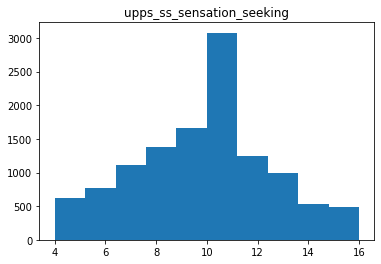

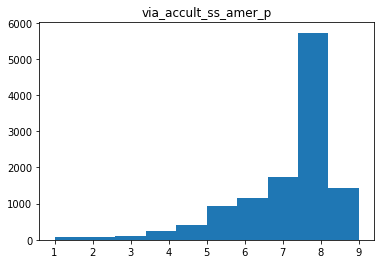

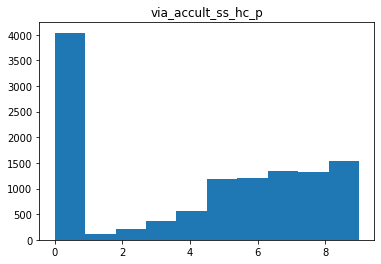

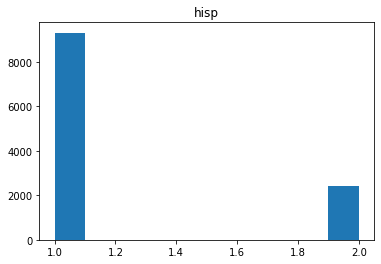

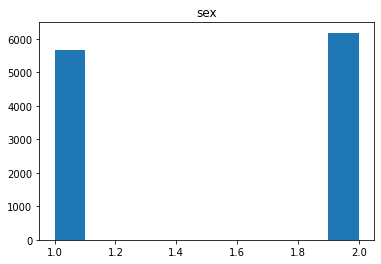

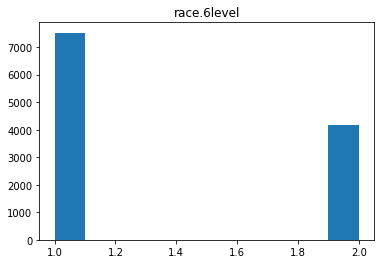

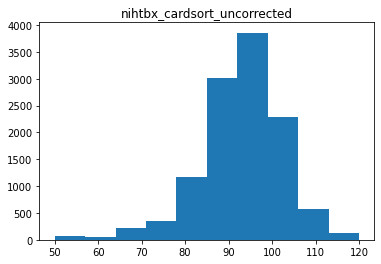

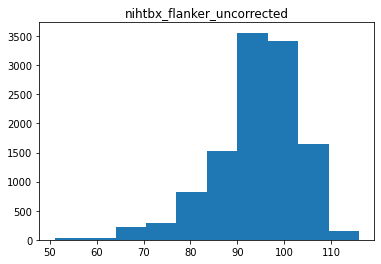

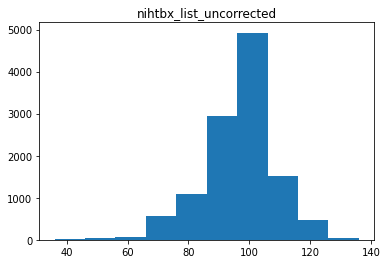

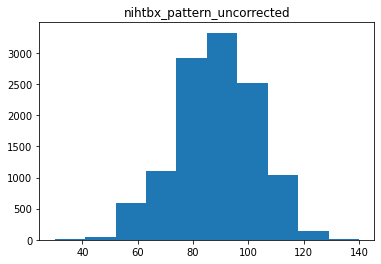

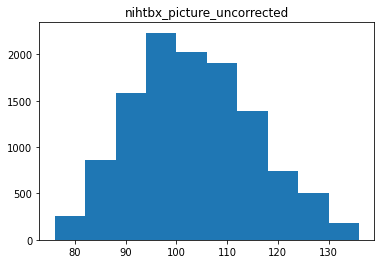

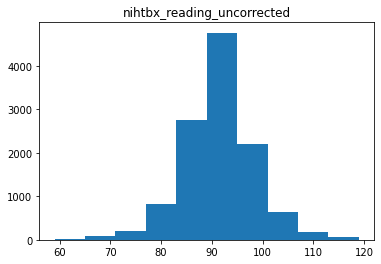

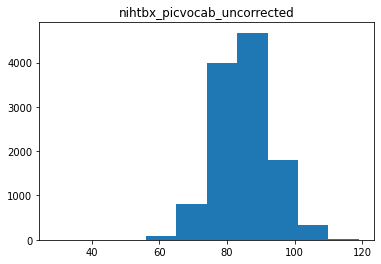

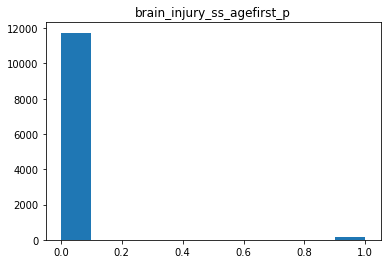

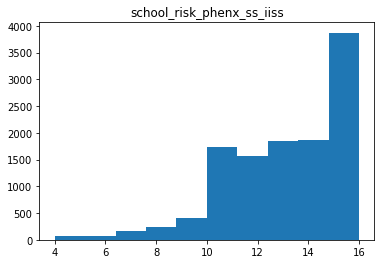

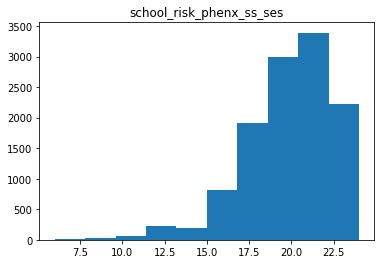

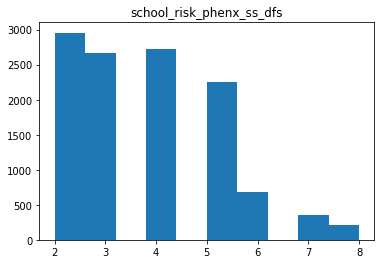

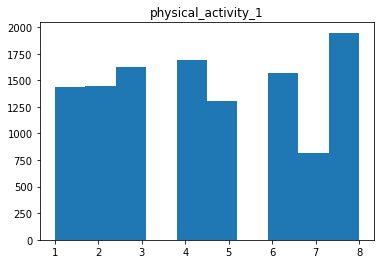

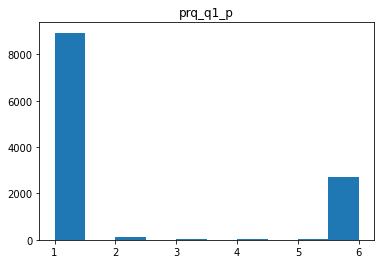

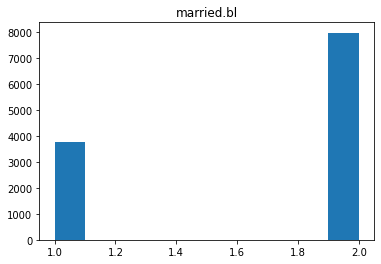

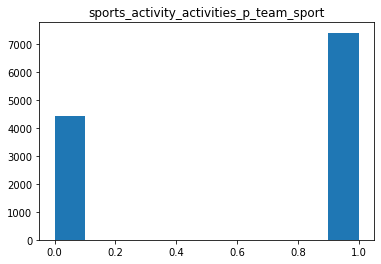

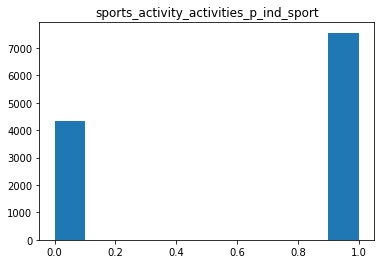

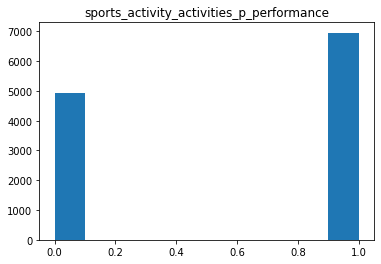

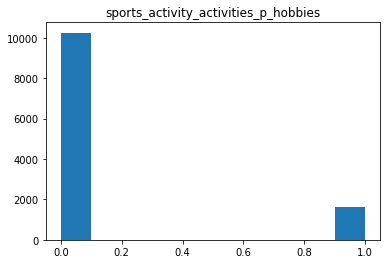

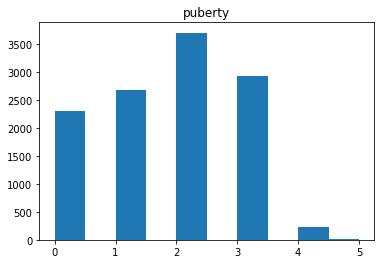

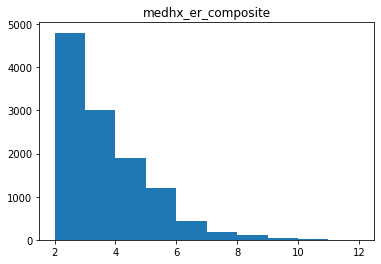

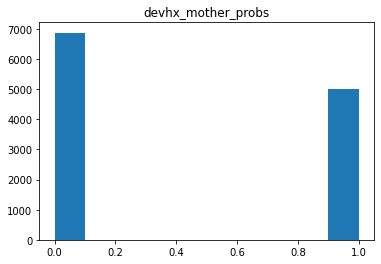

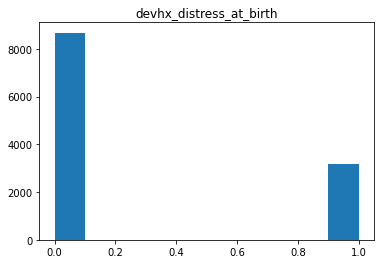

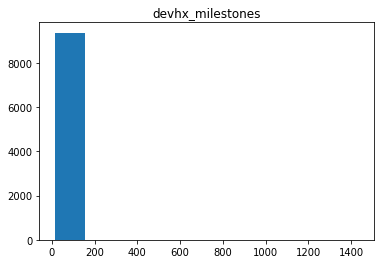

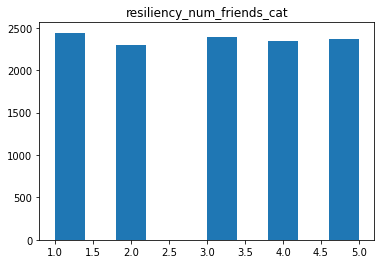

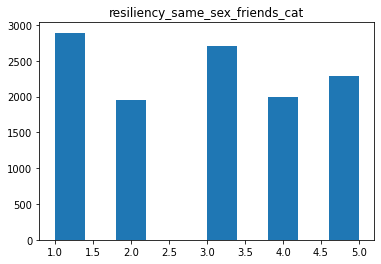

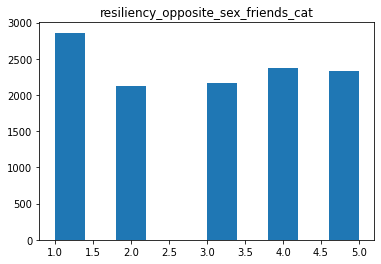

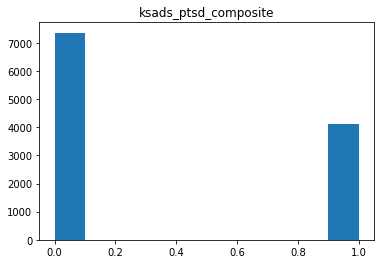

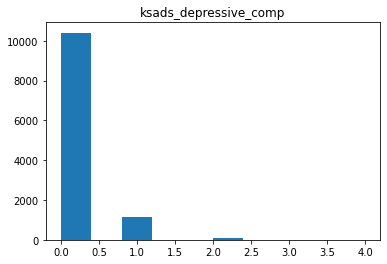

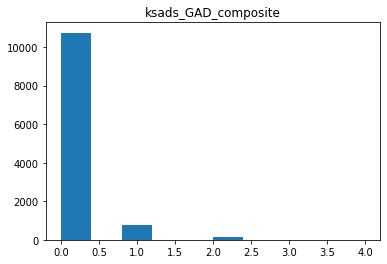

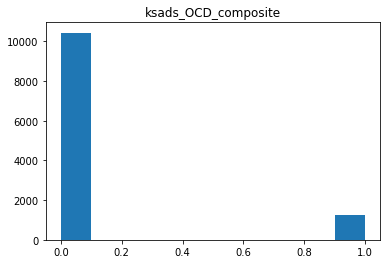

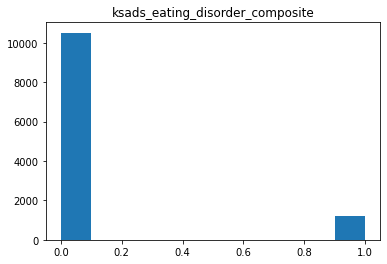

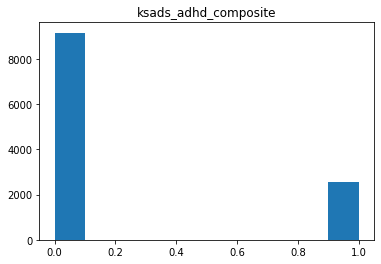

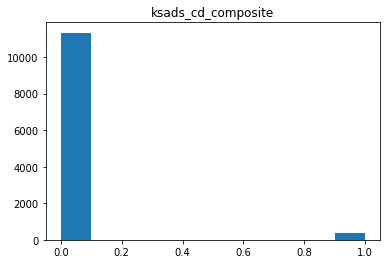

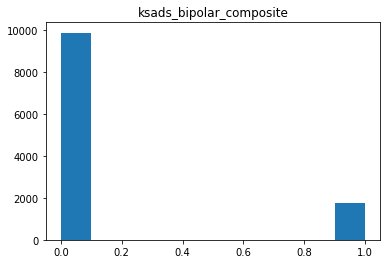

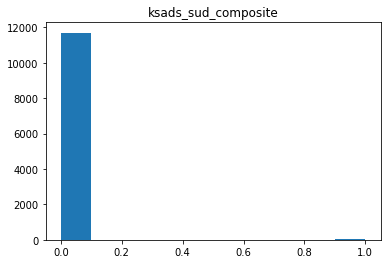

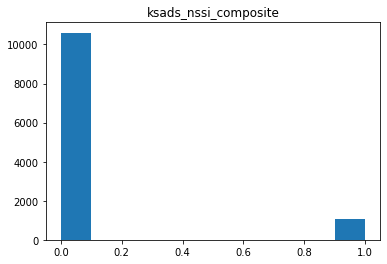

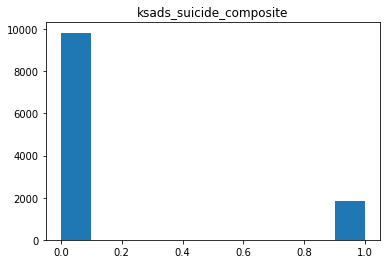

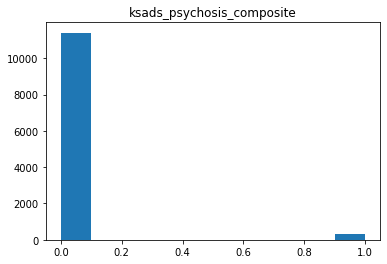

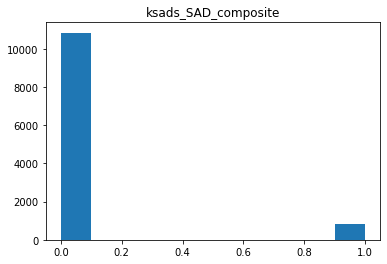

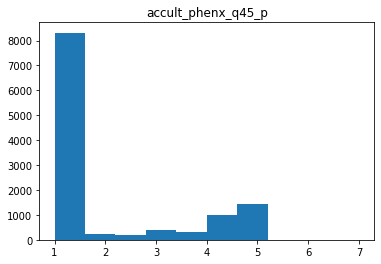

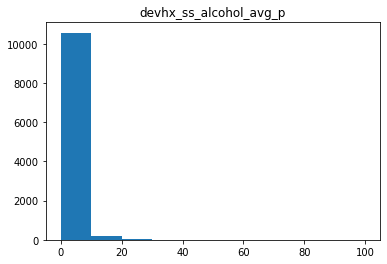

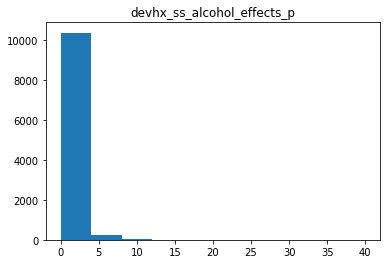

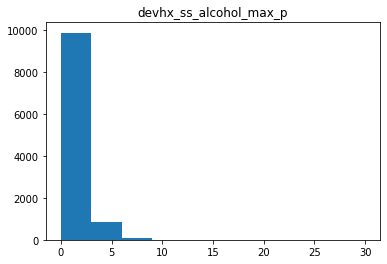

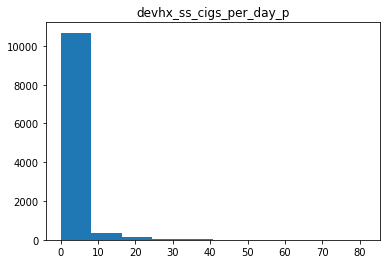

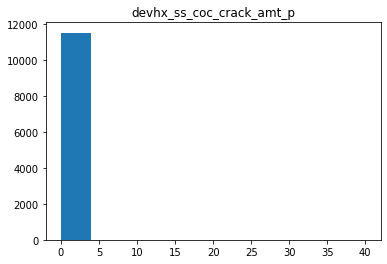

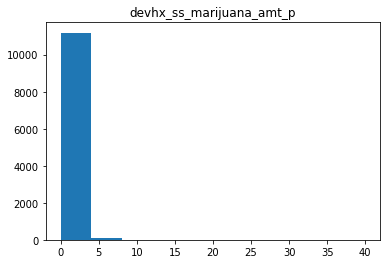

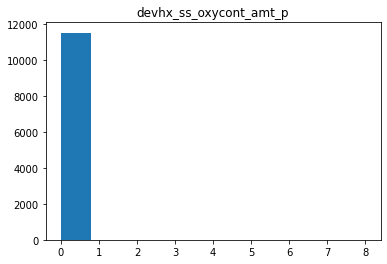

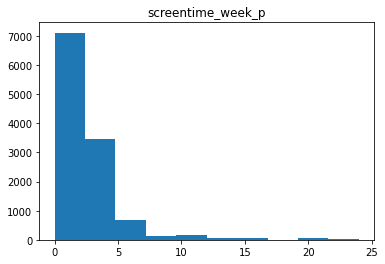

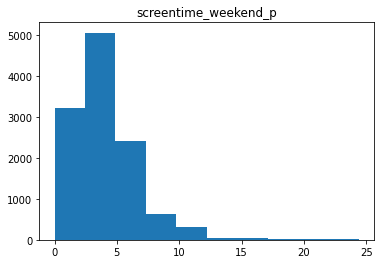

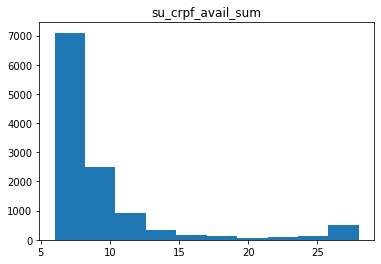

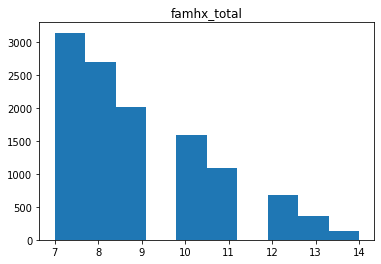

In [72]:
#for v in range(len(data)):
    #plt.hist(data.iloc[:,v])
    #plt.title(data.columns[v])
    #plt.show()
cc=0
for v in data:
    plt.hist(data[v])
    plt.title(data.columns[cc])
    plt.show()
    cc+=1

In [73]:
for v in data:
    print(data[v])
    print(data[v].unique())

0        4.0
1        1.0
2        4.0
3        4.0
4        4.0
        ... 
11870    4.0
11871    4.0
11872    4.0
11873    4.0
11874    4.0
Name: accult_phenx_q1_p, Length: 11875, dtype: float64
[ 4.  1.  3.  2. nan]
0        1.0
1        2.0
2        2.0
3        1.0
4        1.0
        ... 
11870    1.0
11871    2.0
11872    2.0
11873    2.0
11874    1.0
Name: accult_phenx_q2_p, Length: 11875, dtype: float64
[ 1.  2. nan]
0        131
1        121
2        126
3        112
4        130
        ... 
11870    131
11871    113
11872    120
11873    108
11874    126
Name: age, Length: 11875, dtype: int64
[131 121 126 112 130 124 110 109 118 114 119 115 111 123 108 113 129 122
 116 117 128 120 125 127]
0        56.500
1        56.500
2        56.500
3        57.500
4        56.500
          ...  
11870    56.000
11871    58.875
11872    54.700
11873    49.000
11874    59.500
Name: anthro_height_calc, Length: 11875, dtype: float64
[56.5        57.5        57.3        50.9        52.   

[ 2.  1. nan]
0        3.0
1        3.0
2        3.0
3        3.0
4        3.0
        ... 
11870    3.0
11871    3.0
11872    3.0
11873    3.0
11874    3.0
Name: ksads_back_c_gay_p, Length: 11875, dtype: float64
[ 3.  2. nan  1.]
0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11870    1.0
11871    1.0
11872    1.0
11873    1.0
11874    1.0
Name: ksads_back_c_gay_prob_p, Length: 11875, dtype: float64
[ 1. nan  2.  3.]
0        3.0
1        2.0
2        2.0
3        2.0
4        3.0
        ... 
11870    2.0
11871    2.0
11872    2.0
11873    5.0
11874    2.0
Name: ksads_back_c_how_well_school_p, Length: 11875, dtype: float64
[ 3.  2.  4. nan  5.]
0        1.0
1        1.0
2        2.0
3        1.0
4        1.0
        ... 
11870    1.0
11871    1.0
11872    1.0
11873    2.0
11874    1.0
Name: ksads_back_c_mh_sa_p, Length: 11875, dtype: float64
[ 1.  2. nan]
0        1.0
1        2.0
2        1.0
3        1.0
4        2.0
        ... 
11870    2.0
11871   

[ 1.  0. nan]
0        1.0
1        1.0
2        1.0
3        0.0
4        0.0
        ... 
11870    0.0
11871    0.0
11872    0.0
11873    0.0
11874    0.0
Name: devhx_distress_at_birth, Length: 11875, dtype: float64
[ 1.  0. nan]
0        35.0
1        31.0
2        44.5
3        47.0
4        27.0
         ... 
11870     NaN
11871    32.0
11872     NaN
11873    41.0
11874     NaN
Name: devhx_milestones, Length: 11875, dtype: float64
[  35.     31.     44.5    47.     27.     39.       nan   40.     38.
   34.     52.     29.     49.     37.     33.     50.     44.     36.
   30.     32.     46.     43.     65.     56.     26.     28.     25.
   45.     41.     42.     24.     23.     22.     53.     55.     51.
   57.     48.     32.5    36.5    20.     54.     18.     19.     78.
   24.75   71.     35.5   114.     21.     30.5    72.     15.     33.5
  142.     62.    842.    728.     67.     70.     37.5    26.5    40.5
   39.5    85.     59.     66.     61.     77.    830.    157

In [74]:
#data['devhx_4_age_at_birth_father_p']=data['devhx_4_age_at_birth_father_p'].replace(389,np.nan)
#data['devhx_4_age_at_birth_father_p']=data['devhx_4_age_at_birth_father_p'].replace(332,np.nan)

In [75]:
missingness=data.isna().sum()
mssrt=missingness.sort_values(ascending=False)
mssrt[mssrt>1]
mssrt.to_csv('/home/max/Dropbox/ABCD/DRD/missingvals.csv')

In [76]:
alphas

0  \
upps_ss_negative_urgency            0.628452   
upps_ss_lack_of_planning            0.728407   
upps_ss_sensation_seeking           0.490339   
upps_ss_positive_urgency            0.773721   
upps_ss_lack_of_perseverance        0.695164   
prodrom_psych_ss_severity_score     0.862733   
bisbas_ss_bas_rr                    0.732191   
bisbas_ss_bas_drive                 0.773891   
bisbas_ss_bas_fs                    0.656775   
ehi_ss_score                        0.861358   
macvs_ss_fs_p                       0.799818   
macvs_ss_fo_p                       0.721691   
macvs_ss_isr_p                      0.606005   
macvs_ss_r_p                        0.973334   
macvs_ss_fr_p                       0.695895   
fes_ss_fc                           0.676758   
fes_ss_fc_p                         0.664080   
prosocial_ss_mean_p                 0.797321   
prosocial_ss_mean                   0.582949   
crpbi_acceptance_ss_studycaregiver  0.705579   
school_risk_phenx_ss_ses            0.608746   
school_risk_phenx_ss_iiss           0.648659   
school_risk_phenx_ss_dfs            0.203480   
neighb_phenx_ss_mean_p              0.880195   
via_accult_ss_hc_p                  0.914789   
via_accult_ss_amer_p                0.901799   
meim_ss_total_p                     0.886077   
sleep_ss_total_p                    0.826862   
sleep_dist_does                     0.715632   
sleep_dist_swtd                     0.588799   
sleep_dist_da                       0.567822   
sleep_dist_sbd                      0.373883   
sleep_dist_dims                     0.726885   
cbcl_scr_07_ocd_r                   0.692205   
cbcl_scr_07_sct_r                   0.614247   
cbcl_scr_07_stress_r                0.813130   
cbcl_scr_syn_aggressive_r           0.886986   
cbcl_scr_syn_anxdep_r               0.814082   
cbcl_scr_syn_withdep_r              0.732527   
cbcl_scr_syn_attention_r            0.860017   
cbcl_scr_syn_rulebreak_r            0.703868   
cbcl_scr_syn_social_r               0.741373   
cbcl_scr_syn_somatic_r              0.680421   
cbcl_scr_syn_thought_r              0.687897   
asr_scr_perstr_r                    0.721863   
asr_scr_aggressive_r                0.800503   
asr_scr_anxdep_r                    0.880070   
asr_scr_attention_r                 0.842023   
asr_scr_intrusive_r                 0.613708   
asr_scr_rulebreak_r                 0.679151   
asr_scr_somatic_r                   0.786924   
asr_scr_thought_r                   0.663247   
asr_scr_withdrawn_r                 0.747563   

                                                                  var1  \
upps_ss_negative_urgency                      upps_ss_negative_urgency   
upps_ss_lack_of_planning                      upps_ss_lack_of_planning   
upps_ss_sensation_seeking                    upps_ss_sensation_seeking   
upps_ss_positive_urgency                      upps_ss_positive_urgency   
upps_ss_lack_of_perseverance              upps_ss_lack_of_perseverance   
prodrom_psych_ss_severity_score        prodrom_psych_ss_severity_score   
bisbas_ss_bas_rr                                      bisbas_ss_bas_rr   
bisbas_ss_bas_drive                                bisbas_ss_bas_drive   
bisbas_ss_bas_fs                                      bisbas_ss_bas_fs   
ehi_ss_score                                              ehi_ss_score   
macvs_ss_fs_p                                            macvs_ss_fs_p   
macvs_ss_fo_p                                            macvs_ss_fo_p   
macvs_ss_isr_p                                          macvs_ss_isr_p   
macvs_ss_r_p                                              macvs_ss_r_p   
macvs_ss_fr_p                                            macvs_ss_fr_p   
fes_ss_fc                                                    fes_ss_fc   
fes_ss_fc_p                                                fes_ss_fc_p   
prosocial_ss_mean_p                                prosocial_ss_mean_p   
prosocial_ss_mean                           

In [77]:
#redo main anlaysis from above to confirm new cor tool works the same
alf=rsa

#alf.rename(alf['var1'])
alf=pd.merge(alf,alphas,how='inner',on=['var1'])
alf=alf.drop(['var2_y'],axis=1)
alf.columns = ['index','var1','var2','cor','pvals','alpha1']
alf=alf.drop('index',axis=1)
alf=pd.merge(alf,alphas,how='inner',on=['var2'])
alf=alf.drop(['var1_y'],axis=1)
alf.columns = ['var1','var2','cor','pvals','alpha1','alpha2']
alf['alpha_prod']=alf['alpha1']*alf['alpha2']
apc_sig=pingouin.pairwise_corr(data=alf,columns=['alpha_prod', 'cor'],covar=None,method='pearson',tail='two-sided',nan_policy='pairwise')
apc_sig

X    Y   method       tail     n         r         CI95%  \
0  alpha_prod  cor  pearson  two-sided  1128  0.070151  [0.01, 0.13]   

         r2    adj_r2         z     p-unc   BF10     power  
0  0.004921  0.003152  0.070267  0.018455  0.597  0.654609

In [78]:
alf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128 entries, 0 to 1127
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   var1        1128 non-null   object 
 1   var2        1128 non-null   object 
 2   cor         1128 non-null   float64
 3   pvals       1128 non-null   float64
 4   alpha1      1128 non-null   float64
 5   alpha2      1128 non-null   float64
 6   alpha_prod  1128 non-null   float64
dtypes: float64(5), object(2)
memory usage: 70.5+ KB


In [79]:
alphas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, upps_ss_negative_urgency to asr_scr_withdrawn_r
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       53 non-null     float64
 1   var1    53 non-null     object 
 2   var2    53 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.7+ KB
